In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Rainfall.csv',parse_dates=['Date'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
for i in df.columns:
    print(df[i].isnull().sum())
    print(df[i].value_counts())
    print('*'*25)

0
Date
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: count, Length: 3004, dtype: int64
*************************
0
Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: count, dtype: int64
*************************
75
MinTemp
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: count, Length: 285, dtype: int64
*************************
60
MaxTemp
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: count, Length: 331, dtype: int64
*************************
240
Rainfall
0.0      5299
0.2 

In [4]:
'''df['Date']=df['Date'].astype(str)
year=df['Date'].str.split('-',n=2,expand=True)[1]
month=df['Date'].str.split('-',n=2,expand=True)[0]
df.insert(loc=1,column='Year',value=year)
df.insert(loc=0,column='Month',value=month)
df.drop('Date',inplace=True,axis=1)
df'''

"df['Date']=df['Date'].astype(str)\nyear=df['Date'].str.split('-',n=2,expand=True)[1]\nmonth=df['Date'].str.split('-',n=2,expand=True)[0]\ndf.insert(loc=1,column='Year',value=year)\ndf.insert(loc=0,column='Month',value=month)\ndf.drop('Date',inplace=True,axis=1)\ndf"

In [5]:
df['Date'] = df['Date'].astype(str)
#df[['Month','Year']]=df['Date'].str.split('-',n=1,expand=True)
month=df['Date'].str.split('-',n=2,expand=True)[1]
Year=df['Date'].str.split('-',n=2,expand=True)[0]

data_jan = df[df["Date"].str.contains("-01-")]
data_feb = df[df["Date"].str.contains("-02-")]
data_mar = df[df["Date"].str.contains("-03-")]
data_apr = df[df["Date"].str.contains("-04-")]
data_may = df[df["Date"].str.contains("-05-")]
data_jun = df[df["Date"].str.contains("-06-")]
data_jul = df[df["Date"].str.contains("-07-")]
data_aug = df[df["Date"].str.contains("-08-")]
data_sep = df[df["Date"].str.contains("-09-")]
data_oct = df[df["Date"].str.contains("-10-")]
data_nov = df[df["Date"].str.contains("-11-")]
data_dec = df[df["Date"].str.contains("-12-")]



In [6]:
data_jan

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
31,2009-01-01,Albury,11.3,26.5,0.0,NaN,NaN,WNW,56.0,W,...,46.0,26.0,1004.5,1003.2,NaN,NaN,19.7,25.7,No,No
32,2009-01-02,Albury,9.6,23.9,0.0,NaN,NaN,W,41.0,WSW,...,44.0,22.0,1014.4,1013.1,NaN,NaN,14.9,22.1,No,No
33,2009-01-03,Albury,10.5,28.8,0.0,NaN,NaN,SSE,26.0,SSE,...,43.0,22.0,1018.7,1014.8,NaN,NaN,17.1,26.5,No,No
34,2009-01-04,Albury,12.3,34.6,0.0,NaN,NaN,WNW,37.0,SSE,...,41.0,12.0,1015.1,1010.3,NaN,NaN,20.7,33.9,No,No
35,2009-01-05,Albury,12.9,35.8,0.0,NaN,NaN,WNW,41.0,ENE,...,41.0,9.0,1012.6,1009.2,NaN,NaN,22.4,34.4,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999,2014-01-27,PerthAirport,15.5,26.9,0.0,10.2,11.2,SW,54.0,SSW,...,60.0,38.0,1011.3,1010.6,5.0,1.0,23.3,26.0,No,No
8000,2014-01-28,PerthAirport,15.5,31.6,0.0,9.2,13.1,E,52.0,ESE,...,40.0,20.0,1018.0,1013.7,0.0,0.0,21.6,30.3,No,No
8001,2014-01-29,PerthAirport,16.6,34.2,0.0,11.6,13.0,ESE,52.0,E,...,40.0,29.0,1013.8,1009.0,0.0,1.0,23.3,32.7,No,No
8002,2014-01-30,PerthAirport,17.4,35.5,0.0,10.6,13.0,SW,31.0,ESE,...,37.0,29.0,1010.0,1006.8,2.0,1.0,27.7,34.7,No,No


In [7]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [8]:
'''data_jan=pd.DataFrame({})
data_feb=pd.DataFrame({})
data_mar=pd.DataFrame({})
data_apr=pd.DataFrame({})
data_may=pd.DataFrame({})
data_jun=pd.DataFrame({})
data_jul=pd.DataFrame({})
data_aug=pd.DataFrame({})
data_sep=pd.DataFrame({})
data_oct=pd.DataFrame({})
data_nov=pd.DataFrame({})
data_dec=pd.DataFrame({})'''

'data_jan=pd.DataFrame({})\ndata_feb=pd.DataFrame({})\ndata_mar=pd.DataFrame({})\ndata_apr=pd.DataFrame({})\ndata_may=pd.DataFrame({})\ndata_jun=pd.DataFrame({})\ndata_jul=pd.DataFrame({})\ndata_aug=pd.DataFrame({})\ndata_sep=pd.DataFrame({})\ndata_oct=pd.DataFrame({})\ndata_nov=pd.DataFrame({})\ndata_dec=pd.DataFrame({})'

In [9]:
cat_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtypes=='O':
        cat_col.append(i)
    if df[i].dtypes=='int' or df[i].dtypes=='float':
        num_col.append(i)

In [10]:
cat_col,num_col

(['Date',
  'Location',
  'WindGustDir',
  'WindDir9am',
  'WindDir3pm',
  'RainToday',
  'RainTomorrow'],
 ['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'])

In [11]:
cat_col=['Date',
  'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']
float_col=['MinTemp',
 'MaxTemp',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']
int_col=['WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
'Cloud9am',
 'Cloud3pm']

In [12]:
'''data_jan=pd.DataFrame({})
data_feb=pd.DataFrame({})
data_mar=pd.DataFrame({})
data_apr=pd.DataFrame({})
data_may=pd.DataFrame({})
data_jun=pd.DataFrame({})
data_jul=pd.DataFrame({})
data_aug=pd.DataFrame({})
data_sep=pd.DataFrame({})
data_oct=pd.DataFrame({})
data_nov=pd.DataFrame({})
data_dec=pd.DataFrame({})'''

'data_jan=pd.DataFrame({})\ndata_feb=pd.DataFrame({})\ndata_mar=pd.DataFrame({})\ndata_apr=pd.DataFrame({})\ndata_may=pd.DataFrame({})\ndata_jun=pd.DataFrame({})\ndata_jul=pd.DataFrame({})\ndata_aug=pd.DataFrame({})\ndata_sep=pd.DataFrame({})\ndata_oct=pd.DataFrame({})\ndata_nov=pd.DataFrame({})\ndata_dec=pd.DataFrame({})'

In [13]:
'''data_jan=df[df['Date'].str.contain
data_feb=df[df['Date'].str.contain
data_mar=df[df['Date'].str.contain
data_apr=df[df['Date'].str.contain
data_may=df[df['Date'].str.contain
data_jun=df[df['Date'].str.contain
data_jul=df[df['Date'].str.contain
data_aug=df[df['Date'].str.contain
data_sep=df[df['Date'].str.contain
data_oct=df[df['Date'].str.contain
data_nov=df[df['Date'].str.contain
data_dec=df[df['Date'].str.contain'''

"data_jan=df[df['Date'].str.contain\ndata_feb=df[df['Date'].str.contain\ndata_mar=df[df['Date'].str.contain\ndata_apr=df[df['Date'].str.contain\ndata_may=df[df['Date'].str.contain\ndata_jun=df[df['Date'].str.contain\ndata_jul=df[df['Date'].str.contain\ndata_aug=df[df['Date'].str.contain\ndata_sep=df[df['Date'].str.contain\ndata_oct=df[df['Date'].str.contain\ndata_nov=df[df['Date'].str.contain\ndata_dec=df[df['Date'].str.contain"

In [14]:
data_jan['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
data_feb['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
data_mar['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
data_apr['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
data_may['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
data_jun['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
data_jul['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
data_aug['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
data_sep['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
data_oct['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
data_nov['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
data_dec['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())

In [15]:
for i in cat_col:
    data_jan[i]=df[i].fillna(df[i].mode()[0])
    data_feb[i]=df[i].fillna(df[i].mode()[0])
    data_mar[i]=df[i].fillna(df[i].mode()[0])
    data_apr[i]=df[i].fillna(df[i].mode()[0])
    data_may[i]=df[i].fillna(df[i].mode()[0])
    data_jun[i]=df[i].fillna(df[i].mode()[0])
    data_jul[i]=df[i].fillna(df[i].mode()[0])
    data_aug[i]=df[i].fillna(df[i].mode()[0])
    data_sep[i]=df[i].fillna(df[i].mode()[0])
    data_oct[i]=df[i].fillna(df[i].mode()[0])
    data_nov[i]=df[i].fillna(df[i].mode()[0])
    data_dec[i]=df[i].fillna(df[i].mode()[0])

In [16]:
for i in int_col:
    data_jan[i]=df[i].fillna(df[i].mean())
    data_feb[i]=df[i].fillna(df[i].mean())
    data_mar[i]=df[i].fillna(df[i].mean())
    data_apr[i]=df[i].fillna(df[i].mean())
    data_may[i]=df[i].fillna(df[i].mean())
    data_jun[i]=df[i].fillna(df[i].mean())
    data_jul[i]=df[i].fillna(df[i].mean())
    data_aug[i]=df[i].fillna(df[i].mean())
    data_sep[i]=df[i].fillna(df[i].mean())
    data_oct[i]=df[i].fillna(df[i].mean())
    data_nov[i]=df[i].fillna(df[i].mean())
    data_dec[i]=df[i].fillna(df[i].mean())

In [17]:
for i in float_col:
    data_jan[i]=df[i].fillna(df[i].median())
    data_feb[i]=df[i].fillna(df[i].median())
    data_mar[i]=df[i].fillna(df[i].median())
    data_apr[i]=df[i].fillna(df[i].median())
    data_may[i]=df[i].fillna(df[i].median())
    data_jun[i]=df[i].fillna(df[i].median())
    data_jul[i]=df[i].fillna(df[i].median())
    data_aug[i]=df[i].fillna(df[i].median())
    data_sep[i]=df[i].fillna(df[i].median())
    data_oct[i]=df[i].fillna(df[i].median())
    data_nov[i]=df[i].fillna(df[i].median())
    data_dec[i]=df[i].fillna(df[i].median())
    


In [18]:
data_jan

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
31,2009-01-01,Albury,11.3,26.5,0.0,NaN,NaN,WNW,56.0,W,...,46.0,26.0,1004.5,1003.2,4.566622,4.503183,19.7,25.7,No,No
32,2009-01-02,Albury,9.6,23.9,0.0,NaN,NaN,W,41.0,WSW,...,44.0,22.0,1014.4,1013.1,4.566622,4.503183,14.9,22.1,No,No
33,2009-01-03,Albury,10.5,28.8,0.0,NaN,NaN,SSE,26.0,SSE,...,43.0,22.0,1018.7,1014.8,4.566622,4.503183,17.1,26.5,No,No
34,2009-01-04,Albury,12.3,34.6,0.0,NaN,NaN,WNW,37.0,SSE,...,41.0,12.0,1015.1,1010.3,4.566622,4.503183,20.7,33.9,No,No
35,2009-01-05,Albury,12.9,35.8,0.0,NaN,NaN,WNW,41.0,ENE,...,41.0,9.0,1012.6,1009.2,4.566622,4.503183,22.4,34.4,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999,2014-01-27,PerthAirport,15.5,26.9,0.0,10.2,11.2,SW,54.0,SSW,...,60.0,38.0,1011.3,1010.6,5.000000,1.000000,23.3,26.0,No,No
8000,2014-01-28,PerthAirport,15.5,31.6,0.0,9.2,13.1,E,52.0,ESE,...,40.0,20.0,1018.0,1013.7,0.000000,0.000000,21.6,30.3,No,No
8001,2014-01-29,PerthAirport,16.6,34.2,0.0,11.6,13.0,ESE,52.0,E,...,40.0,29.0,1013.8,1009.0,0.000000,1.000000,23.3,32.7,No,No
8002,2014-01-30,PerthAirport,17.4,35.5,0.0,10.6,13.0,SW,31.0,ESE,...,37.0,29.0,1010.0,1006.8,2.000000,1.000000,27.7,34.7,No,No


In [19]:
df_new=pd.concat([data_jan,data_feb,data_mar,data_apr,data_may,data_jun,data_jul,data_aug,data_sep,data_oct,data_nov,data_dec],ignore_index=True)
df_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,Albury,11.3,26.5,0.0,NaN,NaN,WNW,56.0,W,...,46.0,26.0,1004.5,1003.2,4.566622,4.503183,19.7,25.7,No,No
1,2009-01-02,Albury,9.6,23.9,0.0,NaN,NaN,W,41.0,WSW,...,44.0,22.0,1014.4,1013.1,4.566622,4.503183,14.9,22.1,No,No
2,2009-01-03,Albury,10.5,28.8,0.0,NaN,NaN,SSE,26.0,SSE,...,43.0,22.0,1018.7,1014.8,4.566622,4.503183,17.1,26.5,No,No
3,2009-01-04,Albury,12.3,34.6,0.0,NaN,NaN,WNW,37.0,SSE,...,41.0,12.0,1015.1,1010.3,4.566622,4.503183,20.7,33.9,No,No
4,2009-01-05,Albury,12.9,35.8,0.0,NaN,NaN,WNW,41.0,ENE,...,41.0,9.0,1012.6,1009.2,4.566622,4.503183,22.4,34.4,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2013-12-27,PerthAirport,18.7,29.2,0.0,10.2,11.2,WSW,46.0,SW,...,58.0,43.0,1013.0,1012.2,7.000000,1.000000,23.3,27.9,No,No
8421,2013-12-28,PerthAirport,16.2,33.2,0.0,9.0,13.3,E,48.0,E,...,41.0,29.0,1015.7,1010.4,1.000000,1.000000,22.4,31.4,No,No
8422,2013-12-29,PerthAirport,15.0,35.4,0.0,10.8,13.3,SW,43.0,S,...,37.0,31.0,1010.2,1005.8,1.000000,0.000000,25.9,32.6,No,No
8423,2013-12-30,PerthAirport,18.0,32.3,0.0,10.4,13.3,W,35.0,ENE,...,46.0,43.0,1007.6,1005.3,0.000000,0.000000,25.2,28.2,No,No


In [20]:

df_new.drop(['Date'],inplace=True,axis=1)
df_new.insert(loc=1,column='Month',value=month)
df_new.insert(loc=2,column='Year',value=Year)

In [21]:
df_new.insert(loc=3, column="Avg. Temp", value=(df_new["MinTemp"] + df_new["MaxTemp"]) / 2)
df_new

,Location,Month,Year,Avg. Temp,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,12,2008,18.90,11.3,26.5,0.0,NaN,NaN,WNW,...,46.0,26.0,1004.5,1003.2,4.566622,4.503183,19.7,25.7,No,No
1,Albury,12,2008,16.75,9.6,23.9,0.0,NaN,NaN,W,...,44.0,22.0,1014.4,1013.1,4.566622,4.503183,14.9,22.1,No,No
2,Albury,12,2008,19.65,10.5,28.8,0.0,NaN,NaN,SSE,...,43.0,22.0,1018.7,1014.8,4.566622,4.503183,17.1,26.5,No,No
3,Albury,12,2008,23.45,12.3,34.6,0.0,NaN,NaN,WNW,...,41.0,12.0,1015.1,1010.3,4.566622,4.503183,20.7,33.9,No,No
4,Albury,12,2008,24.35,12.9,35.8,0.0,NaN,NaN,WNW,...,41.0,9.0,1012.6,1009.2,4.566622,4.503183,22.4,34.4,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,PerthAirport,06,2017,23.95,18.7,29.2,0.0,10.2,11.2,WSW,...,58.0,43.0,1013.0,1012.2,7.000000,1.000000,23.3,27.9,No,No
8421,PerthAirport,06,2017,24.70,16.2,33.2,0.0,9.0,13.3,E,...,41.0,29.0,1015.7,1010.4,1.000000,1.000000,22.4,31.4,No,No
8422,PerthAirport,06,2017,25.20,15.0,35.4,0.0,10.8,13.3,SW,...,37.0,31.0,1010.2,1005.8,1.000000,0.000000,25.9,32.6,No,No
8423,PerthAirport,06,2017,25.15,18.0,32.3,0.0,10.4,13.3,W,...,46.0,43.0,1007.6,1005.3,0.000000,0.000000,25.2,28.2,No,No


In [22]:
#df_new.drop(['Evaporation','Sunshine'],inplace=True,axis=1)

In [23]:
df_new

,Location,Month,Year,Avg. Temp,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,12,2008,18.90,11.3,26.5,0.0,NaN,NaN,WNW,...,46.0,26.0,1004.5,1003.2,4.566622,4.503183,19.7,25.7,No,No
1,Albury,12,2008,16.75,9.6,23.9,0.0,NaN,NaN,W,...,44.0,22.0,1014.4,1013.1,4.566622,4.503183,14.9,22.1,No,No
2,Albury,12,2008,19.65,10.5,28.8,0.0,NaN,NaN,SSE,...,43.0,22.0,1018.7,1014.8,4.566622,4.503183,17.1,26.5,No,No
3,Albury,12,2008,23.45,12.3,34.6,0.0,NaN,NaN,WNW,...,41.0,12.0,1015.1,1010.3,4.566622,4.503183,20.7,33.9,No,No
4,Albury,12,2008,24.35,12.9,35.8,0.0,NaN,NaN,WNW,...,41.0,9.0,1012.6,1009.2,4.566622,4.503183,22.4,34.4,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,PerthAirport,06,2017,23.95,18.7,29.2,0.0,10.2,11.2,WSW,...,58.0,43.0,1013.0,1012.2,7.000000,1.000000,23.3,27.9,No,No
8421,PerthAirport,06,2017,24.70,16.2,33.2,0.0,9.0,13.3,E,...,41.0,29.0,1015.7,1010.4,1.000000,1.000000,22.4,31.4,No,No
8422,PerthAirport,06,2017,25.20,15.0,35.4,0.0,10.8,13.3,SW,...,37.0,31.0,1010.2,1005.8,1.000000,0.000000,25.9,32.6,No,No
8423,PerthAirport,06,2017,25.15,18.0,32.3,0.0,10.4,13.3,W,...,46.0,43.0,1007.6,1005.3,0.000000,0.000000,25.2,28.2,No,No


In [24]:
df_new.drop(['MinTemp','MaxTemp'],inplace=True,axis=1)

In [25]:
df_new.insert(loc=8,column='AvgWindSpeed',value=((df_new['WindSpeed9am']+df_new['WindSpeed3pm'])/2))

In [26]:
df_new.drop(['WindSpeed9am','WindSpeed3pm'],inplace=True,axis=1)

In [27]:
df_new.insert(loc=11,column='AvgHumidity',value=((df_new['Humidity9am']+df_new['Humidity3pm'])/2))
df_new.insert(loc=12,column='AvgPressure',value=((df_new['Pressure9am']+df_new['Pressure3pm'])/2))
df_new.drop(['Humidity9am','Humidity3pm','Pressure9am','Pressure3pm'],inplace=True,axis=1)

In [28]:
df_new

,Location,Month,Year,Avg. Temp,Rainfall,Evaporation,Sunshine,WindGustDir,AvgWindSpeed,WindGustSpeed,WindDir9am,AvgHumidity,AvgPressure,WindDir3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,12,2008,18.90,0.0,NaN,NaN,WNW,25.0,56.0,W,36.0,1003.85,WNW,4.566622,4.503183,19.7,25.7,No,No
1,Albury,12,2008,16.75,0.0,NaN,NaN,W,15.0,41.0,WSW,33.0,1013.75,SSW,4.566622,4.503183,14.9,22.1,No,No
2,Albury,12,2008,19.65,0.0,NaN,NaN,SSE,9.0,26.0,SSE,32.5,1016.75,E,4.566622,4.503183,17.1,26.5,No,No
3,Albury,12,2008,23.45,0.0,NaN,NaN,WNW,11.5,37.0,SSE,26.5,1012.70,NW,4.566622,4.503183,20.7,33.9,No,No
4,Albury,12,2008,24.35,0.0,NaN,NaN,WNW,16.0,41.0,ENE,25.0,1010.90,NW,4.566622,4.503183,22.4,34.4,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,PerthAirport,06,2017,23.95,0.0,10.2,11.2,WSW,25.0,46.0,SW,50.5,1012.60,SW,7.000000,1.000000,23.3,27.9,No,No
8421,PerthAirport,06,2017,24.70,0.0,9.0,13.3,E,24.0,48.0,E,35.0,1013.05,WSW,1.000000,1.000000,22.4,31.4,No,No
8422,PerthAirport,06,2017,25.20,0.0,10.8,13.3,SW,24.0,43.0,S,34.0,1008.00,WSW,1.000000,0.000000,25.9,32.6,No,No
8423,PerthAirport,06,2017,25.15,0.0,10.4,13.3,W,21.5,35.0,ENE,44.5,1006.45,W,0.000000,0.000000,25.2,28.2,No,No


In [29]:
df_new['Evaporation'].isnull().sum()

3512

In [30]:
df_new['Evaporation'].interpolate(method='linear', inplace=True)

In [31]:
df_new['Evaporation']=df_new['Evaporation'].fillna(df_new['Evaporation'].median())

In [32]:
df_new['Sunshine'].interpolate(method='linear',inplace=True)
df_new['Sunshine']=df_new['Sunshine'].fillna(df_new['Sunshine'].median())

In [33]:
df_new['Sunshine'].median()

8.245287298387098

In [34]:
df_new['Sunshine'].value_counts()

Sunshine
0.000000     167
8.245287      93
11.100000     68
11.200000     68
11.000000     67
            ... 
9.823288       1
9.825342       1
9.827397       1
9.829452       1
5.789655       1
Name: count, Length: 3855, dtype: int64

In [35]:
df_new.isnull().sum()

Location         0
Month            0
Year             0
Avg. Temp        0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
AvgWindSpeed     0
WindGustSpeed    0
WindDir9am       0
AvgHumidity      0
AvgPressure      0
WindDir3pm       0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [36]:
for i in df_new.columns:
    print(df_new[i].isnull().sum())
    print(df_new[i].value_counts())

0
Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: count, dtype: int64
0
Month
06    818
05    801
03    761
01    753
12    741
07    732
08    682
10    655
11    653
02    620
09    609
04    600
Name: count, dtype: int64
0
Year
2011    1468
2010    1443
2009    1238
2014     959
2012     905
2016     732
2015     653
2013     543
2017     391
2008      93
Name: count, dtype: int64
0
Avg. Temp
15.00    49
14.75    43
13.00    42
17.40    40
14.00    40
         ..
7.65      1
3.85      1
7.45      1
11.45     1
30.15     1
Name: count, Length: 794, dtype: int64
0
Rainfall
0.000000     5299
0.200000      406
2.805913      240
0.400000      177
0.600000      116
             ... 
28.000000       1
40.000000       1
18.000000       1
76.400000       1
29.600000       1
Na

In [37]:
cat_col=[]
num_col=[]
for i in df_new.columns:
    if df_new[i].dtypes=='O':
        cat_col.append(i)
    if df_new[i].dtypes=='int' or df_new[i].dtypes=='float':
        num_col.append(i)
print(cat_col)
print(num_col)

['Location', 'Month', 'Year', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['Avg. Temp', 'Rainfall', 'Evaporation', 'Sunshine', 'AvgWindSpeed', 'WindGustSpeed', 'AvgHumidity', 'AvgPressure', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


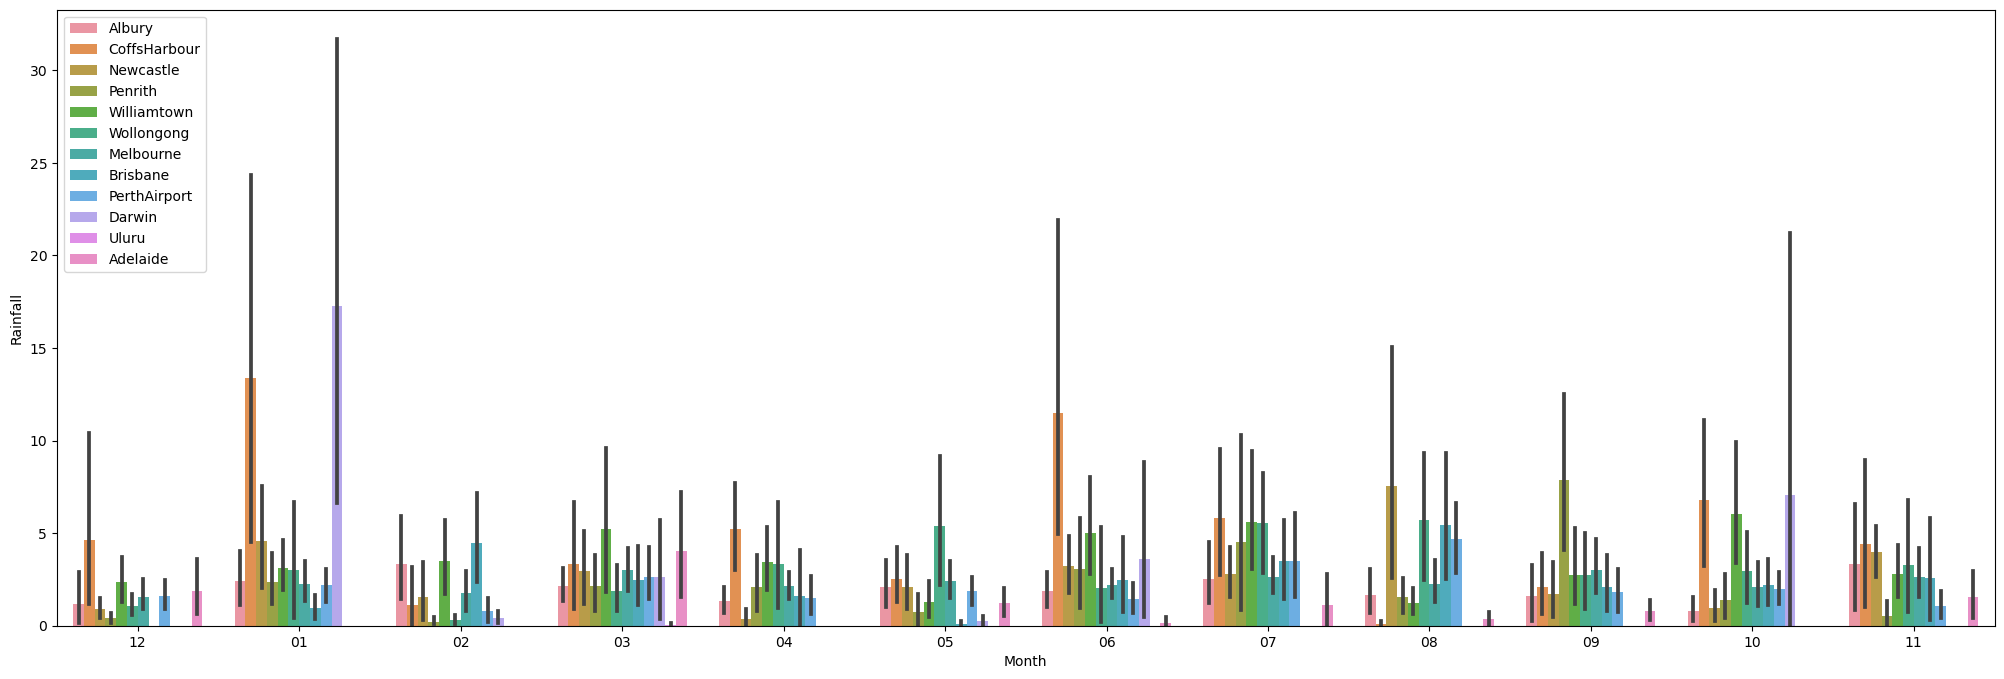

In [38]:

plt.figure(figsize=(25,8))
sns.barplot(df_new,x='Month',y='Rainfall',hue='Location')
plt.legend(loc='upper left')

<Axes: xlabel='Year', ylabel='Rainfall'>

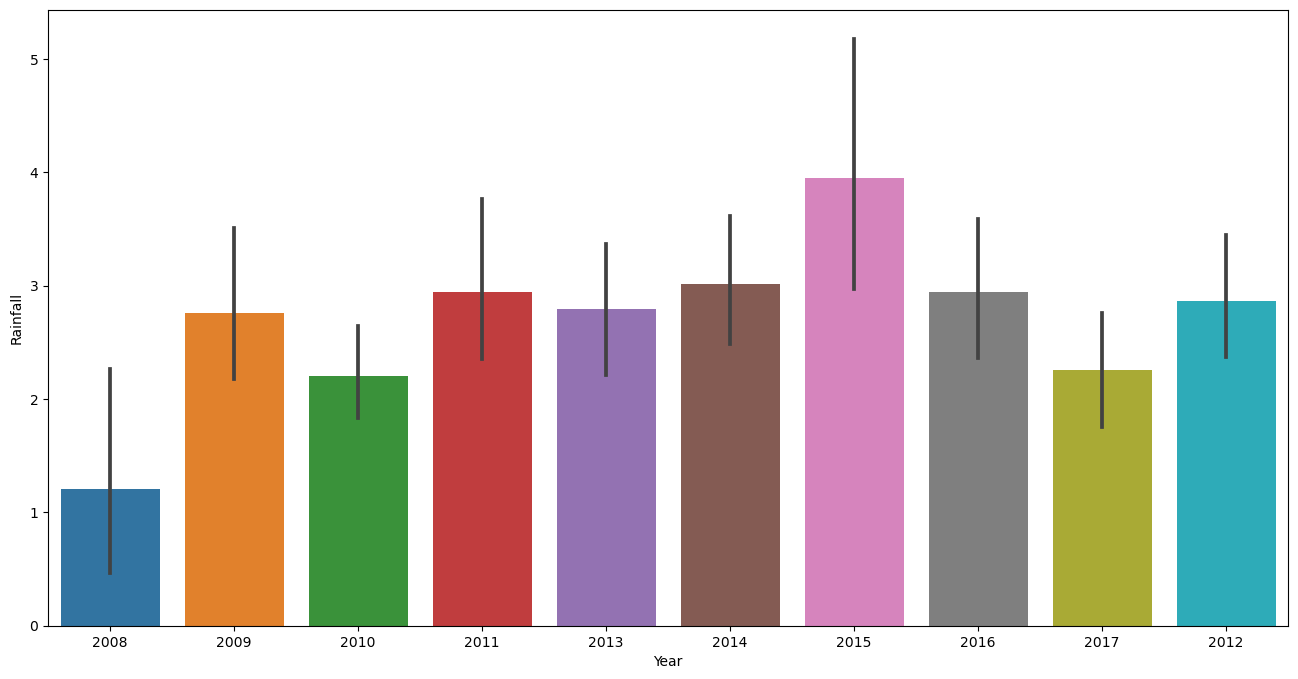

In [39]:
plt.figure(figsize=(16,8))
sns.barplot(df_new,x='Year',y='Rainfall')

<Axes: xlabel='Location', ylabel='Rainfall'>

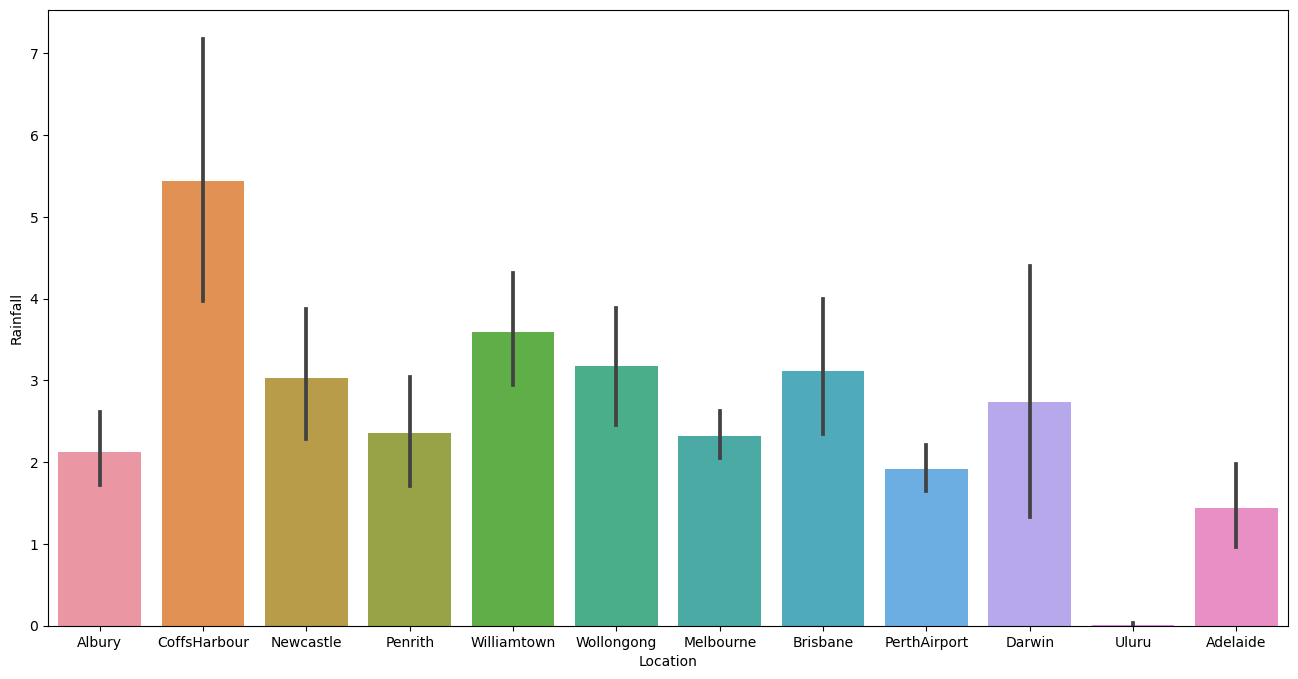

In [40]:
plt.figure(figsize=(16,8))
sns.barplot(df_new,x='Location',y='Rainfall')

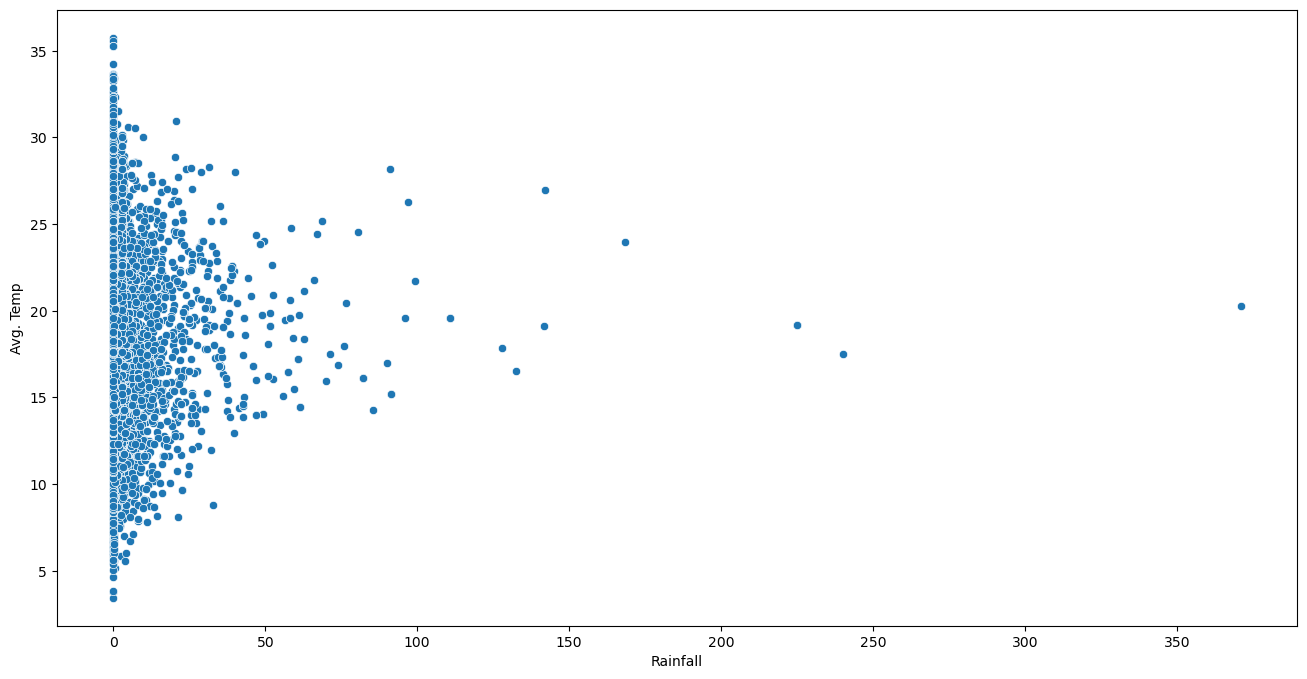

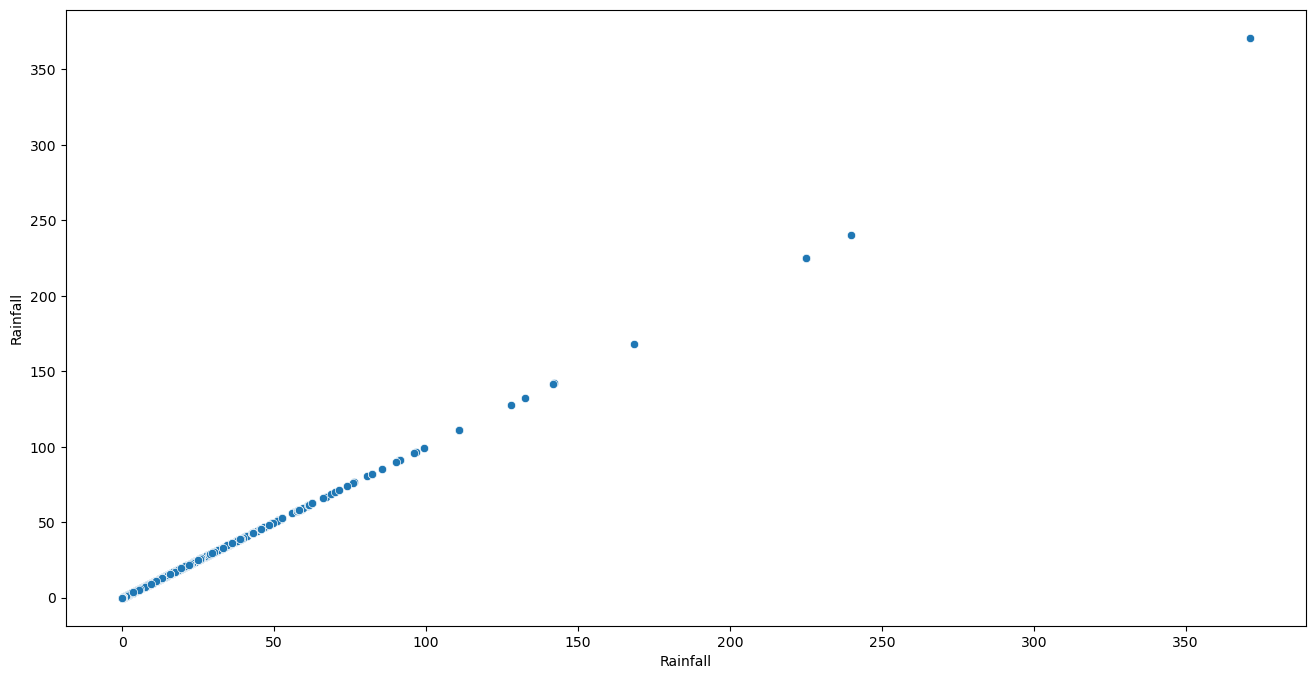

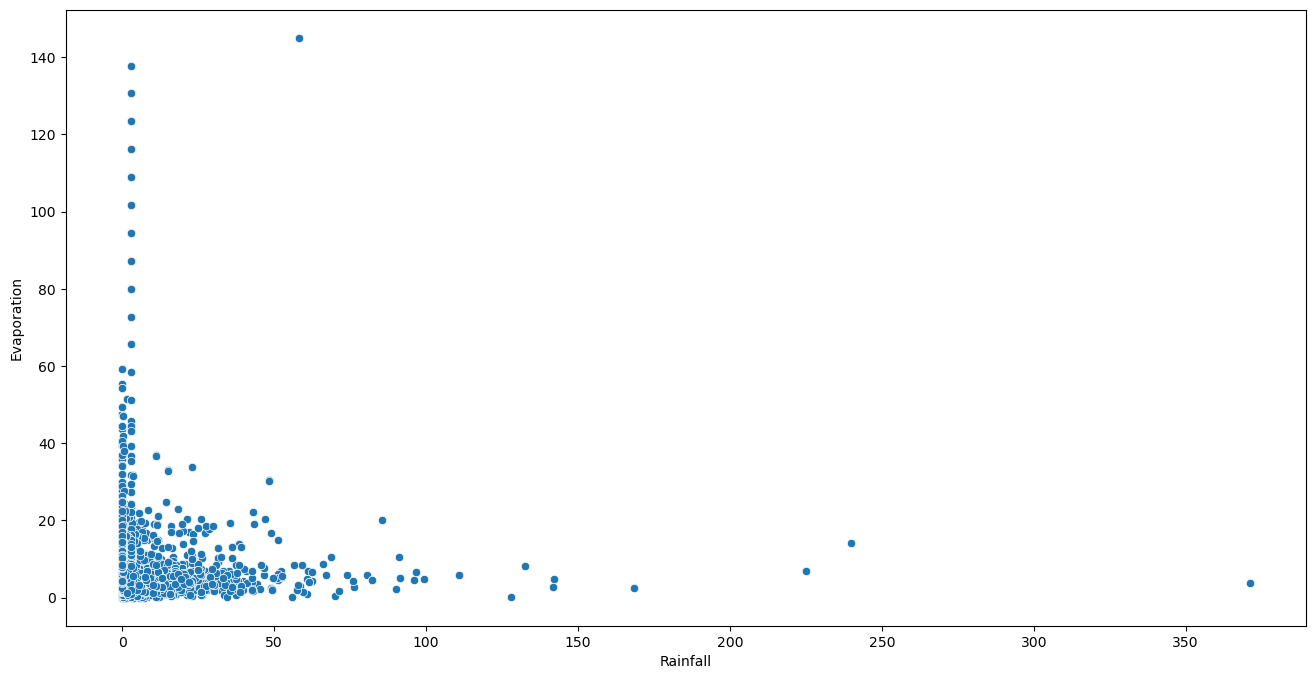

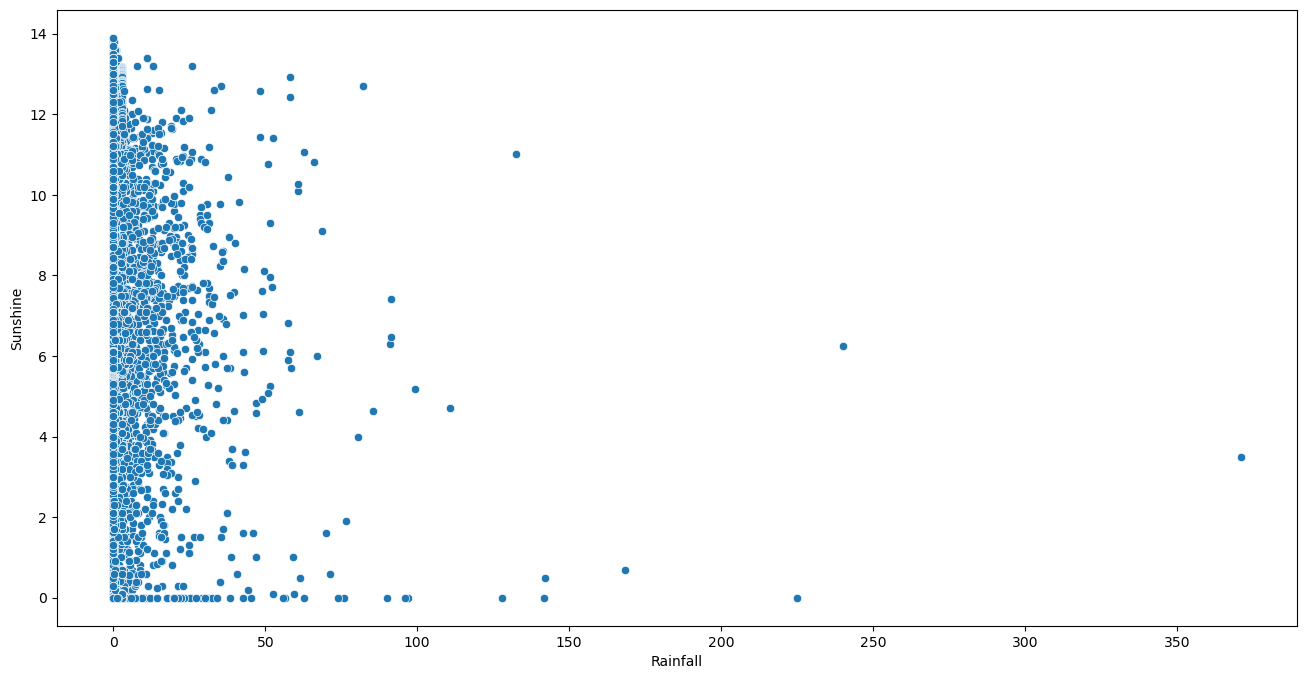

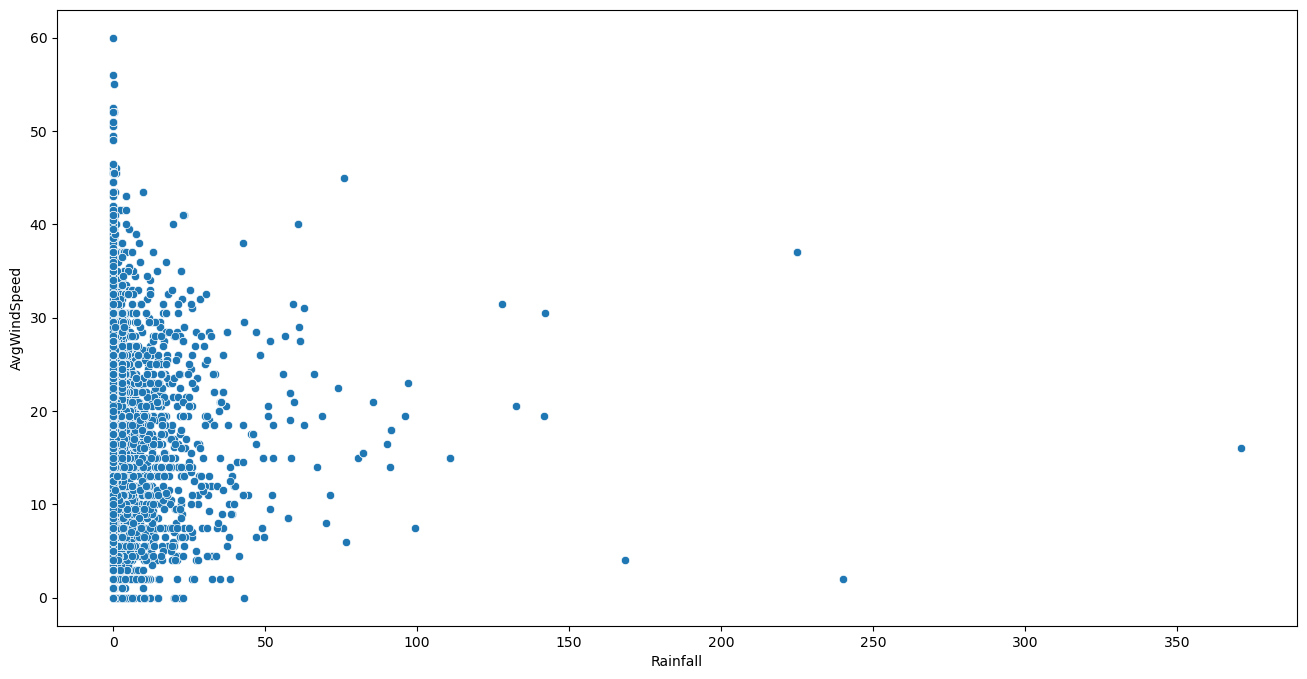

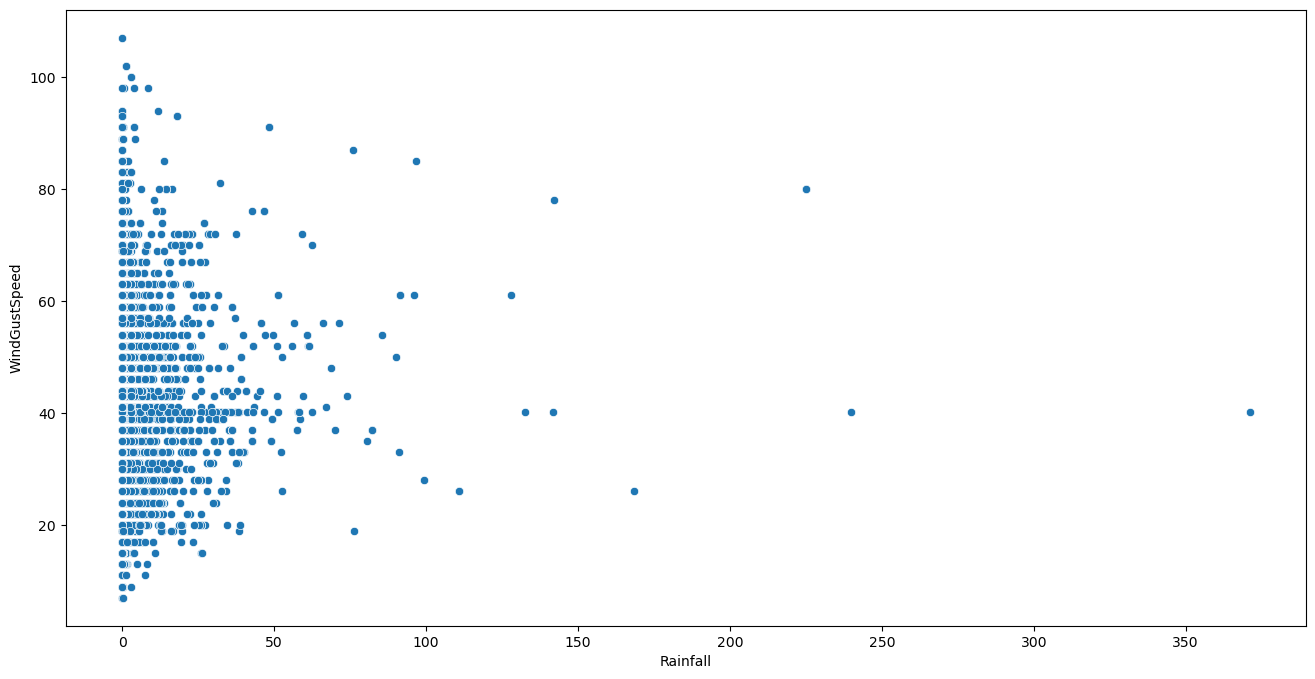

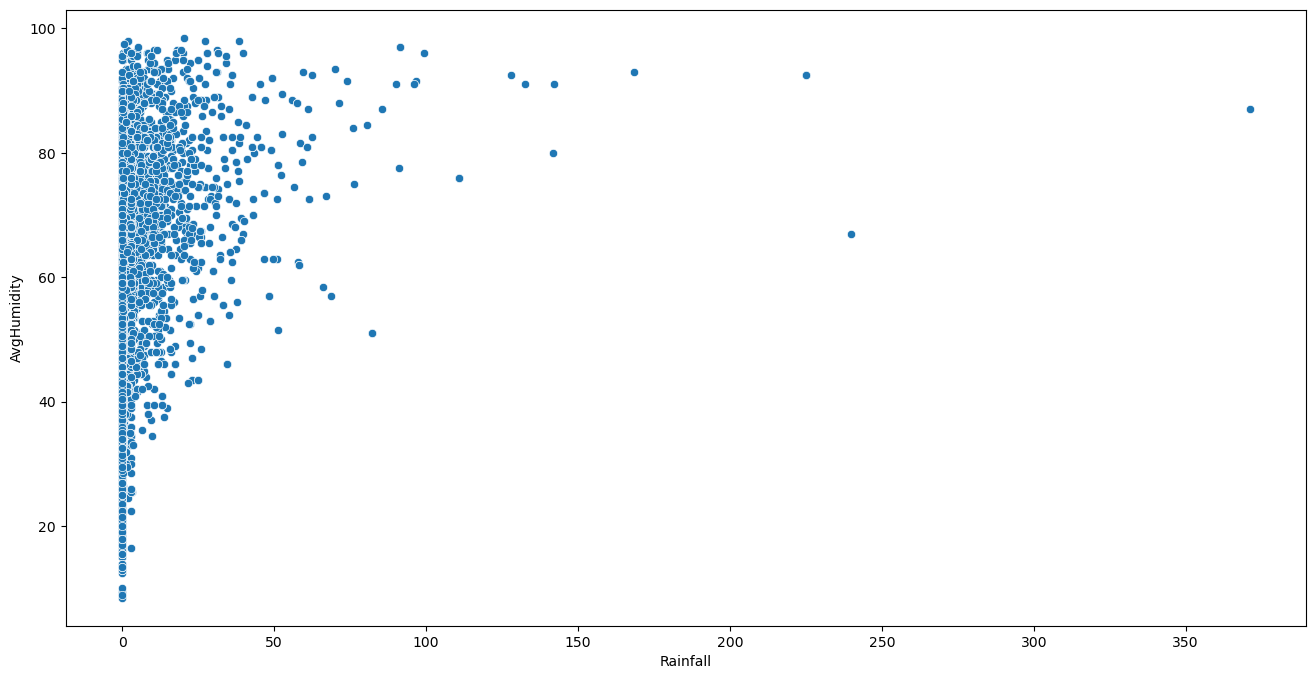

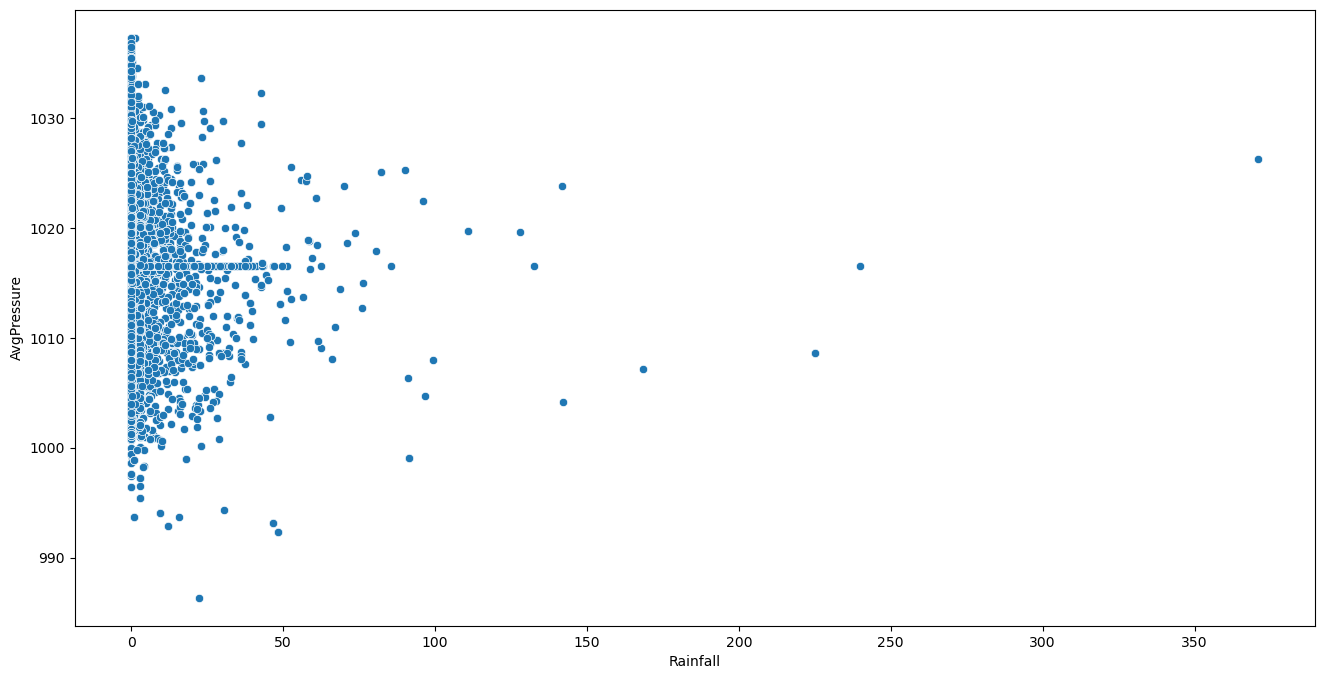

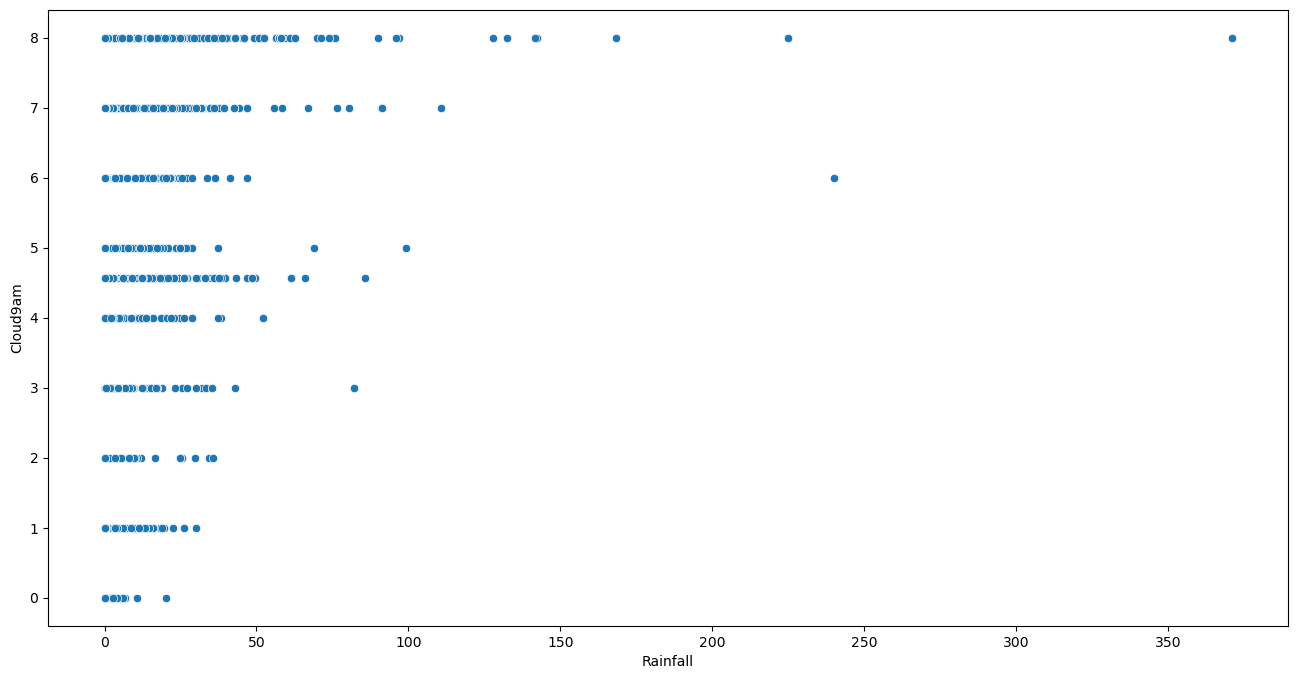

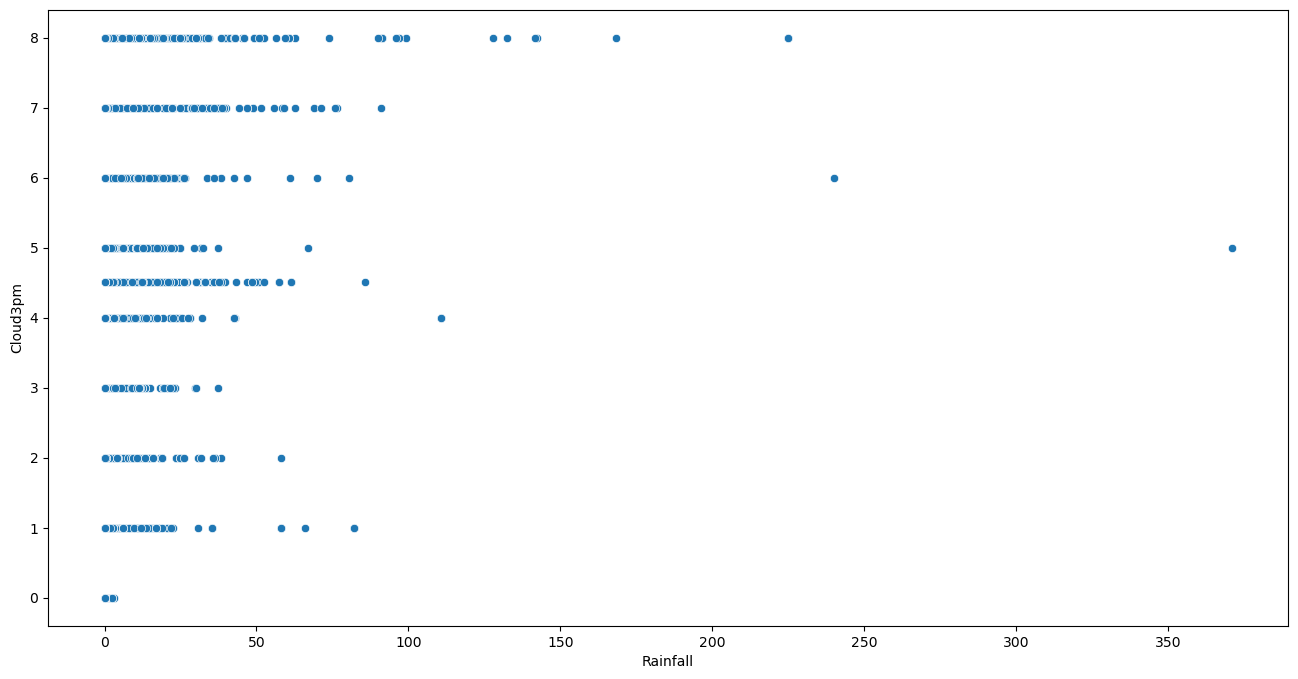

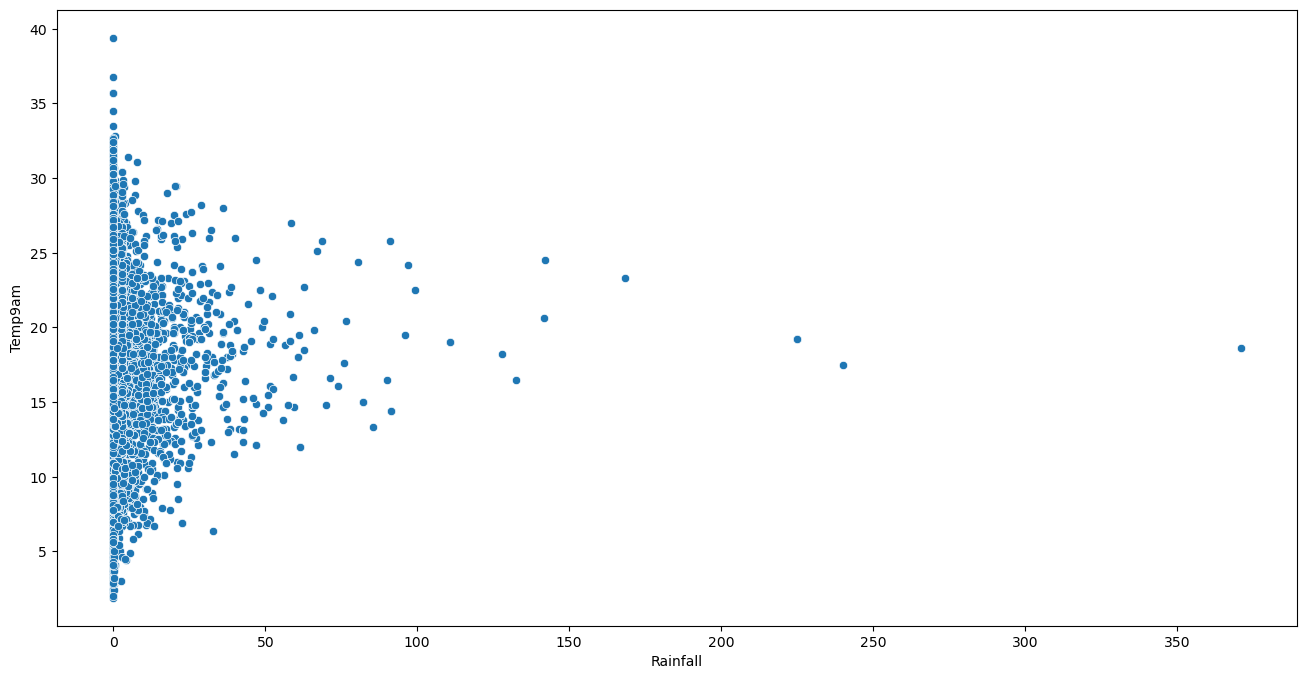

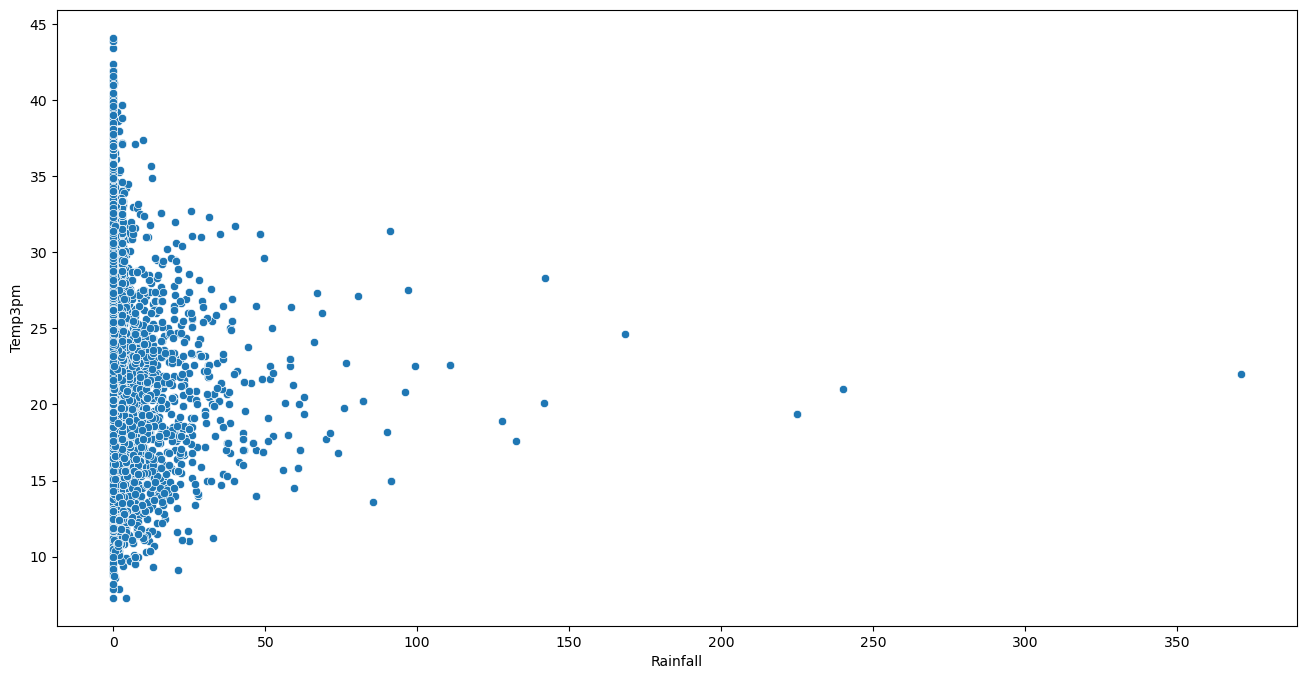

In [41]:
for i in num_col:
    plt.figure(figsize=(16,8))
    sns.scatterplot(df_new,x='Rainfall',y=i)

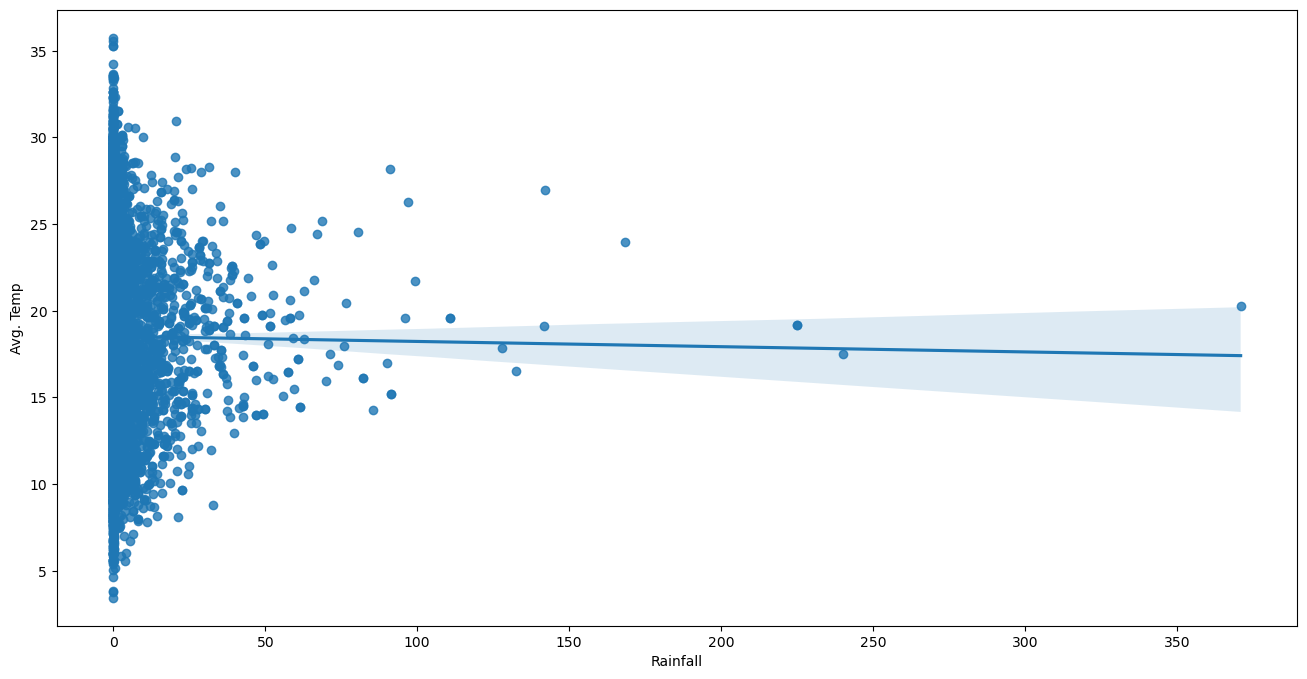

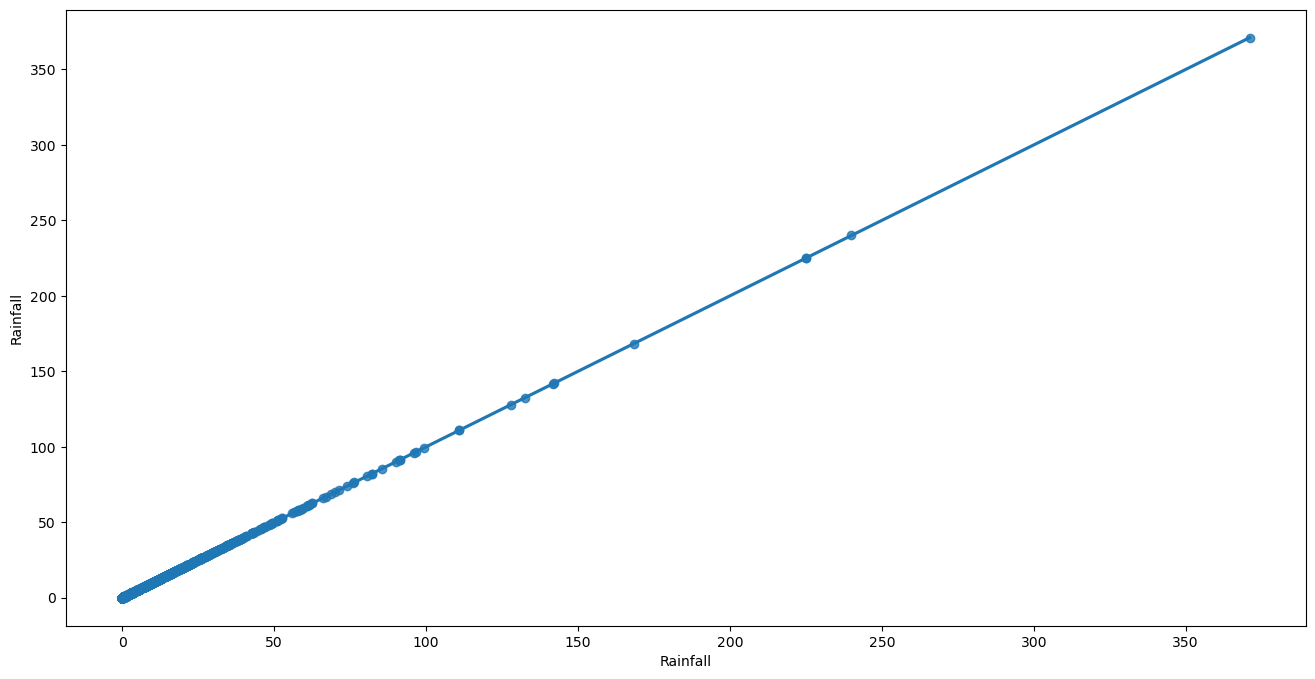

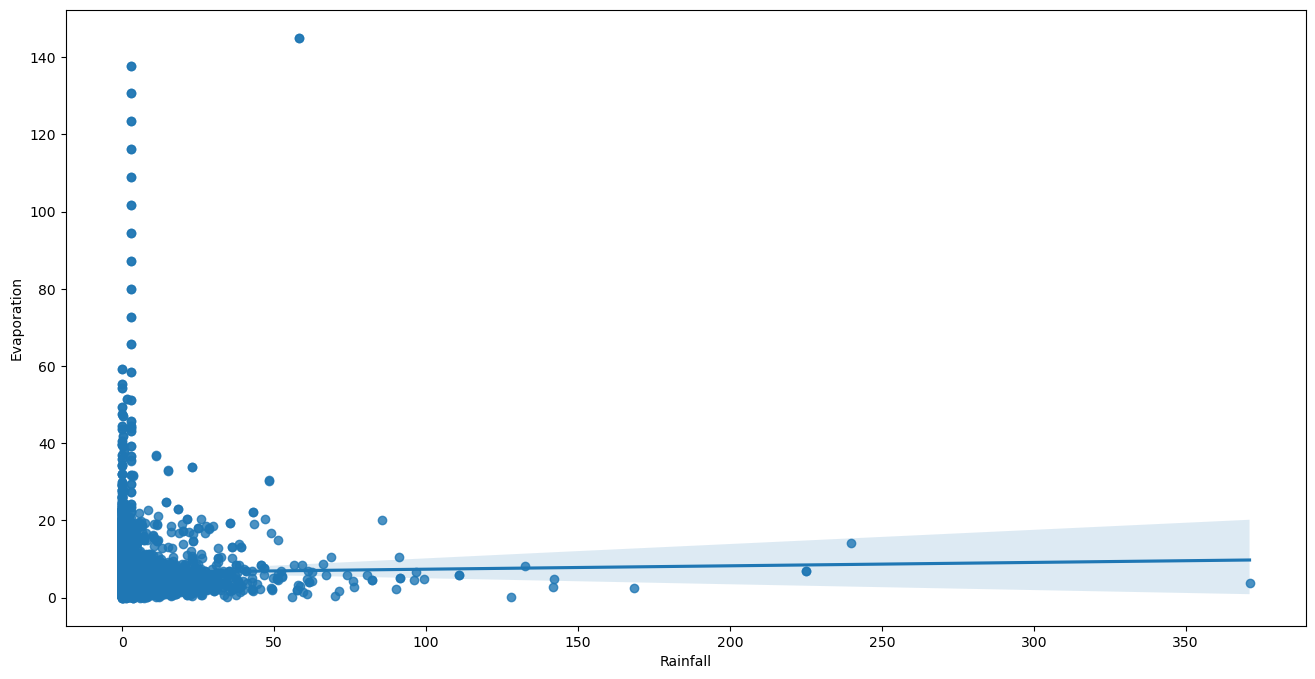

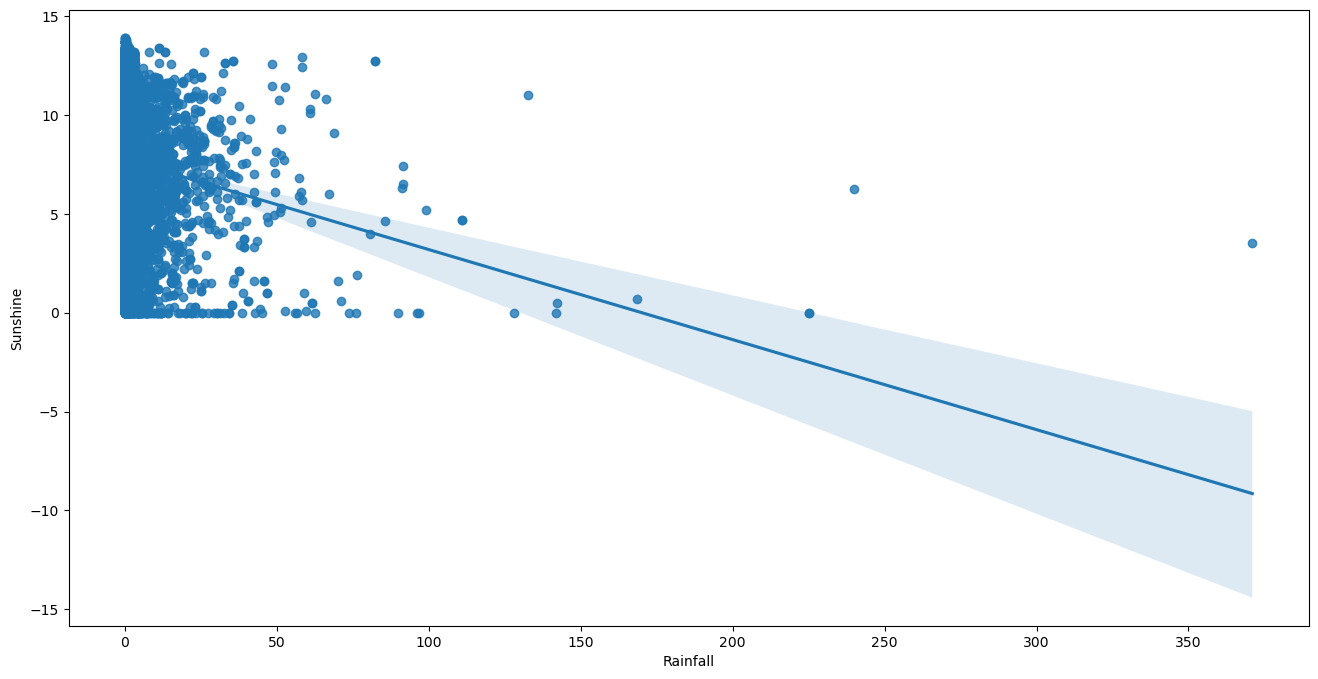

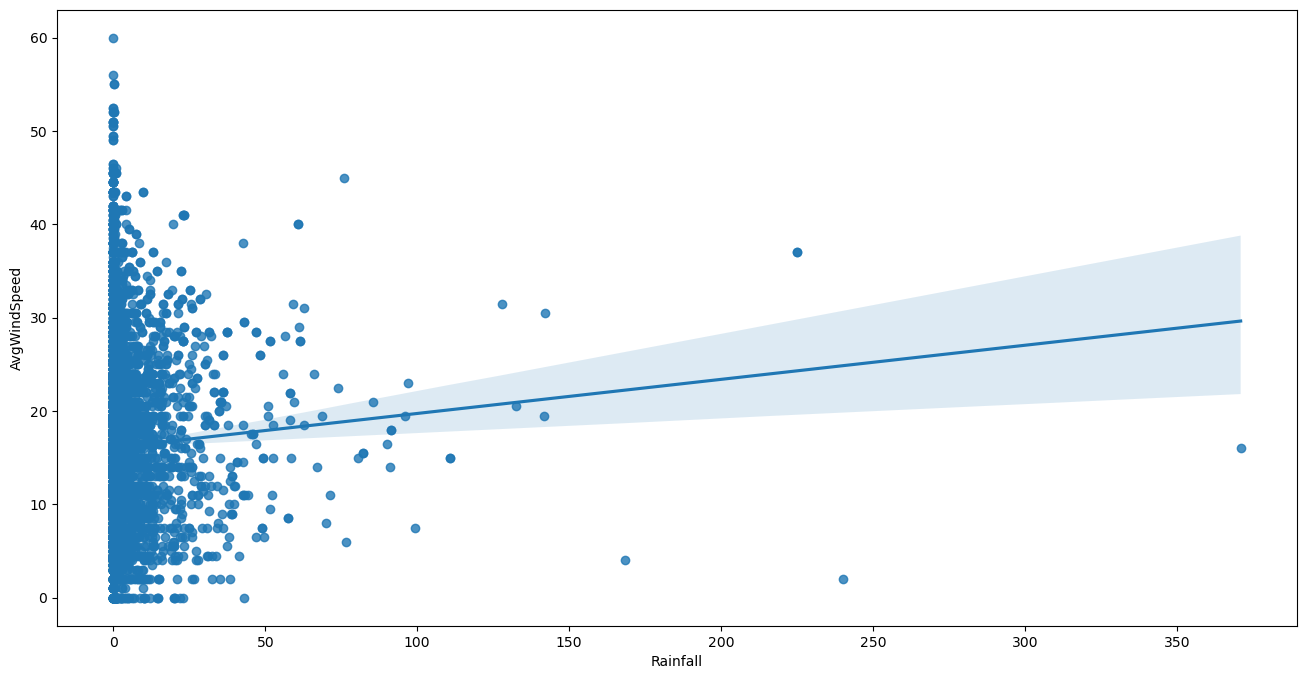

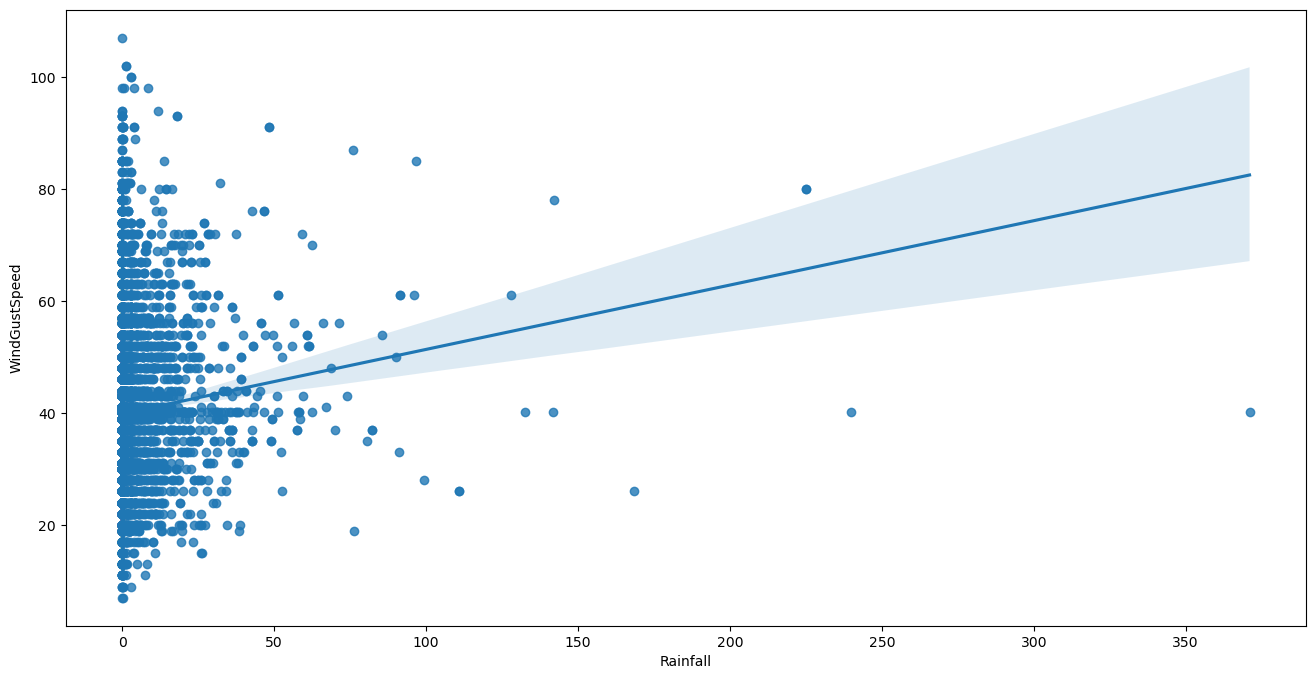

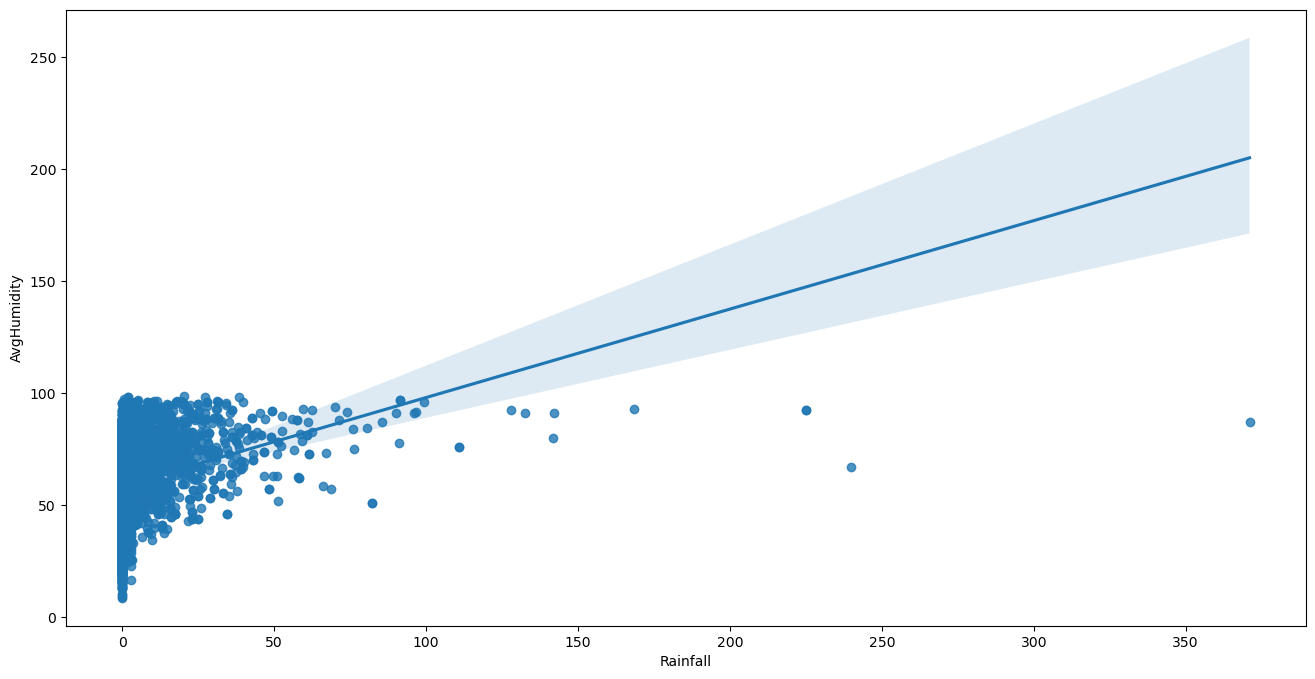

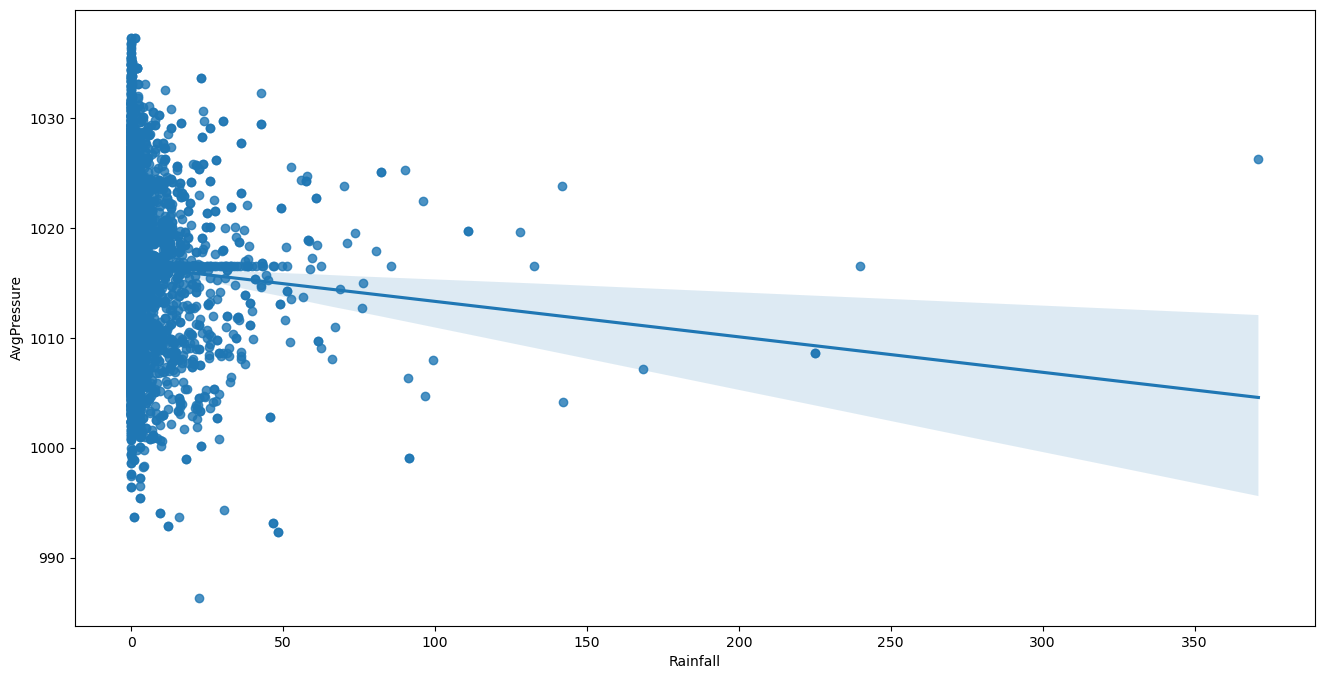

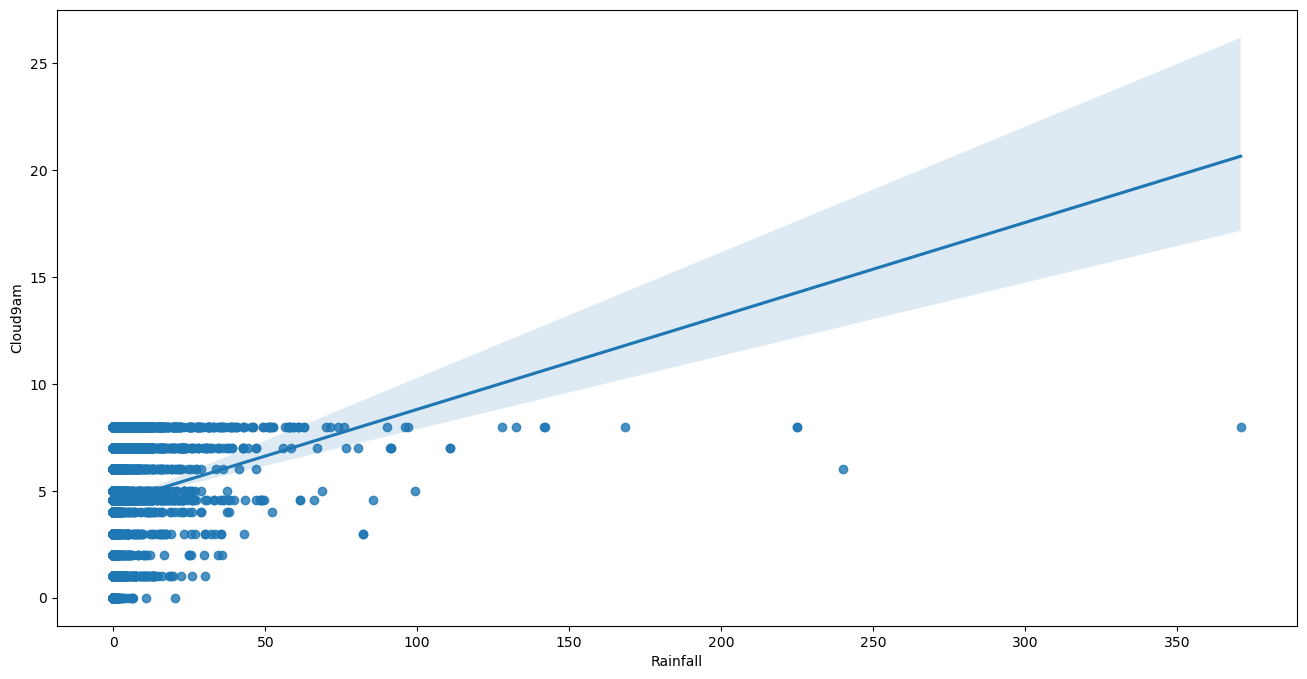

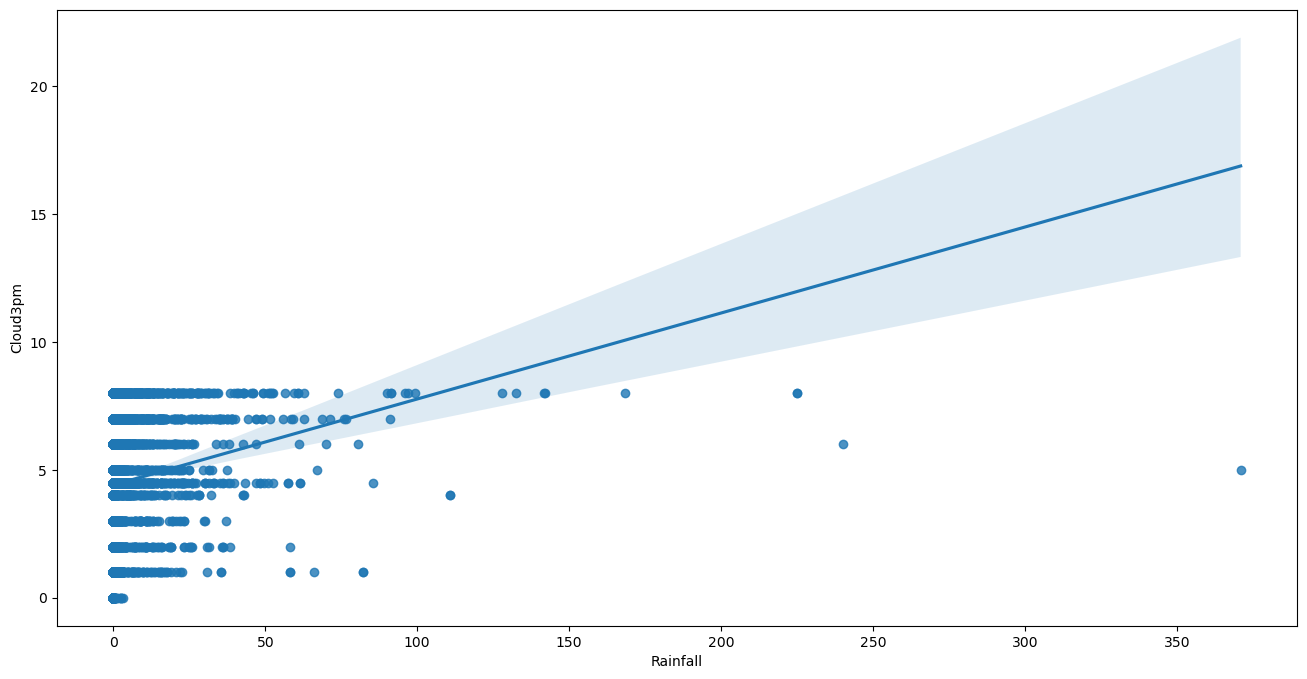

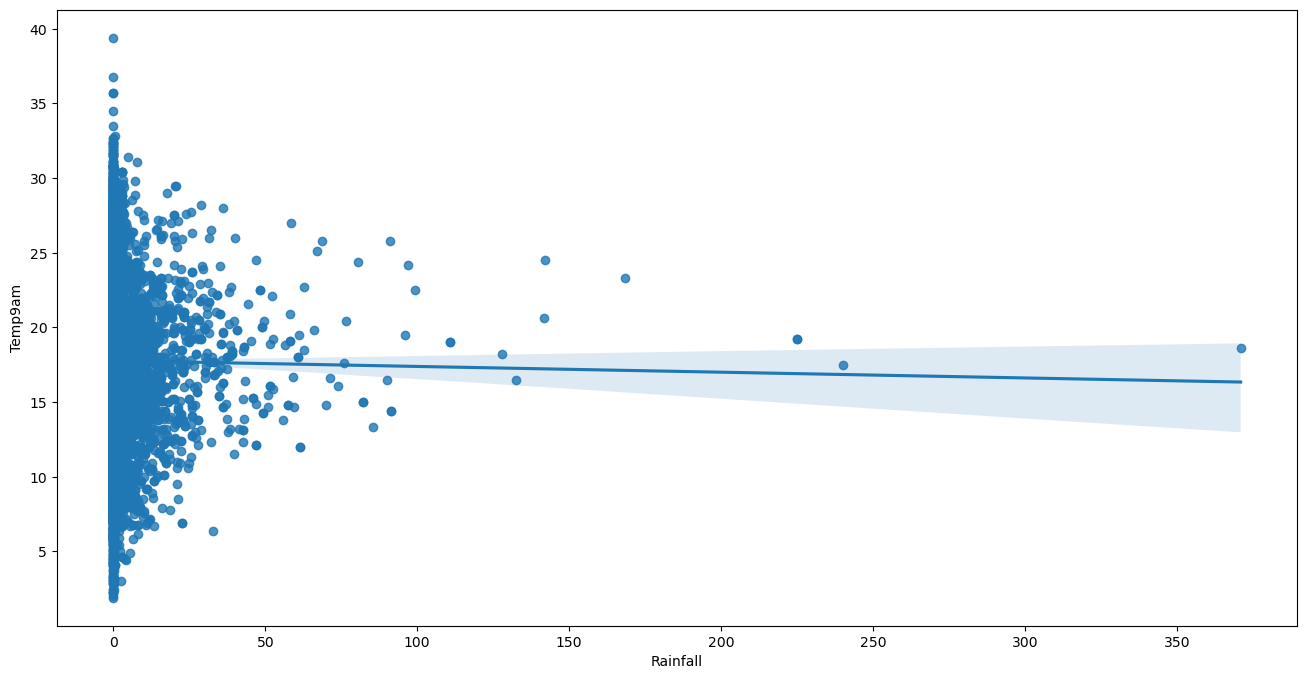

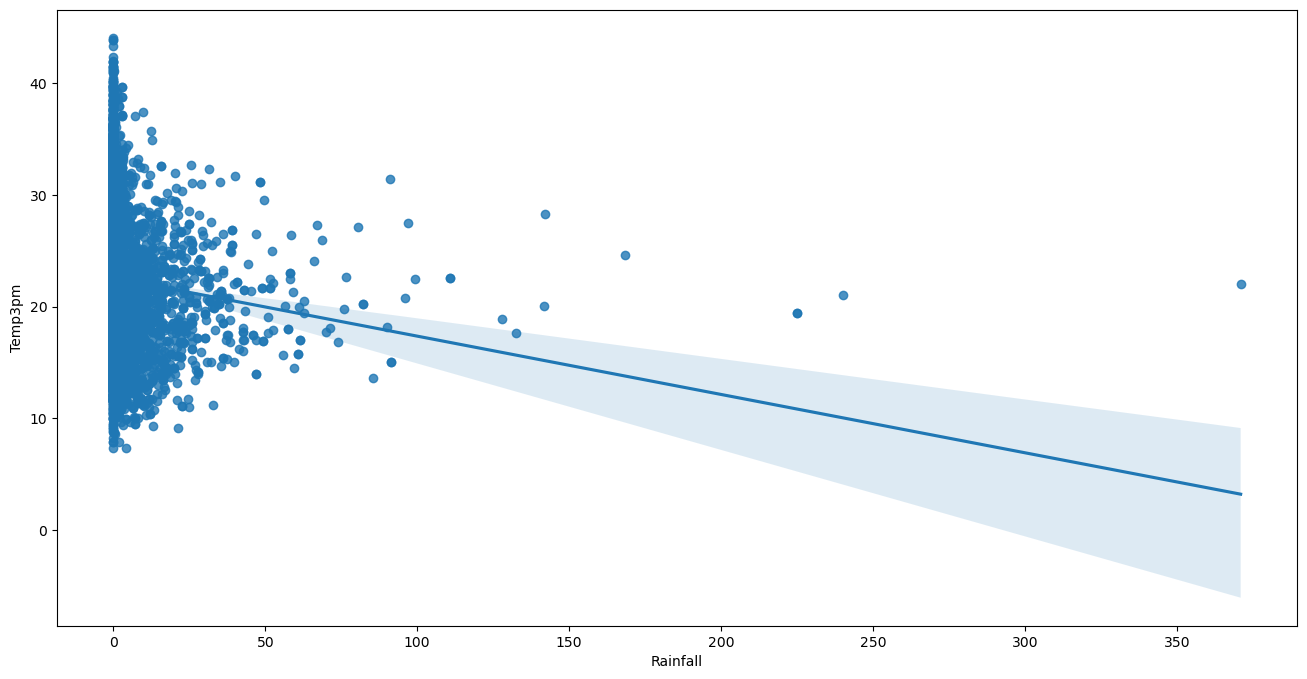

In [42]:
for i in num_col:
    plt.figure(figsize=(16,8))
    sns.regplot(df_new,x='Rainfall',y=i)

In [43]:
num_col

['Avg. Temp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'AvgWindSpeed',
 'WindGustSpeed',
 'AvgHumidity',
 'AvgPressure',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

Text(0.5, 1.0, 'Jan')

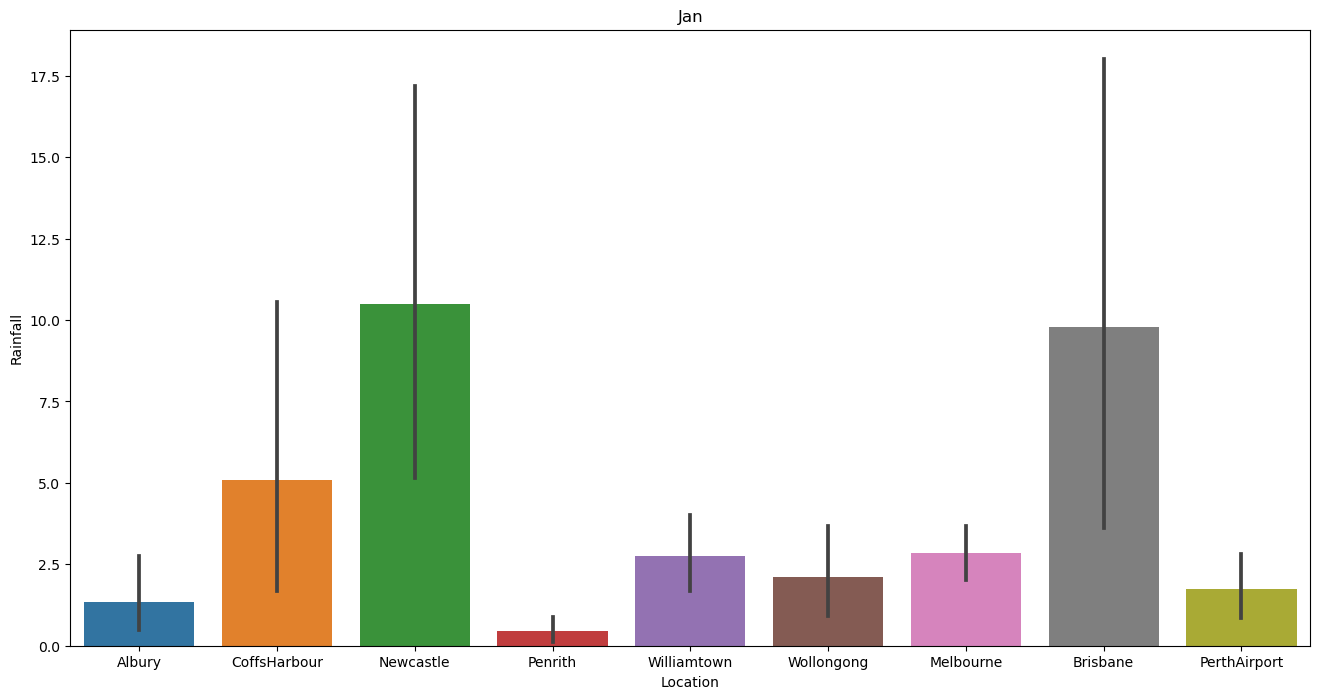

In [44]:

plt.figure(figsize=(16,8))
sns.barplot(df_new,x=data_jan['Location'],y='Rainfall')
plt.title('Jan')

Text(0.5, 1.0, 'Feb')

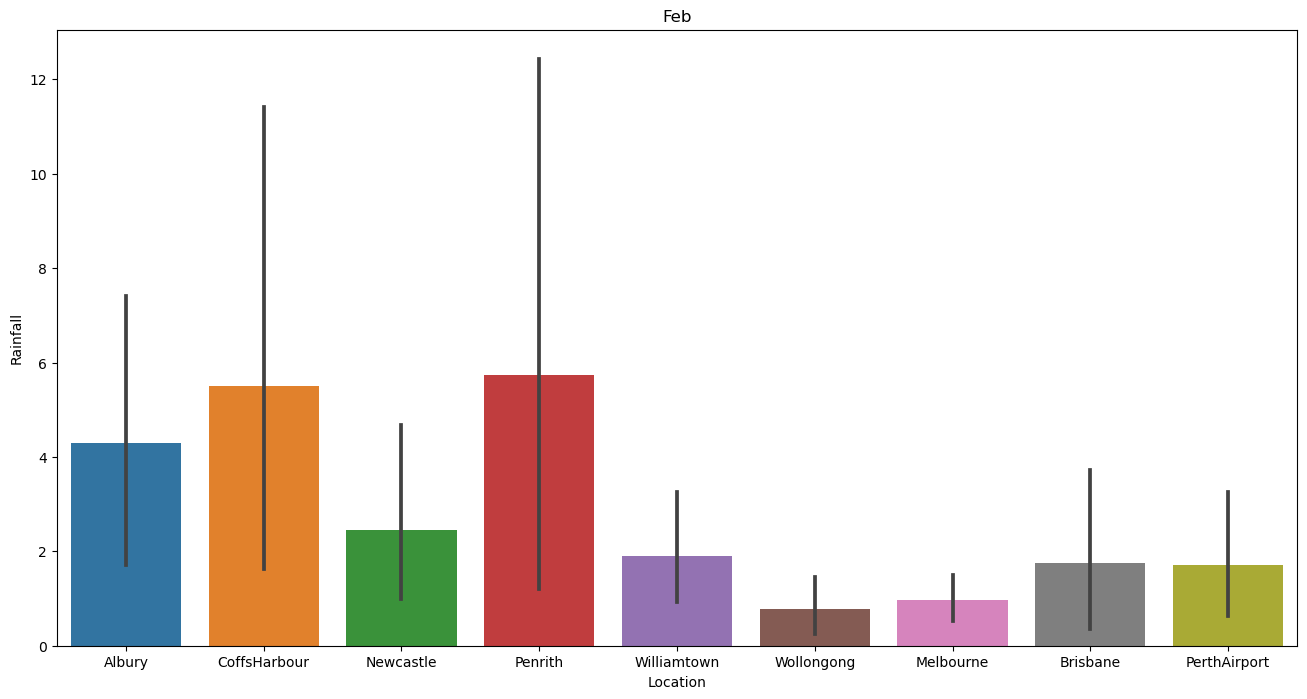

In [45]:

plt.figure(figsize=(16,8))
sns.barplot(df_new,x=data_feb['Location'],y='Rainfall')
plt.title('Feb')

Text(0.5, 1.0, 'March')

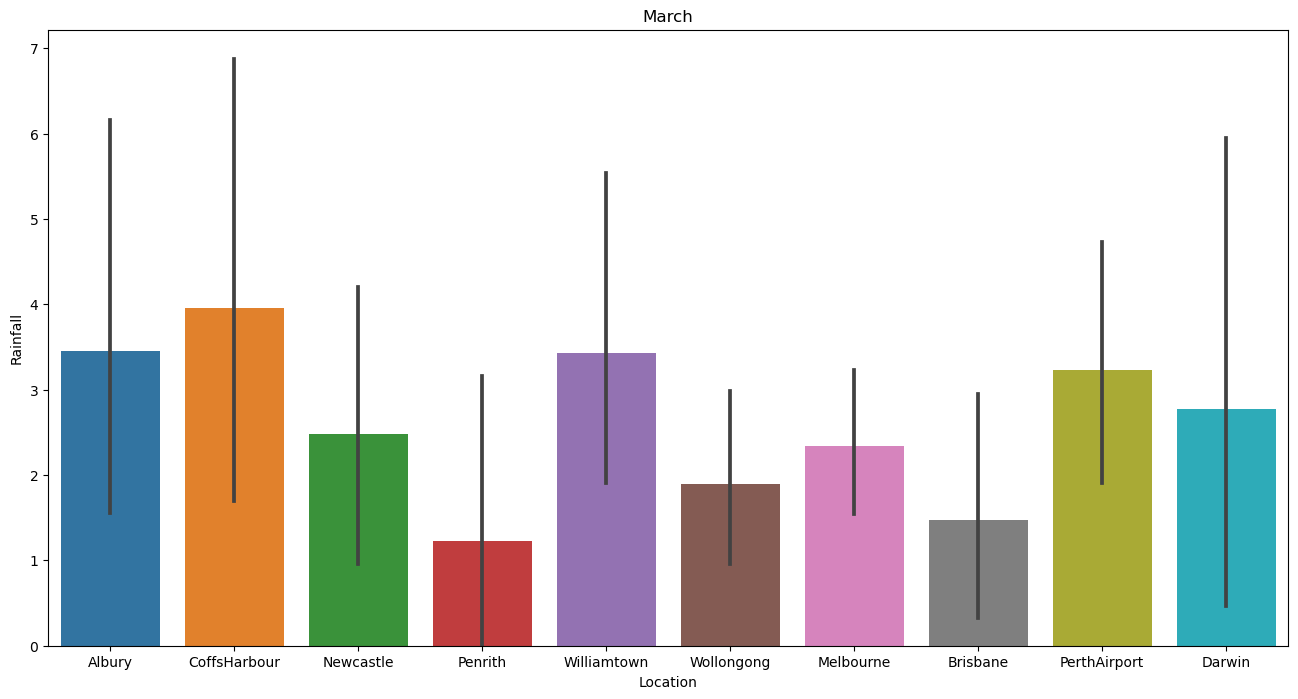

In [46]:

plt.figure(figsize=(16,8))
sns.barplot(df_new,x=data_mar['Location'],y='Rainfall')
plt.title('March')

Text(0.5, 1.0, 'April')

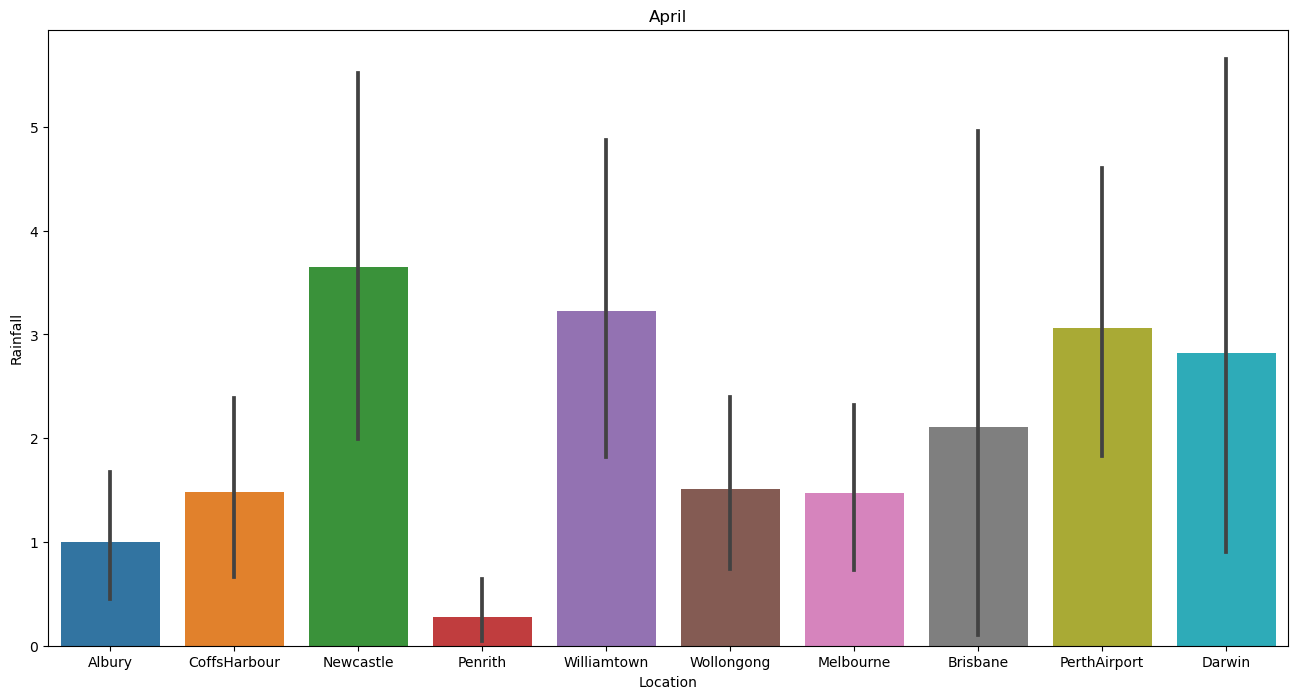

In [47]:

plt.figure(figsize=(16,8))
sns.barplot(df_new,x=data_apr['Location'],y='Rainfall')
plt.title('April')

Text(0.5, 1.0, 'May')

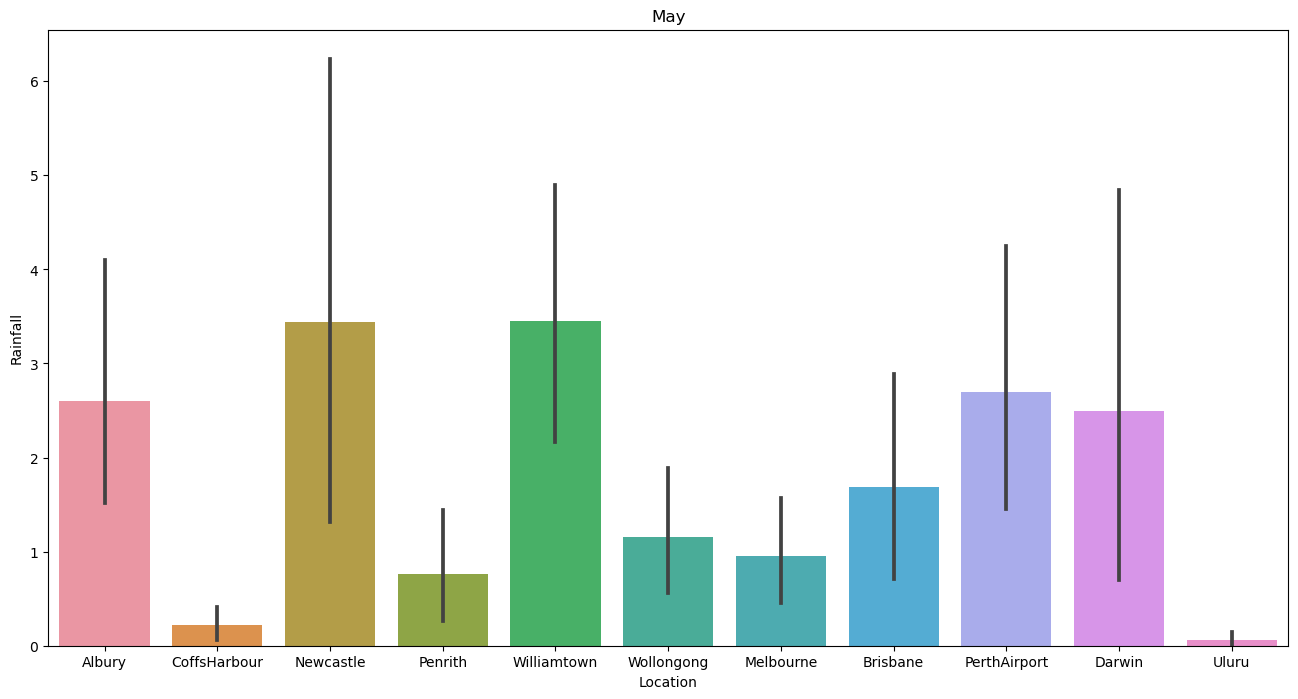

In [48]:

plt.figure(figsize=(16,8))
sns.barplot(df_new,x=data_may['Location'],y='Rainfall')
plt.title('May')

Text(0.5, 1.0, 'June')

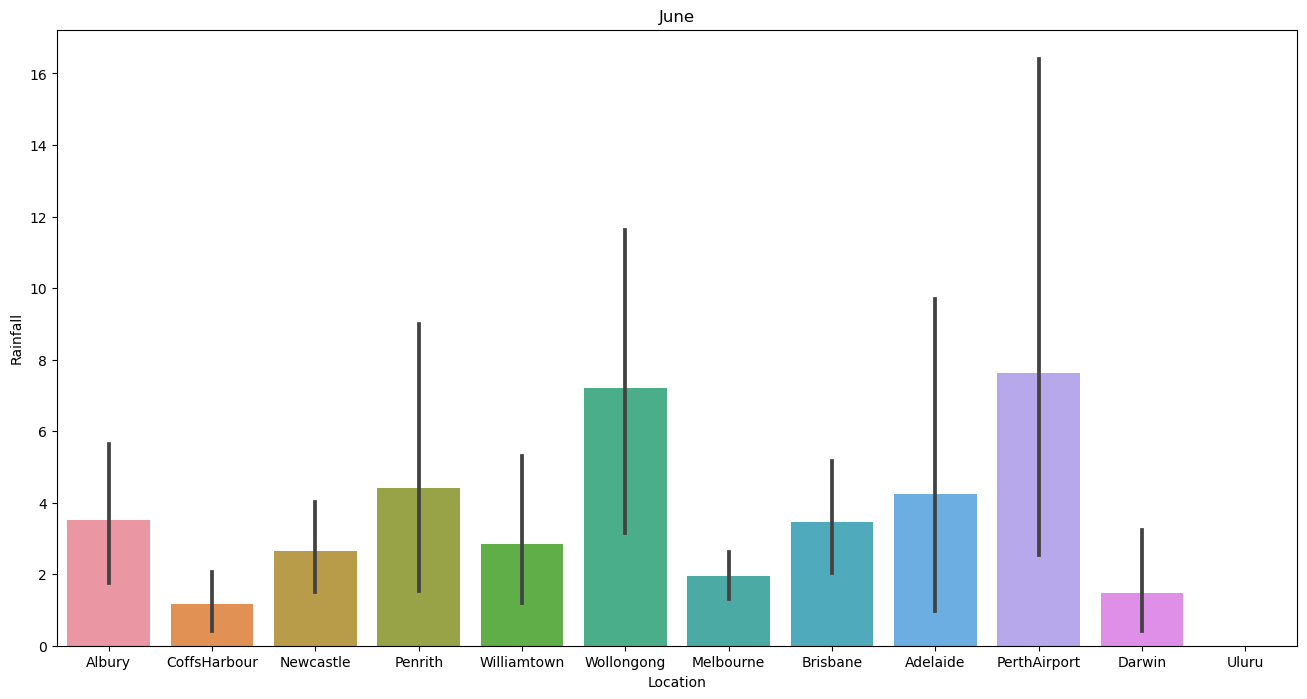

In [49]:

plt.figure(figsize=(16,8))
sns.barplot(df_new,x=data_jun['Location'],y='Rainfall')
plt.title('June')

Text(0.5, 1.0, 'July')

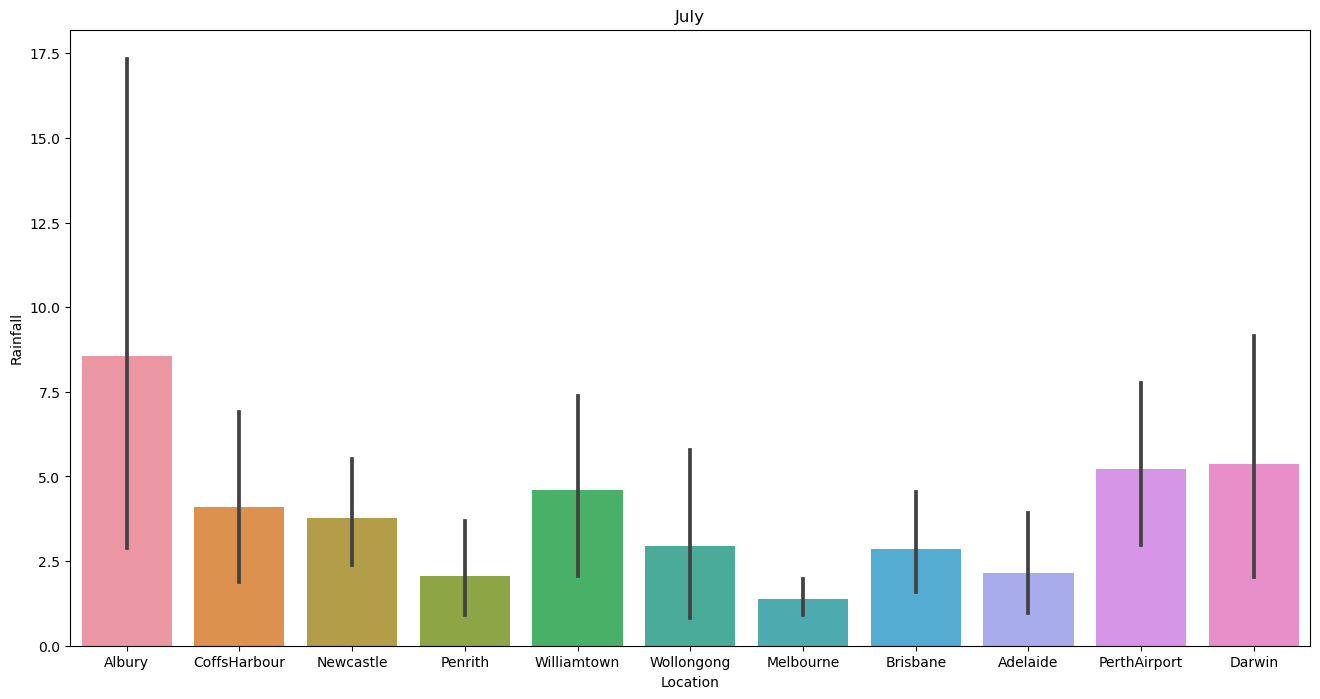

In [50]:

plt.figure(figsize=(16,8))
sns.barplot(df_new,x=data_jul['Location'],y='Rainfall')
plt.title('July')

Text(0.5, 1.0, 'Aug')

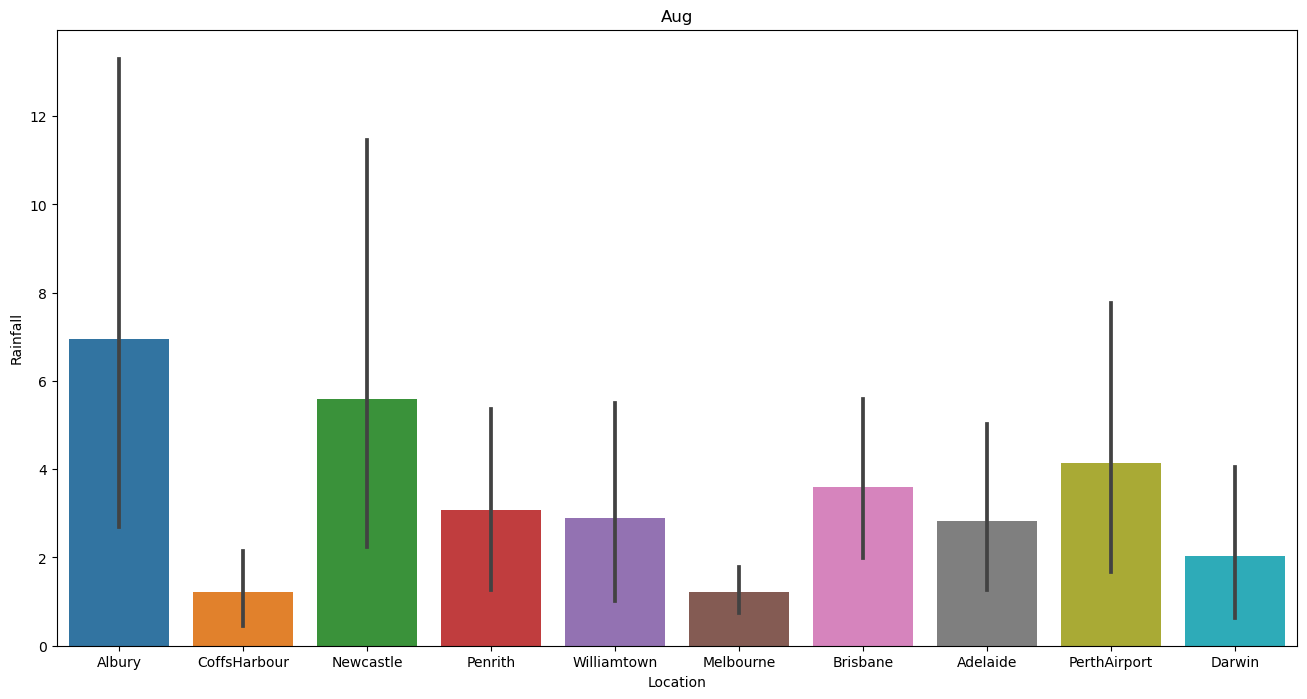

In [51]:

plt.figure(figsize=(16,8))
sns.barplot(df_new,x=data_aug['Location'],y='Rainfall')
plt.title('Aug')

Text(0.5, 1.0, 'Sept')

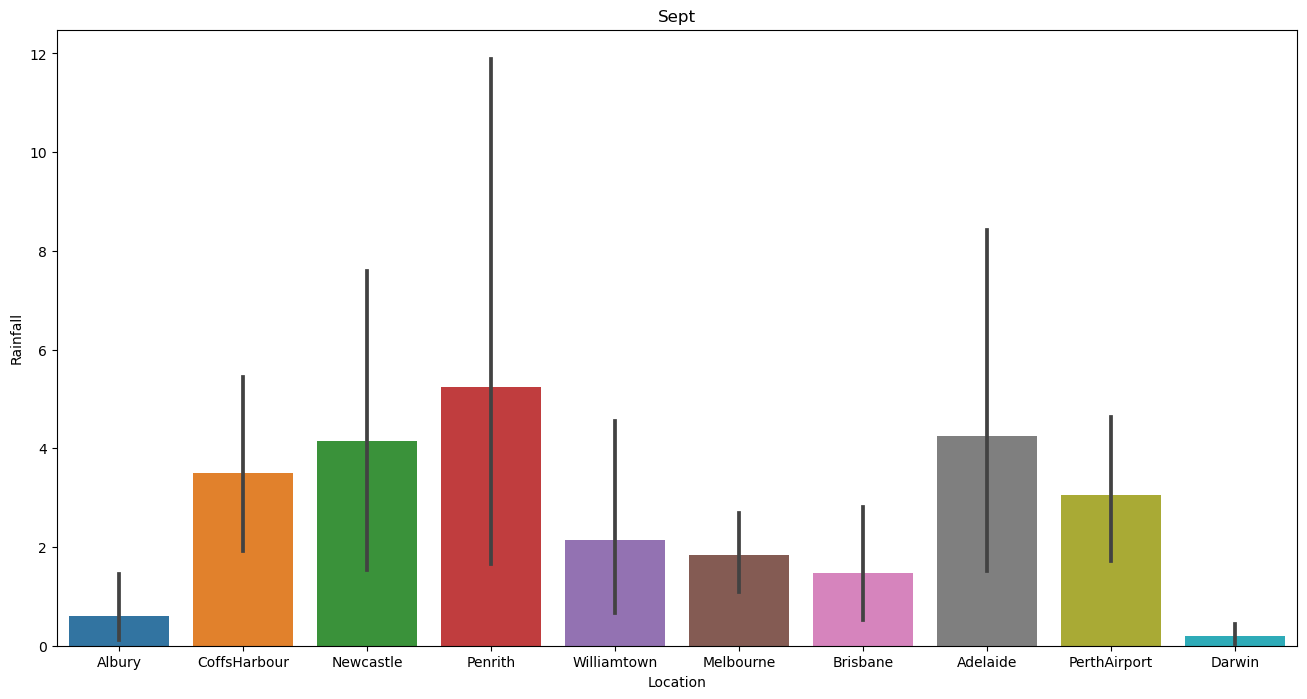

In [52]:

plt.figure(figsize=(16,8))
sns.barplot(df_new,x=data_sep['Location'],y='Rainfall')
plt.title('Sept')

Text(0.5, 1.0, 'Oct')

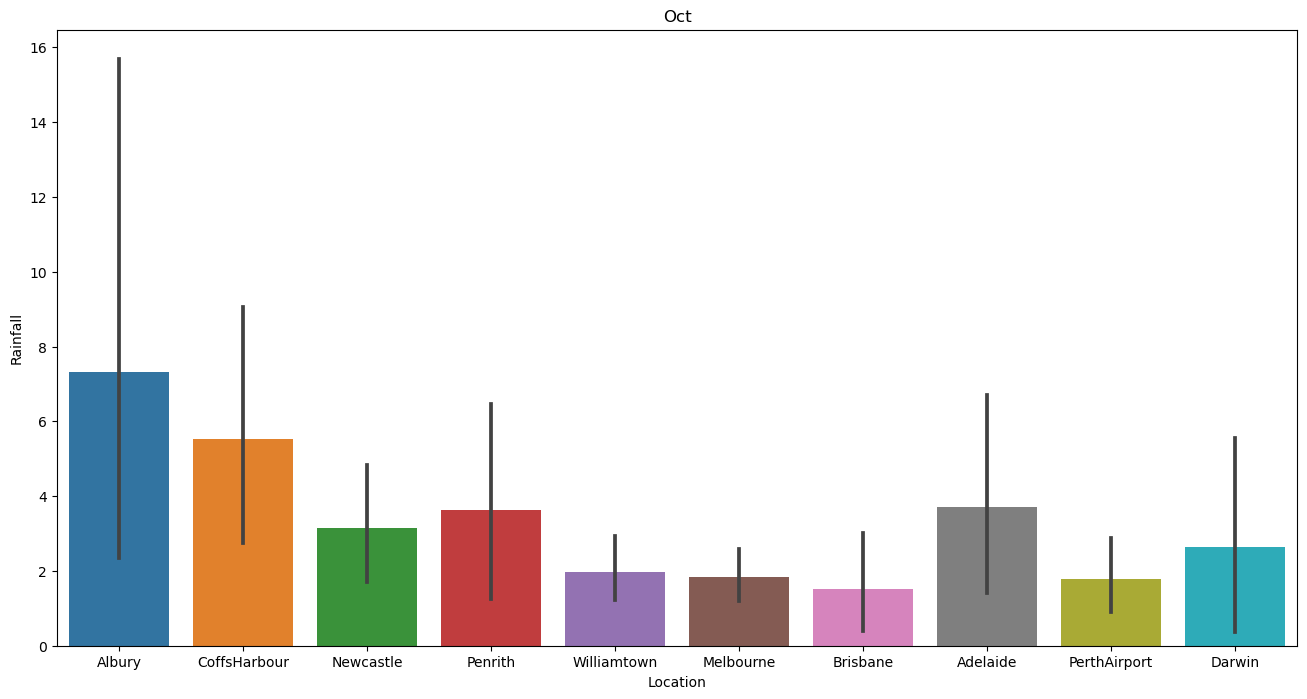

In [53]:

plt.figure(figsize=(16,8))
sns.barplot(df_new,x=data_oct['Location'],y='Rainfall')
plt.title('Oct')

Text(0.5, 1.0, 'Nov')

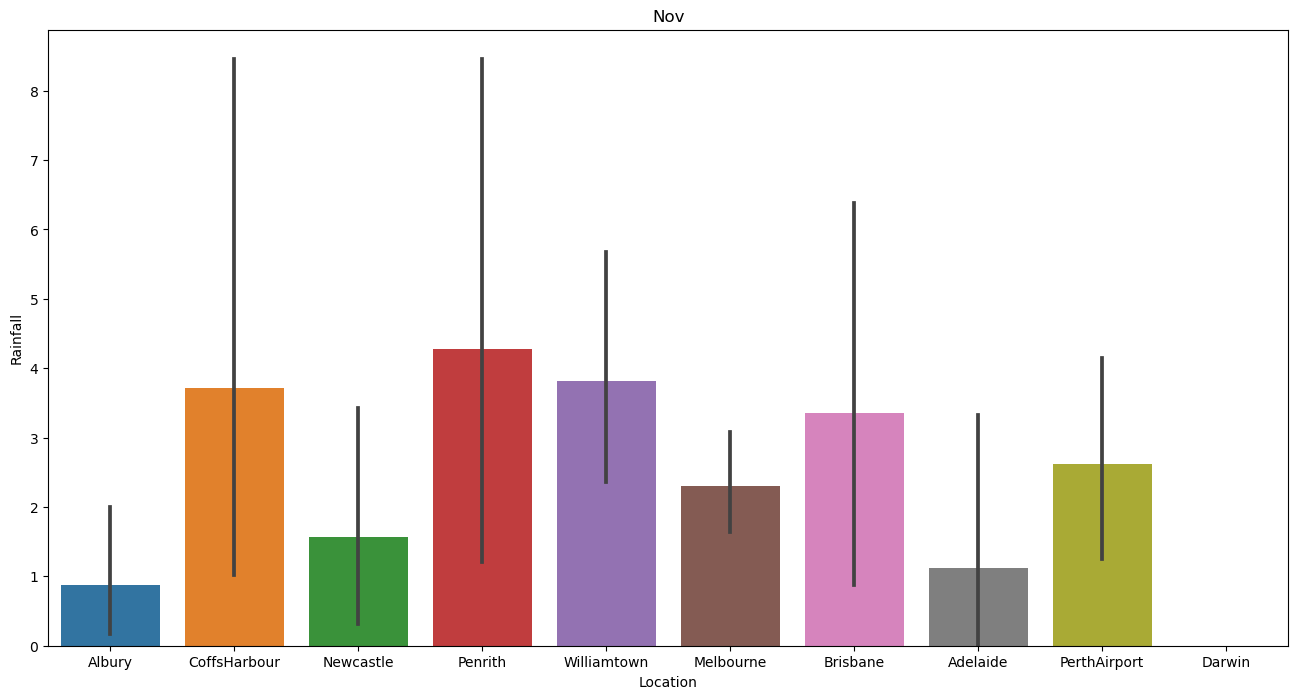

In [54]:

plt.figure(figsize=(16,8))
sns.barplot(df_new,x=data_nov['Location'],y='Rainfall')
plt.title('Nov')

Text(0.5, 1.0, 'Dec')

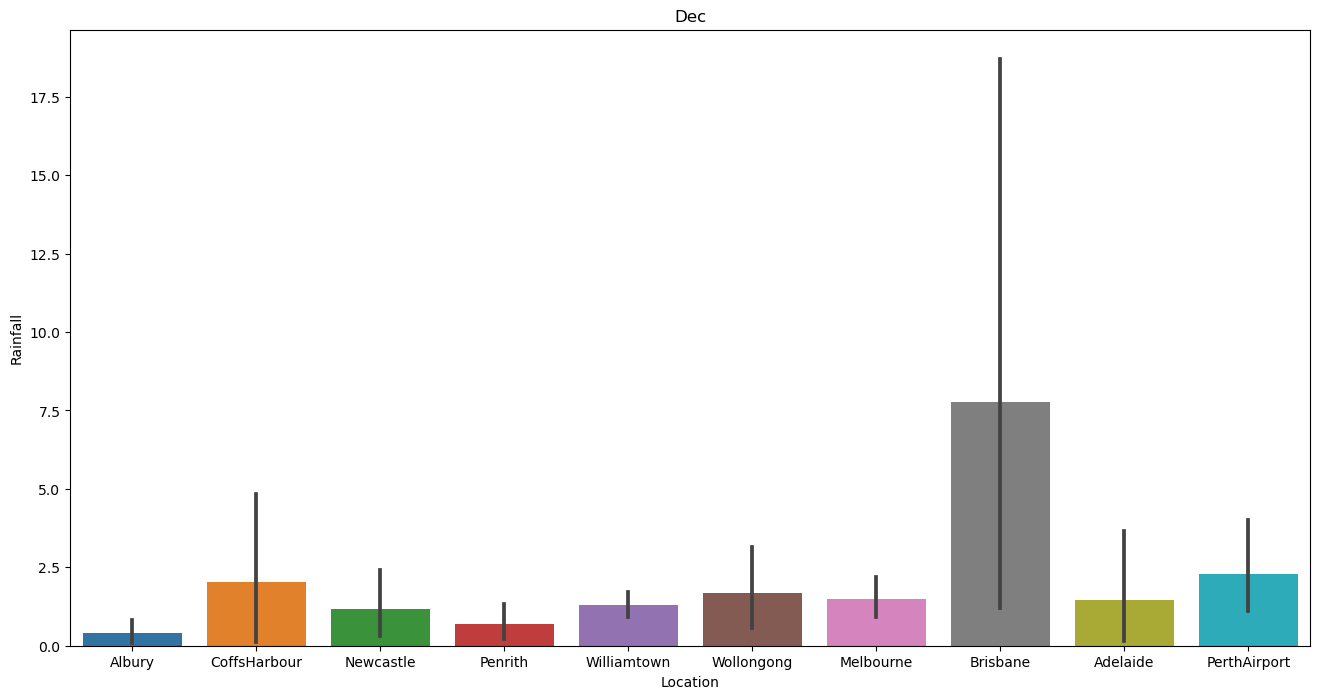

In [55]:

plt.figure(figsize=(16,8))
sns.barplot(df_new,x=data_dec['Location'],y='Rainfall')
plt.title('Dec')

<Figure size 1600x800 with 0 Axes>

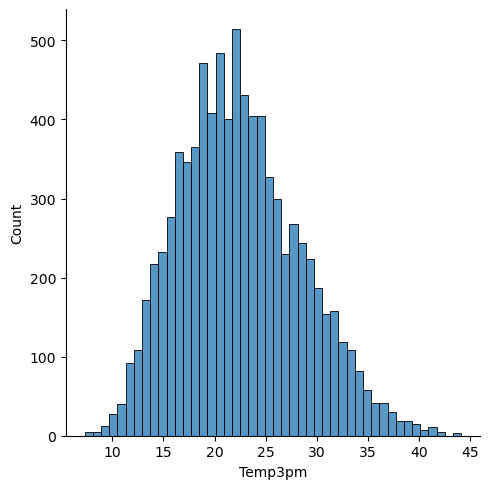

In [56]:
plt.figure(figsize=(16,8))
sns.displot(df_new,x='Temp3pm')

<Figure size 1600x800 with 0 Axes>

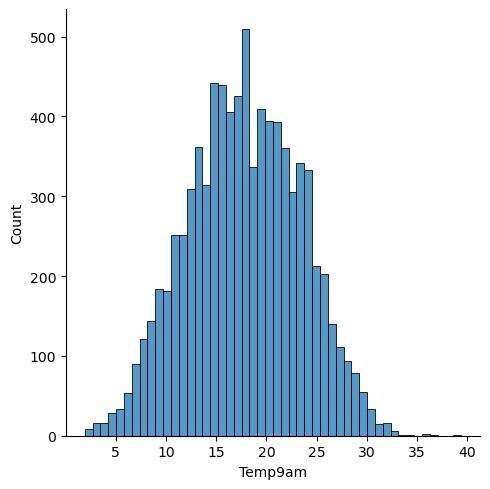

In [57]:
plt.figure(figsize=(16,8))
sns.displot(df_new,x='Temp9am')

In [58]:
float_col=['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']
int_col=['WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
'Cloud9am',
 'Cloud3pm']

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_new.columns:
    df_new[i]=le.fit_transform(df_new[i])

In [60]:
df_new.skew()

Location        -0.050456
Month            0.039388
Year             0.418663
Avg. Temp        0.048767
Rainfall         3.490402
Evaporation      0.079615
Sunshine        -0.120656
WindGustDir      0.119640
AvgWindSpeed     0.383417
WindGustSpeed    0.703261
WindDir9am       0.172792
AvgHumidity      0.049971
AvgPressure      0.074764
WindDir3pm      -0.119847
Cloud9am        -0.315337
Cloud3pm        -0.250320
Temp9am         -0.026293
Temp3pm          0.382645
RainToday        1.242362
RainTomorrow     1.241588
dtype: float64

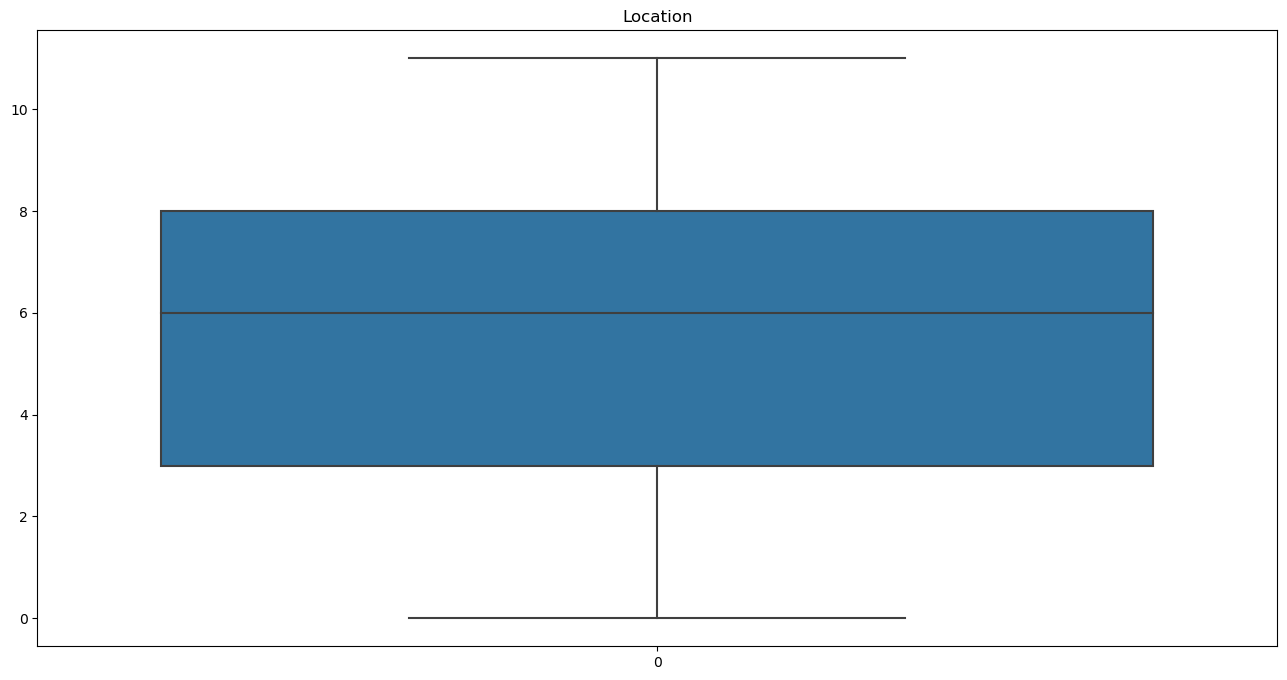

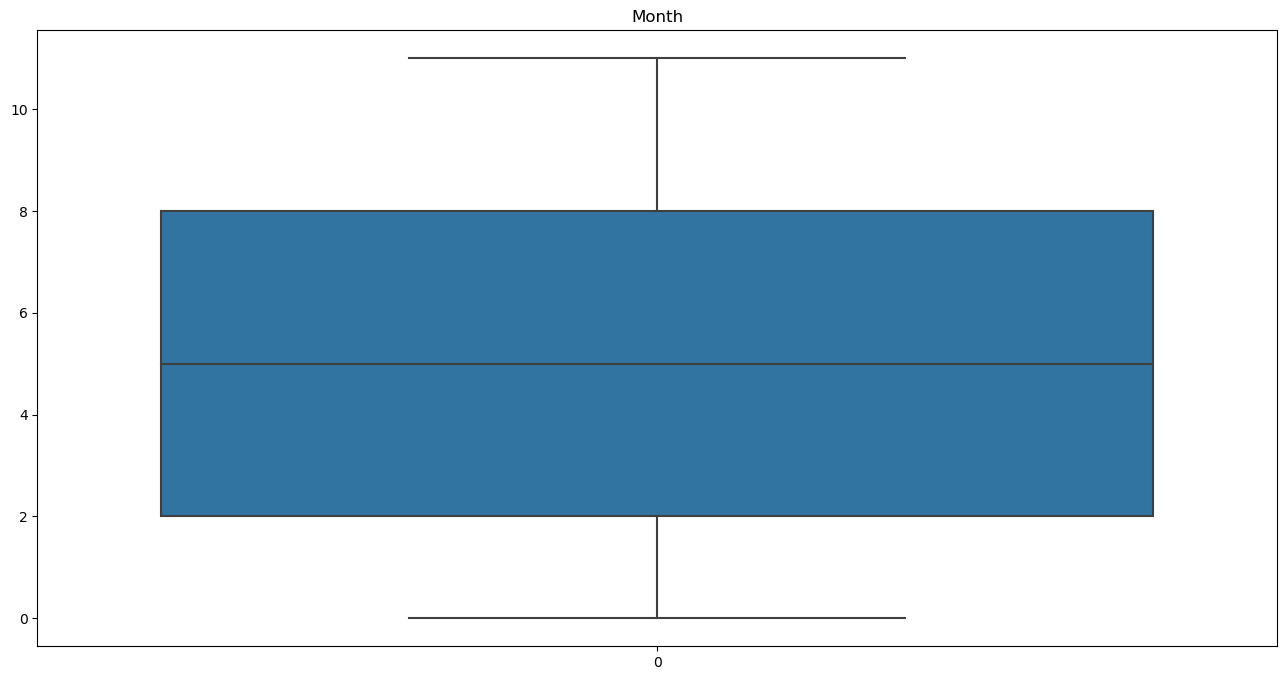

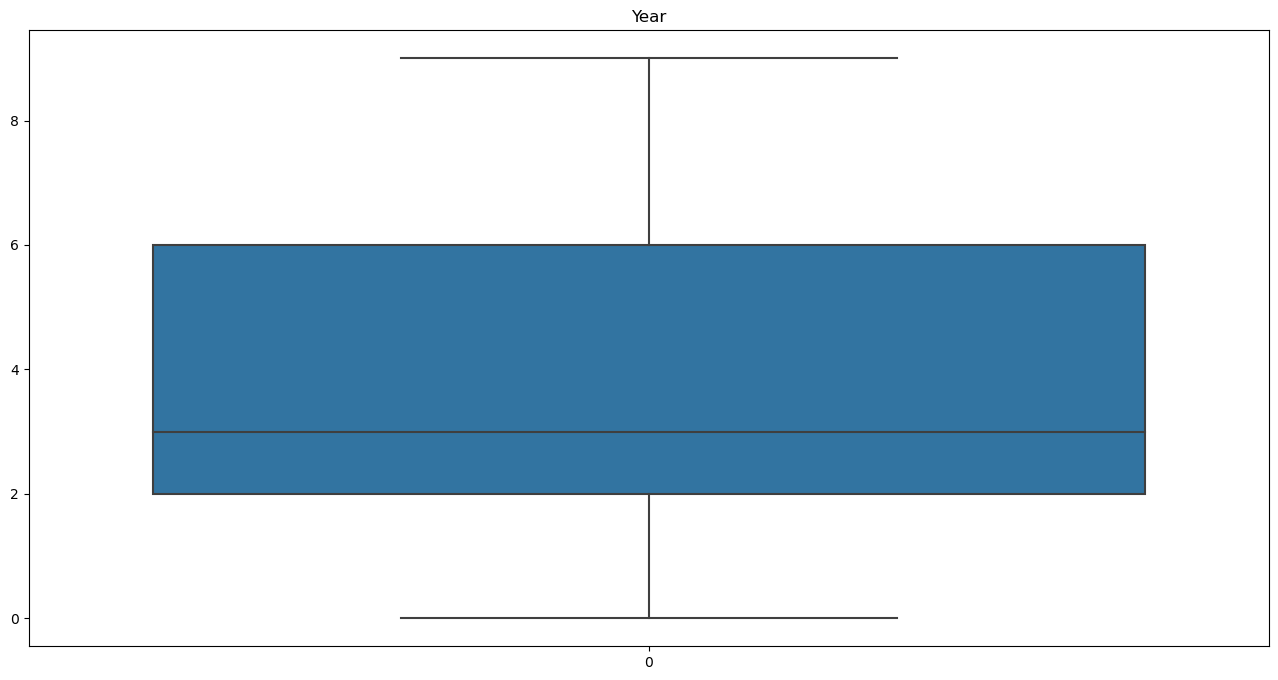

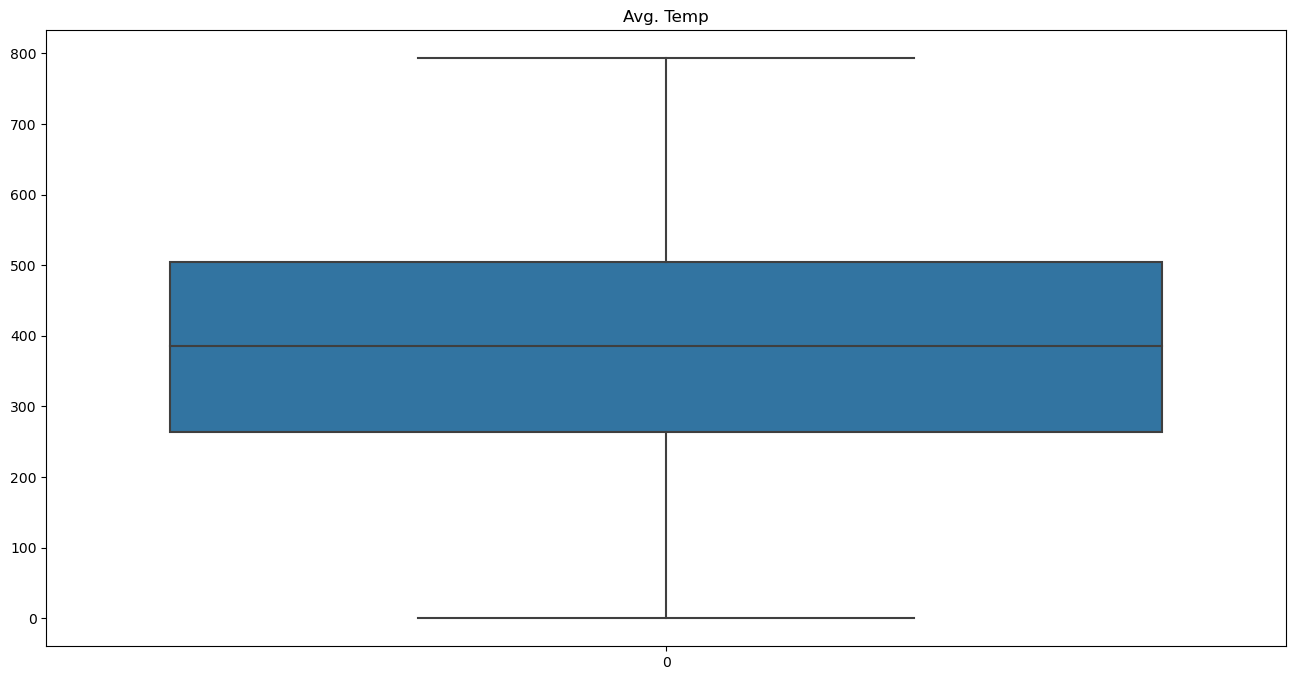

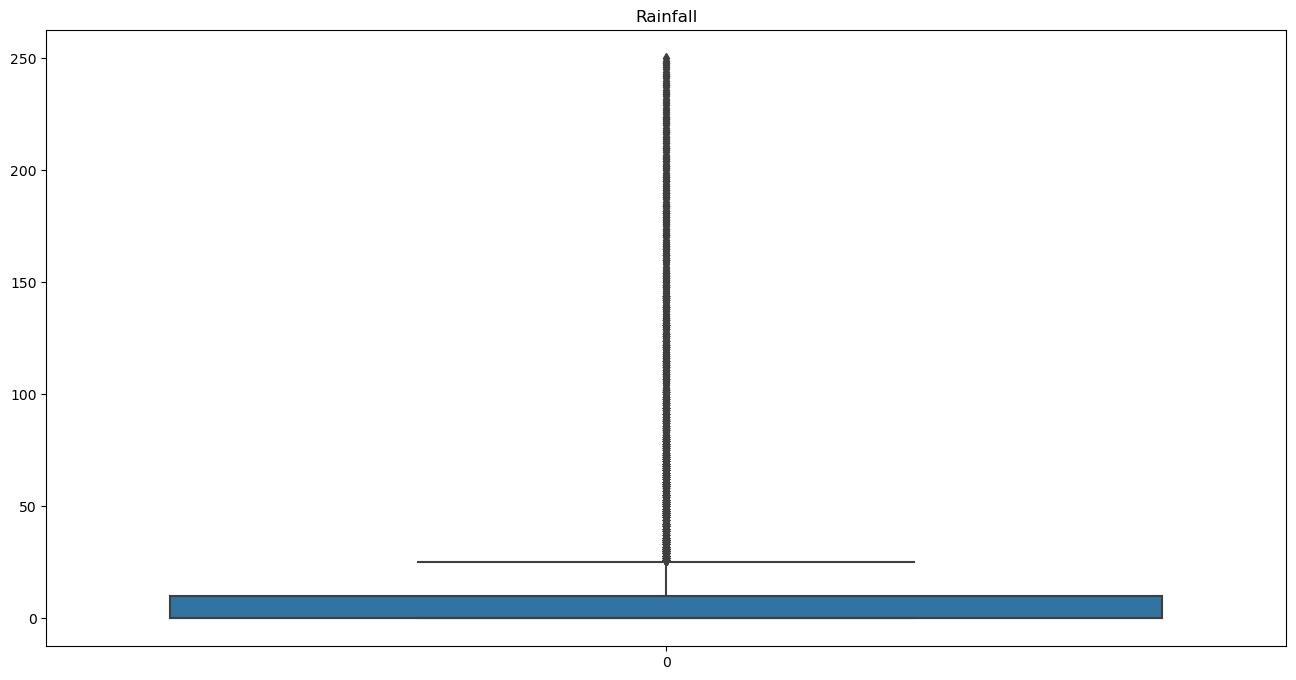

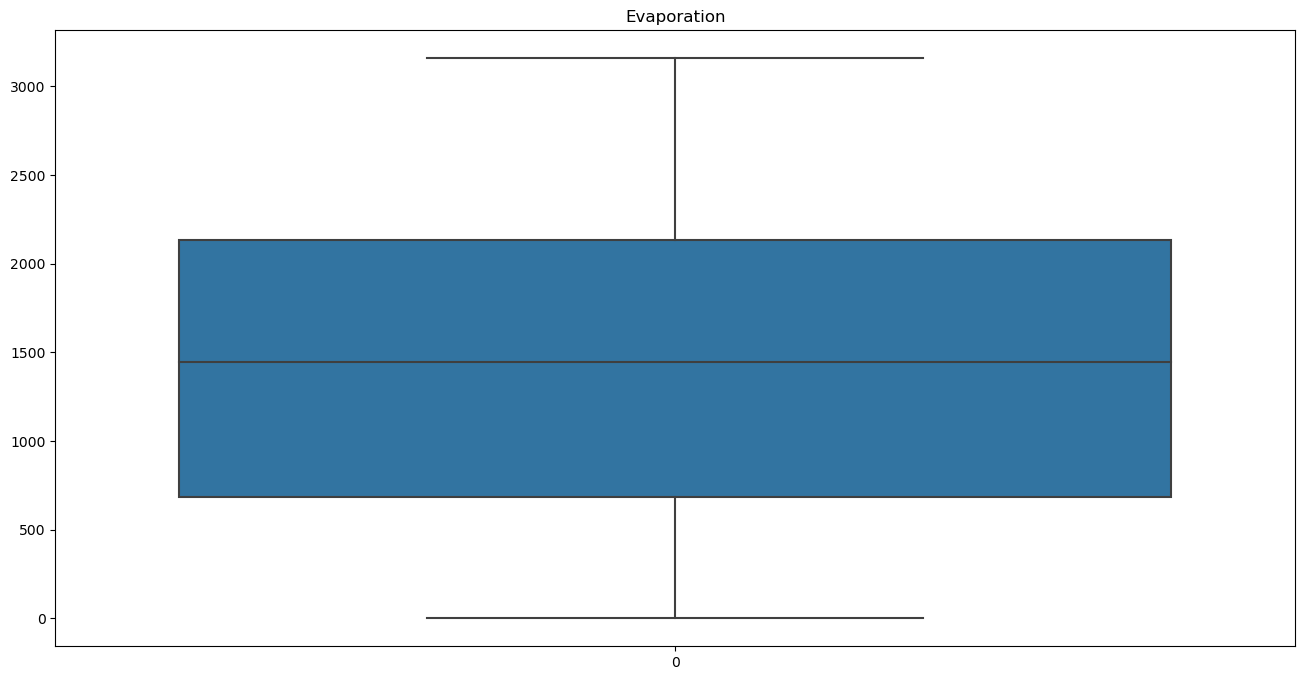

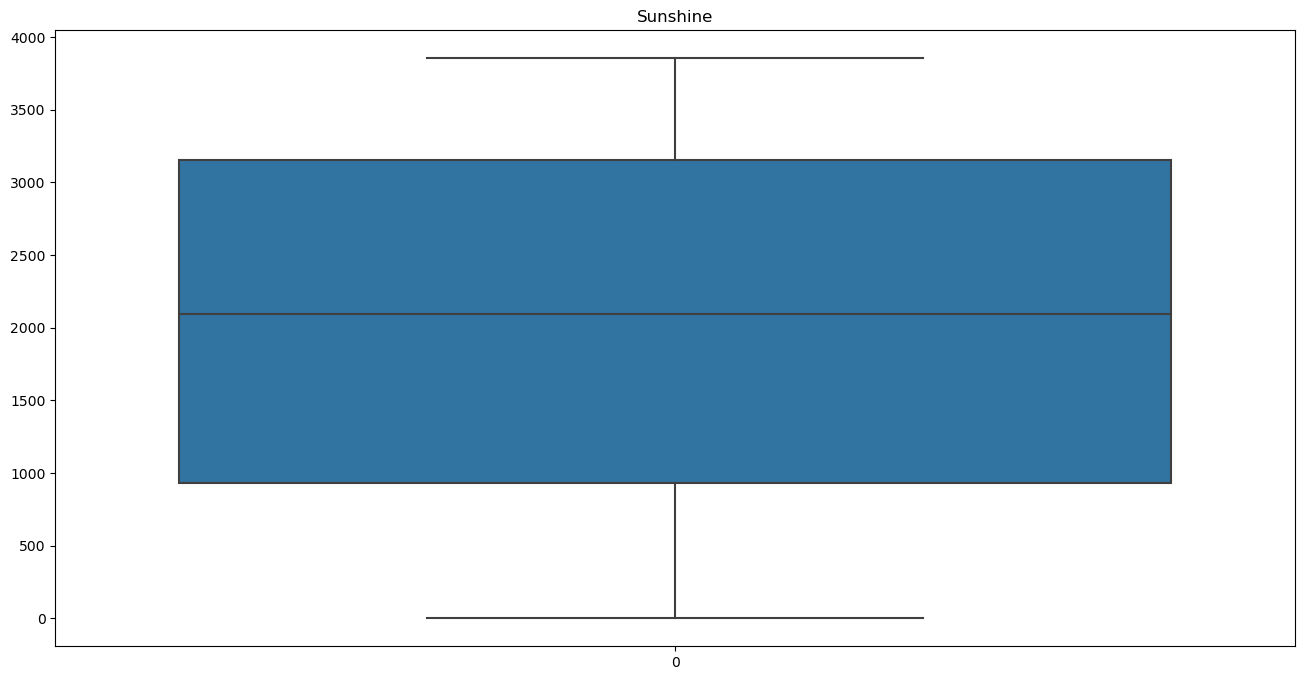

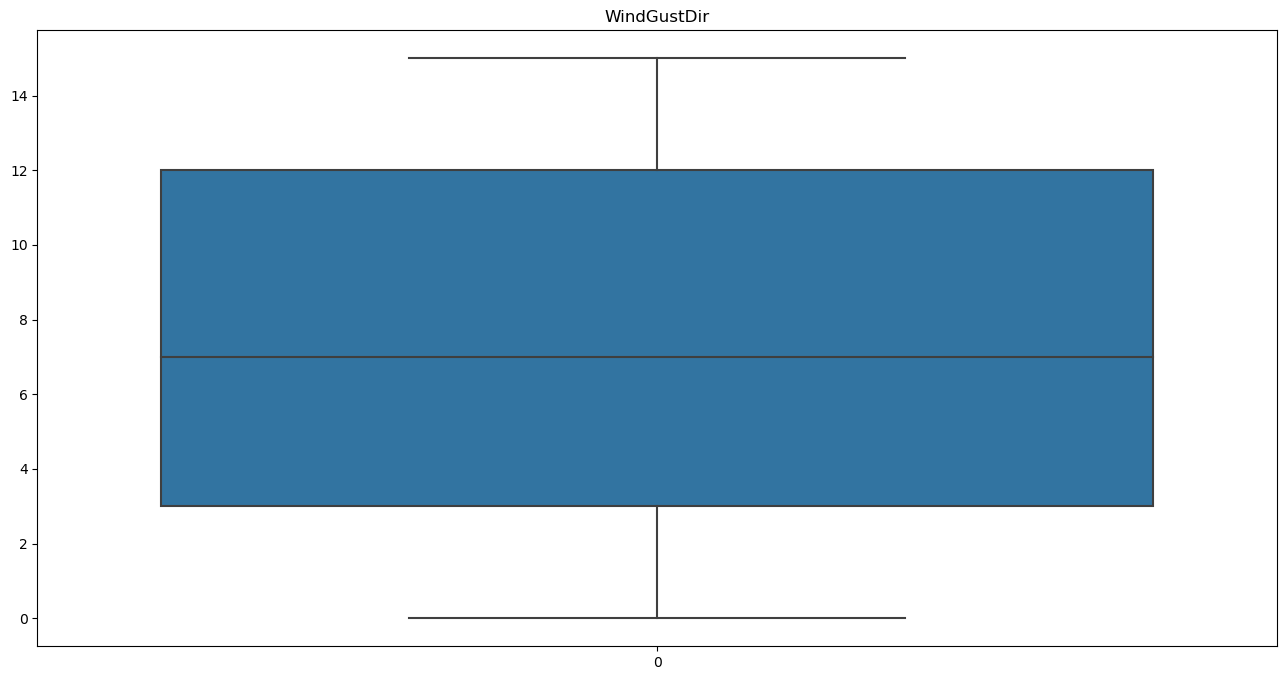

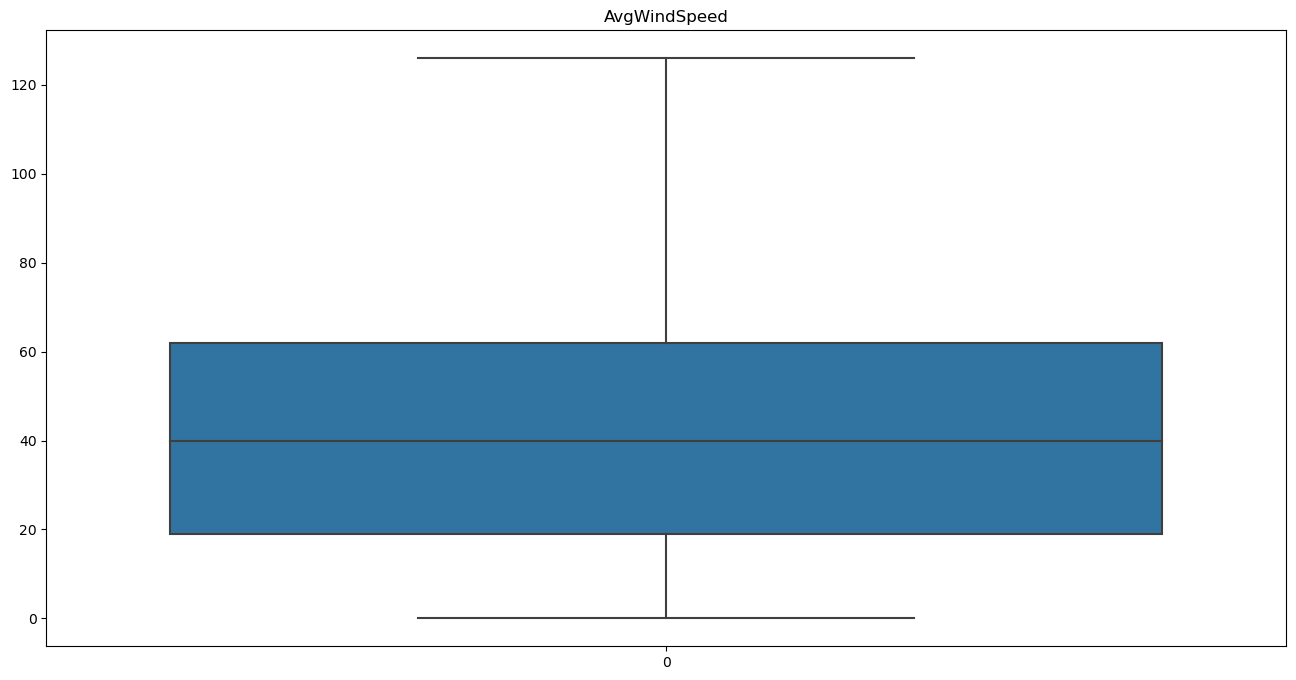

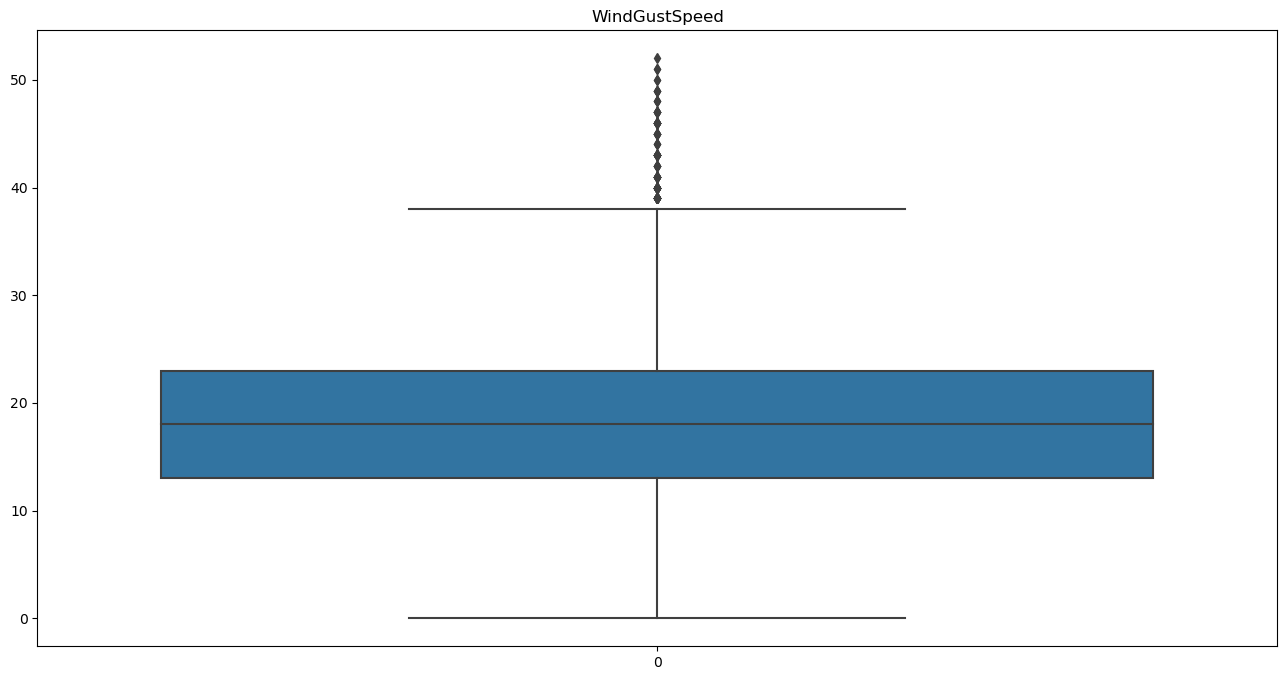

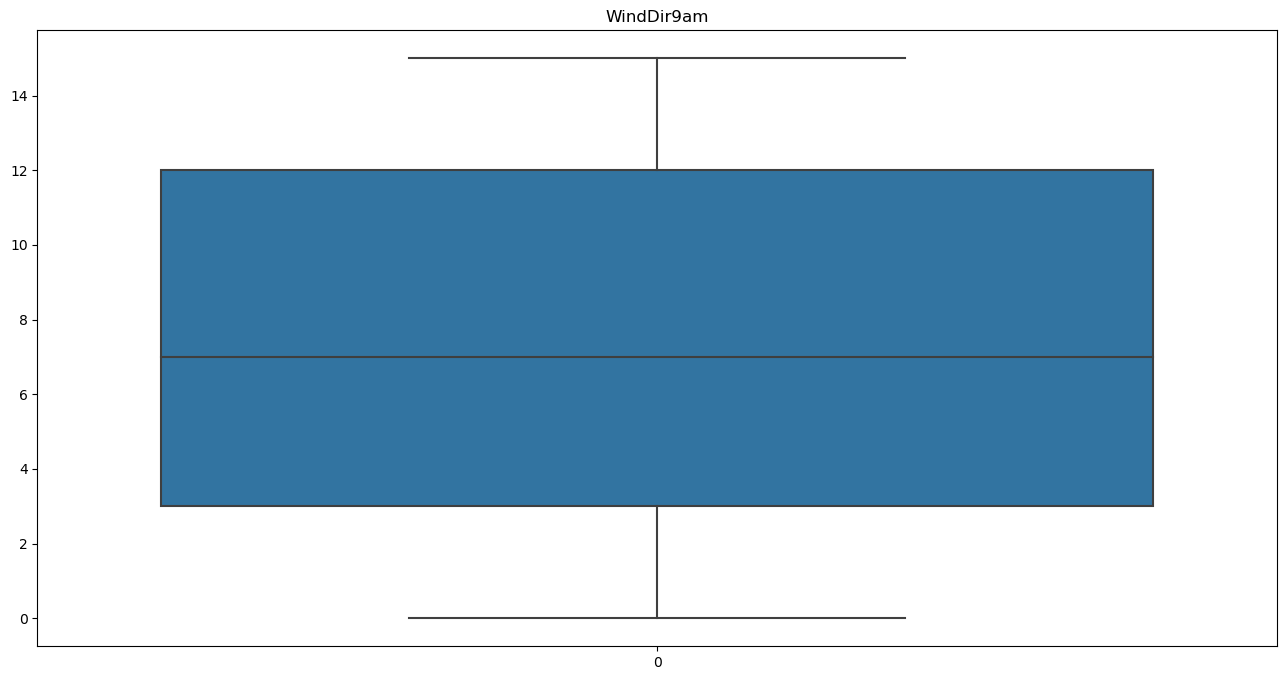

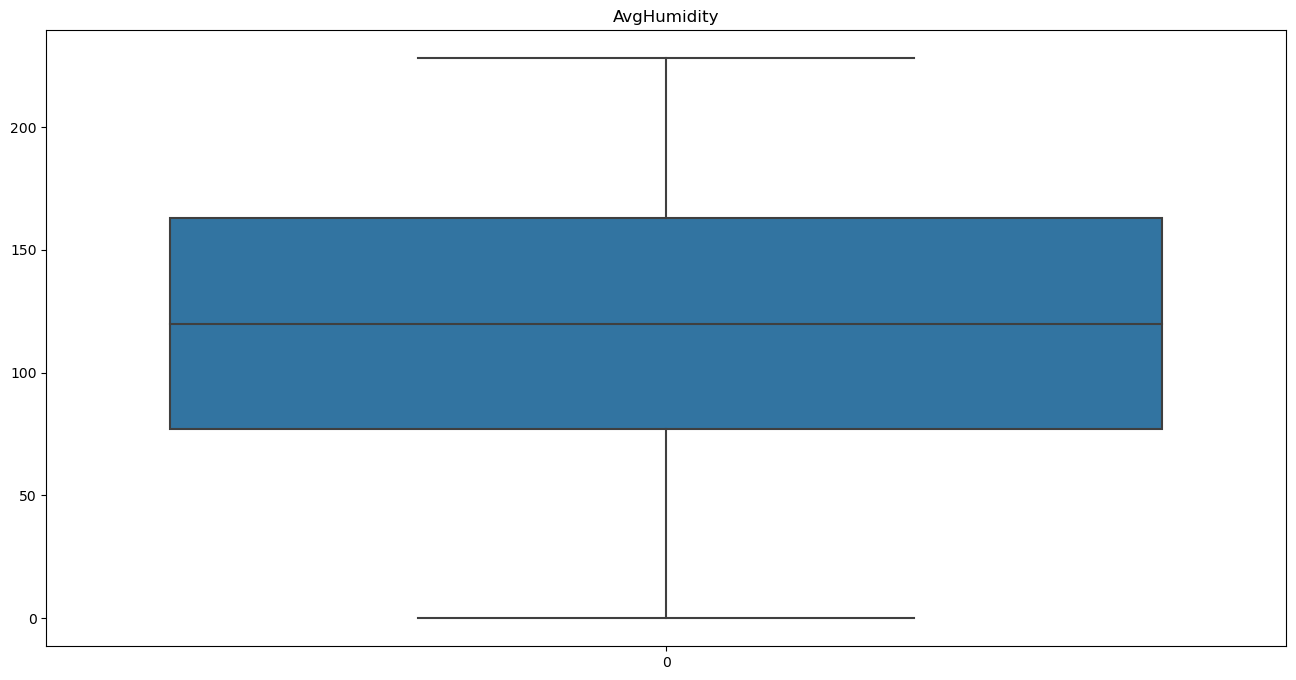

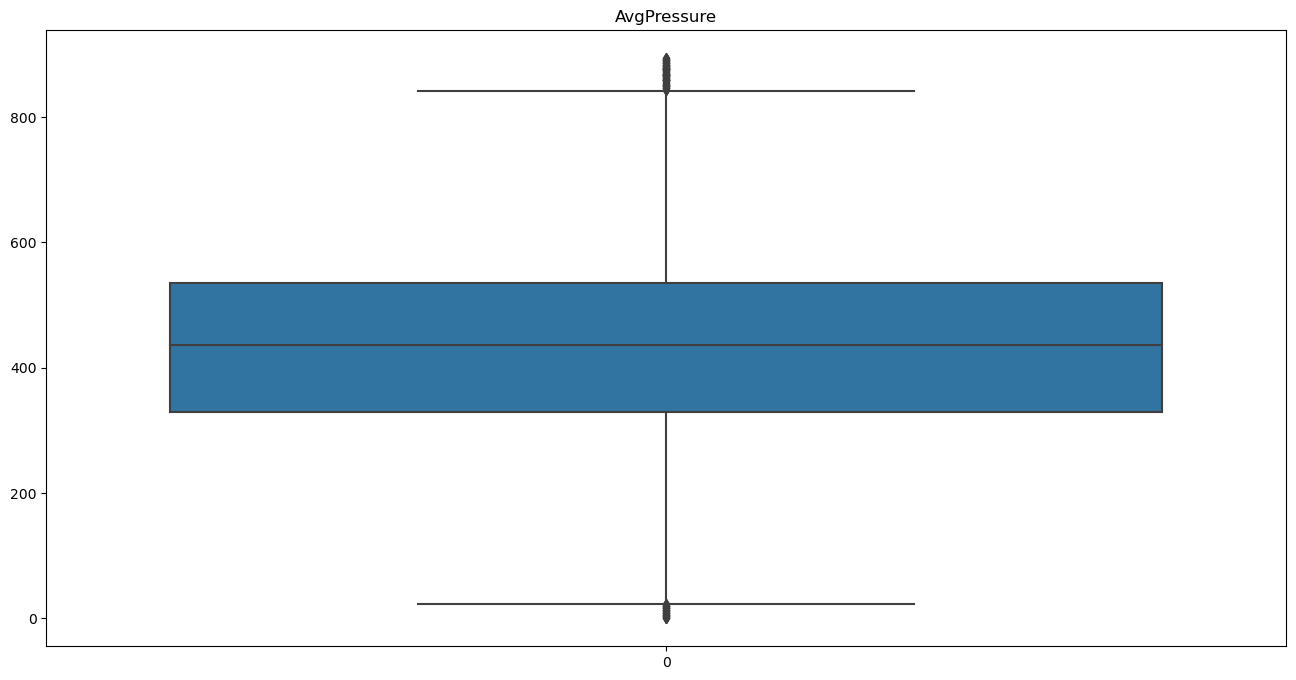

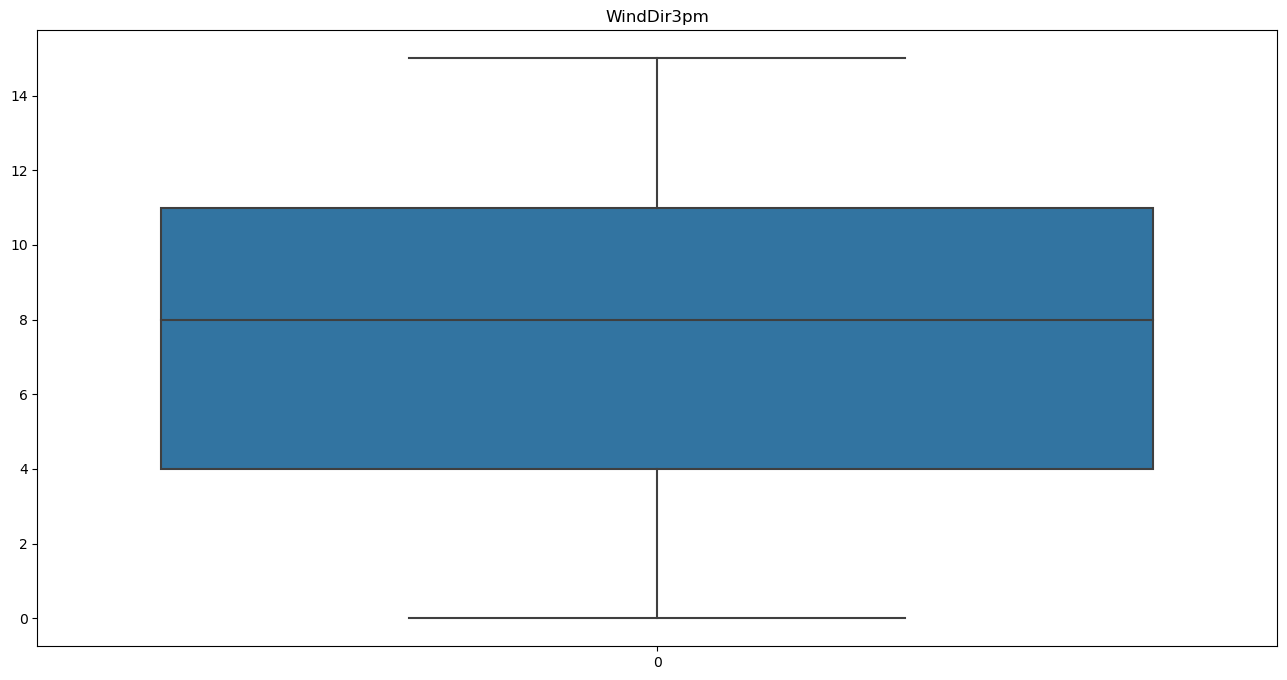

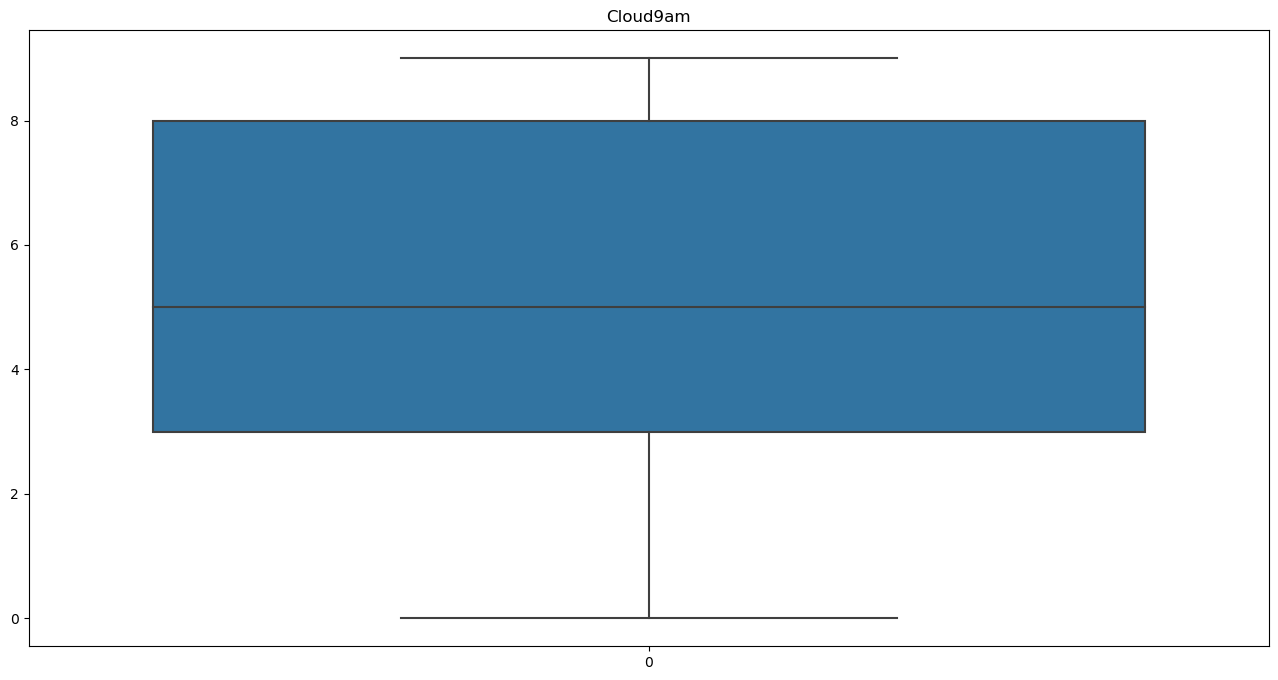

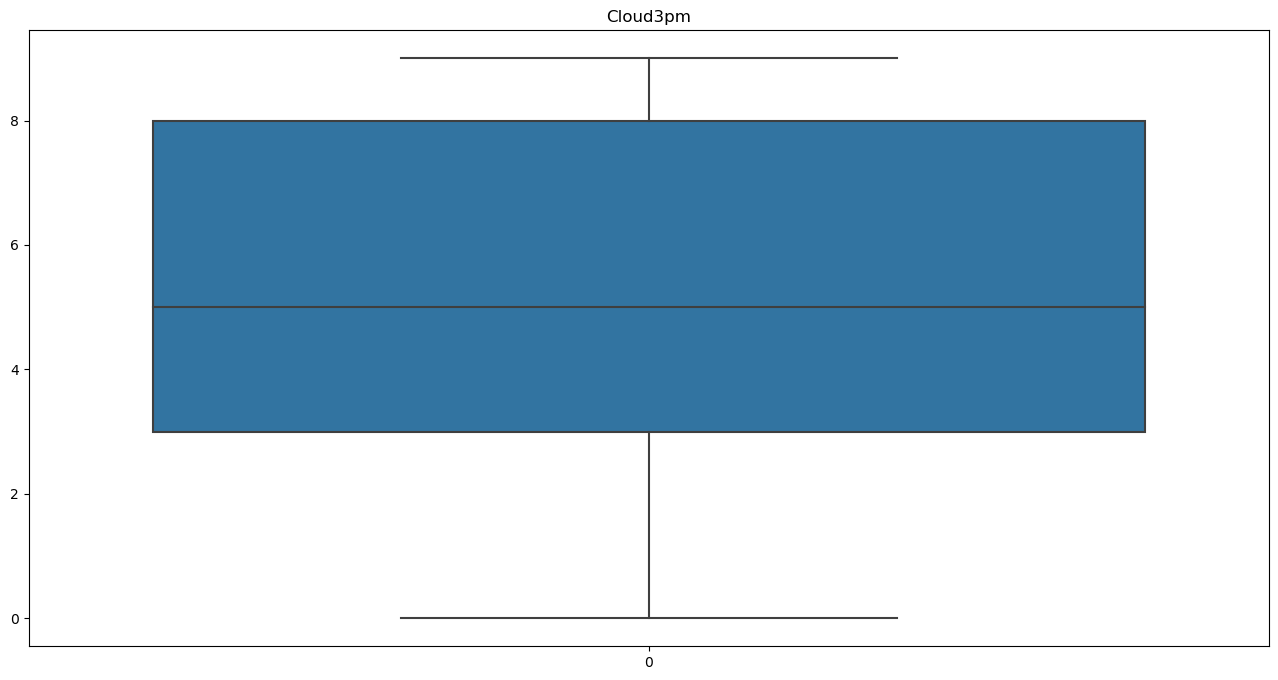

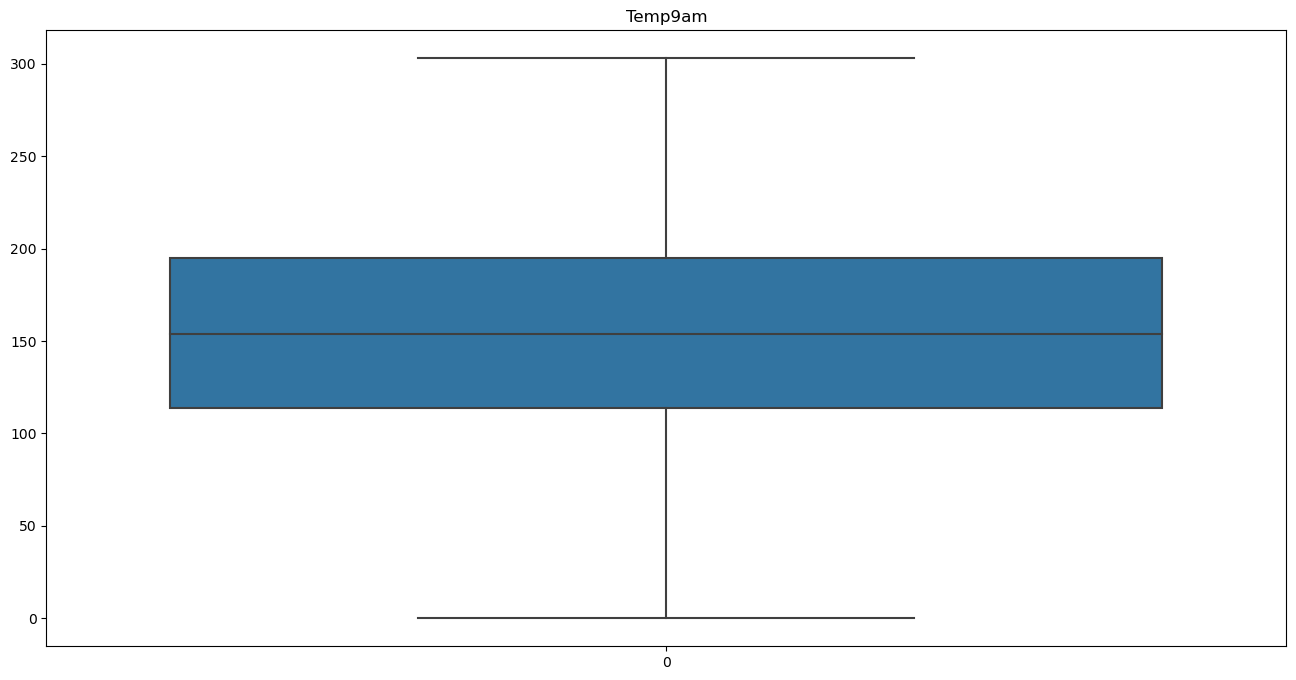

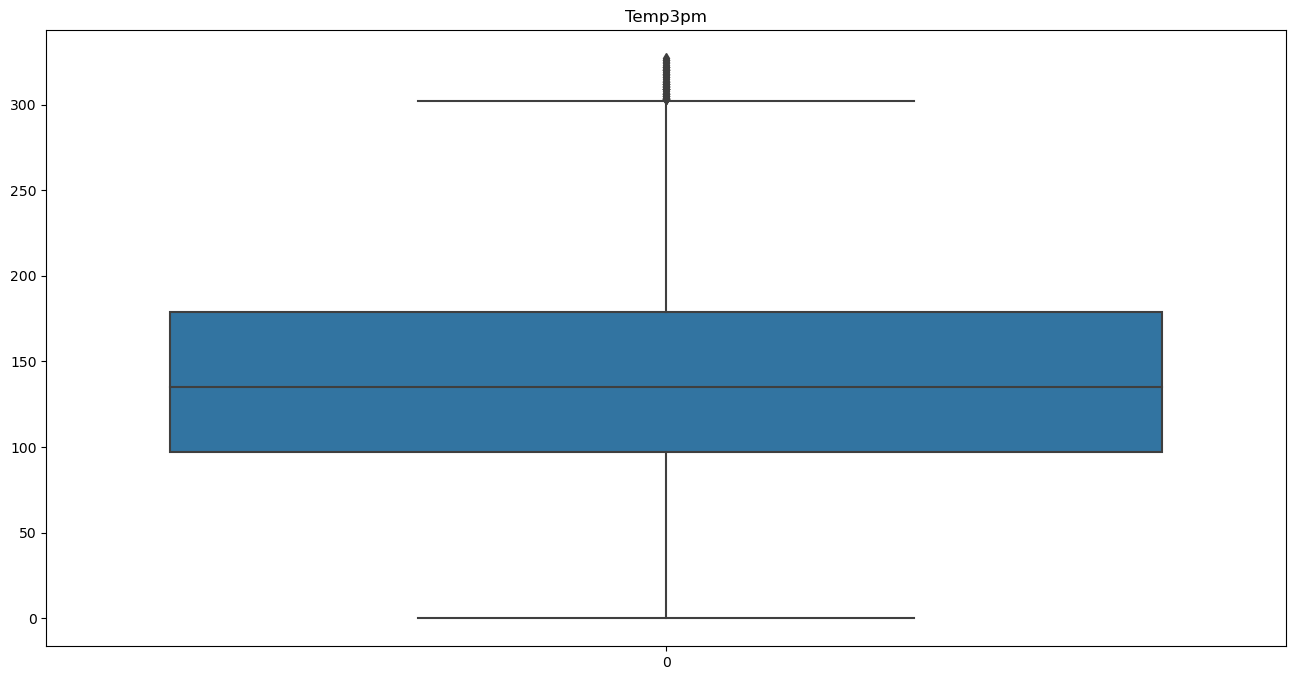

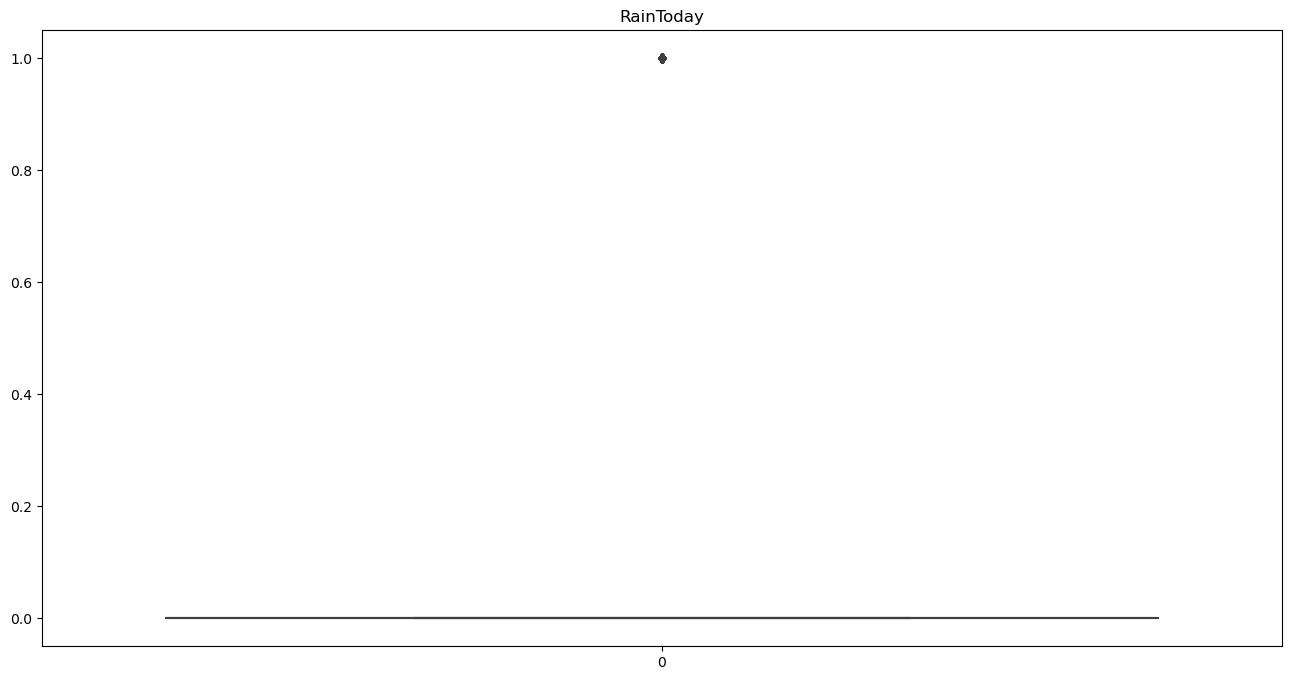

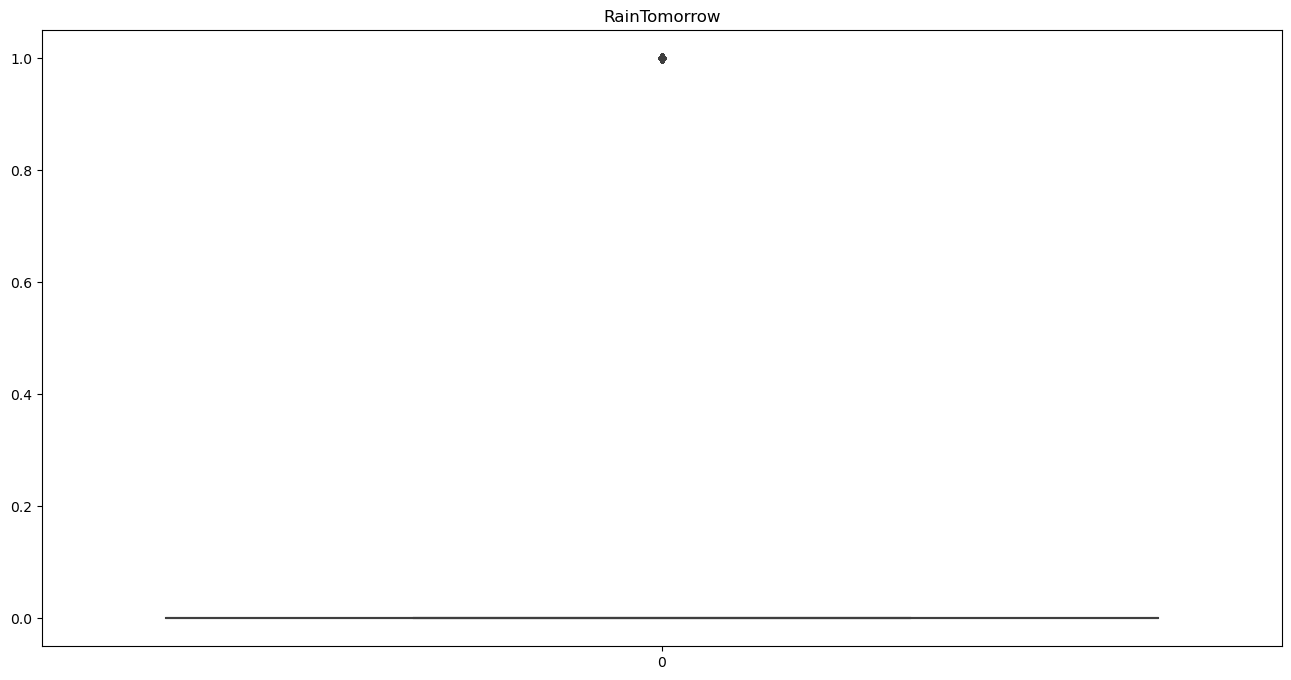

In [61]:
for i in df_new.columns:
    plt.figure(figsize=(16,8)) 
    sns.boxplot(df_new[i])
    plt.title(i)

In [62]:
df_new['Rainfall'].value_counts()

Rainfall
0      5299
2       406
23      240
3       177
5       116
       ... 
151       1
192       1
104       1
232       1
157       1
Name: count, Length: 251, dtype: int64

In [63]:
#from pykrige.ok import OrdinaryKriging
print(df['Rainfall'].isnull().sum())
print(df['Rainfall'].mean())
df['Rainfall'].interpolate(method='linear',inplace=True)

240
2.8059132559560167


In [64]:
"""from scipy.stats import zscore
for i in df_new.columns:
    
    z =np.abs(zscore(df_new[i]))
    threshold=3
  
    df_new=df_new[(z<3).all(axis=1)]
for i in num_col:
    plt.figure(figsize=(16,8)) 
    sns.boxplot(df_new[i])
    plt.title(i)"""

'from scipy.stats import zscore\nfor i in df_new.columns:\n    \n    z =np.abs(zscore(df_new[i]))\n    threshold=3\n  \n    df_new=df_new[(z<3).all(axis=1)]\nfor i in num_col:\n    plt.figure(figsize=(16,8)) \n    sns.boxplot(df_new[i])\n    plt.title(i)'

In [65]:
df_new['Rainfall'].value_counts()

Rainfall
0      5299
2       406
23      240
3       177
5       116
       ... 
151       1
192       1
104       1
232       1
157       1
Name: count, Length: 251, dtype: int64

In [66]:
cat_col=['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']
float_col=['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']
int_col=['WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
'Cloud9am',
 'Cloud3pm']

In [67]:
cat_col

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [68]:
int_col

['WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Cloud9am',
 'Cloud3pm']

In [69]:
float_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [70]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     6195
Yes    1991
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


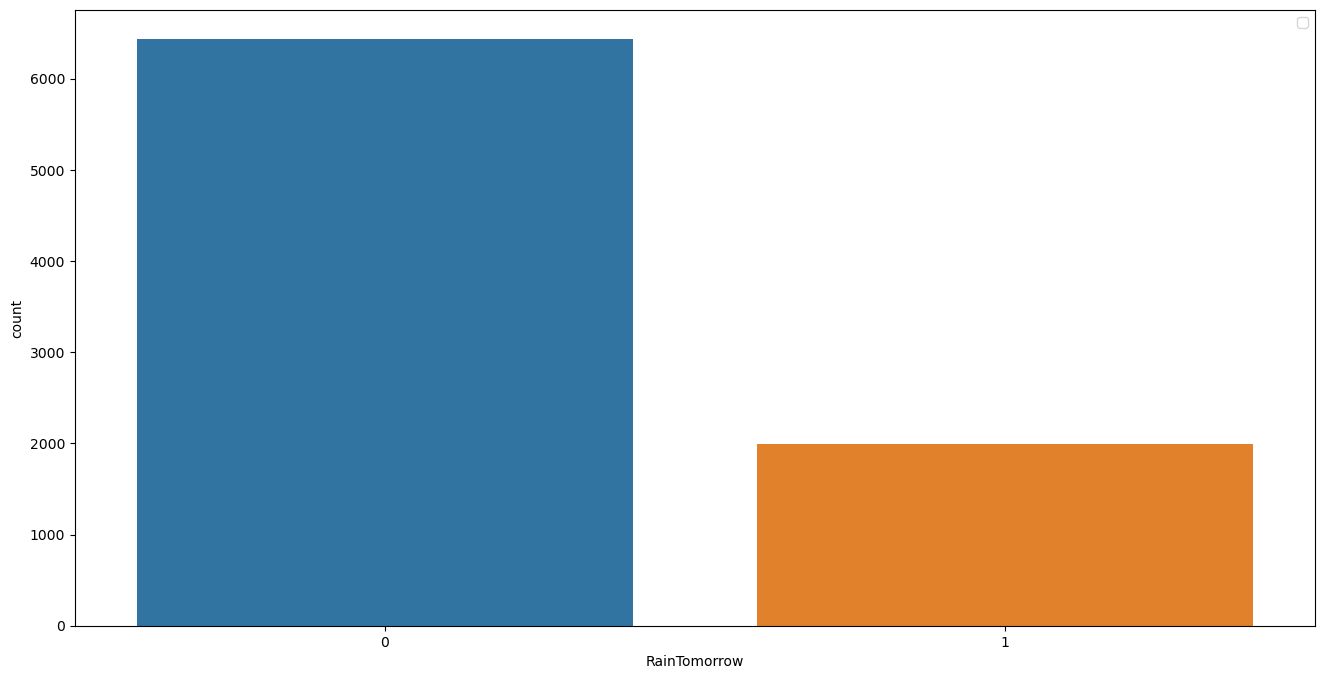

In [71]:
plt.figure(figsize=(16,8))
sns.countplot(df_new,x='RainTomorrow')
plt.legend()

<Axes: >

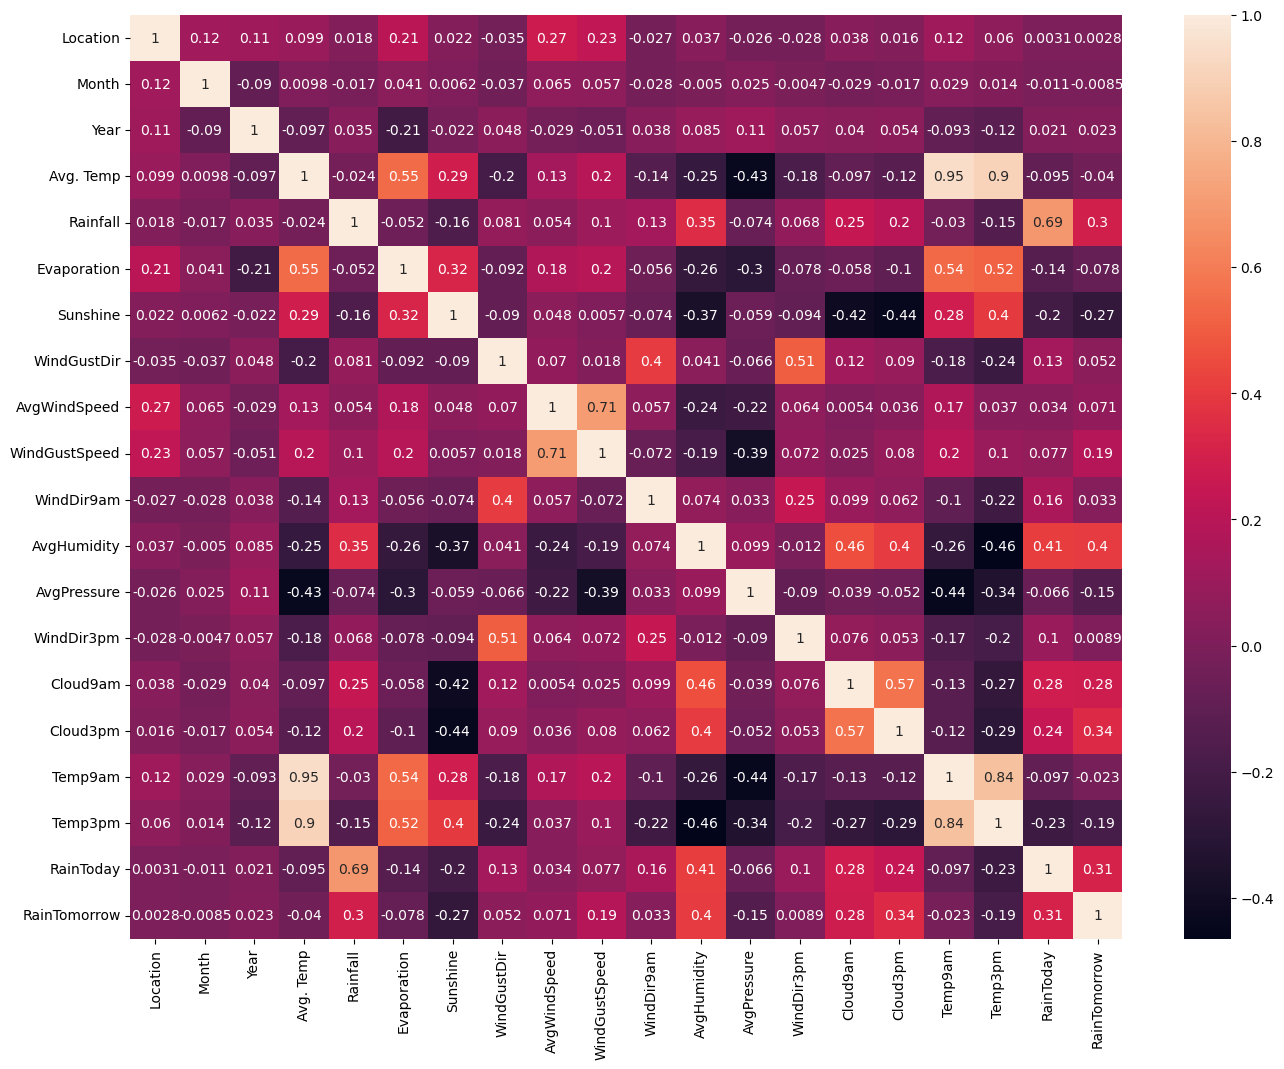

In [72]:
plt.figure(figsize=(16,12))
sns.heatmap(df_new.corr(),annot=True)

In [73]:
df_new.drop(['Temp9am','Temp3pm'],inplace=True,axis=1)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = df_new.columns
vif['vif_value'] = [variance_inflation_factor(df_new.values, i) for i in range(df_new.shape[1])]

In [75]:
vif

,features,vif_value
0,Location,5.270124
1,Month,3.535001
2,Year,4.066349
3,Avg. Temp,9.217146
4,Rainfall,2.285105
5,Evaporation,6.155162
6,Sunshine,5.090548
7,WindGustDir,5.140661
8,AvgWindSpeed,7.608057
9,WindGustSpeed,13.422593


In [117]:
X=df_new.drop('RainTomorrow',axis=1)
y=df_new['RainTomorrow']

In [118]:
X

,Location,Month,Year,Avg. Temp,Rainfall,Evaporation,Sunshine,WindGustDir,AvgWindSpeed,WindGustSpeed,WindDir9am,AvgHumidity,AvgPressure,WindDir3pm,Cloud9am,Cloud3pm,RainToday
0,1,11,0,401,0,1447,2093,14,72,27,13,50,89,14,5,5,0
1,1,11,0,341,0,1447,2093,13,38,19,15,44,359,11,5,5,0
2,1,11,0,422,0,1447,2093,10,17,10,10,43,443,0,5,5,0
3,1,11,0,530,0,1447,2093,14,26,16,10,31,330,7,5,5,0
4,1,11,0,557,0,1447,2093,14,42,19,1,28,280,7,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,8,5,9,545,0,2527,3560,15,72,22,12,81,327,12,8,1,0
8421,8,5,9,569,0,2395,3848,0,70,23,0,48,339,15,1,1,0
8422,8,5,9,584,0,2579,3848,12,70,20,8,46,198,15,1,0,0
8423,8,5,9,583,0,2546,3848,13,62,15,1,68,156,13,0,0,0


In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
X.dtypes

Location         int32
Month            int32
Year             int32
Avg. Temp        int64
Rainfall         int64
Evaporation      int64
Sunshine         int64
WindGustDir      int32
AvgWindSpeed     int64
WindGustSpeed    int64
WindDir9am       int32
AvgHumidity      int64
AvgPressure      int64
WindDir3pm       int32
Cloud9am         int64
Cloud3pm         int64
RainToday        int32
dtype: object

In [119]:
sm=SMOTE(random_state=42)
X,y=sm.fit_resample(X,y)

In [120]:
X

,Location,Month,Year,Avg. Temp,Rainfall,Evaporation,Sunshine,WindGustDir,AvgWindSpeed,WindGustSpeed,WindDir9am,AvgHumidity,AvgPressure,WindDir3pm,Cloud9am,Cloud3pm,RainToday
0,1,11,0,401,0,1447,2093,14,72,27,13,50,89,14,5,5,0
1,1,11,0,341,0,1447,2093,13,38,19,15,44,359,11,5,5,0
2,1,11,0,422,0,1447,2093,10,17,10,10,43,443,0,5,5,0
3,1,11,0,530,0,1447,2093,14,26,16,10,31,330,7,5,5,0
4,1,11,0,557,0,1447,2093,14,42,19,1,28,280,7,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12863,2,2,7,166,52,1161,2411,12,49,28,9,145,253,13,3,5,0
12864,9,4,4,564,0,1962,2855,7,58,22,6,69,341,2,1,6,0
12865,6,6,5,483,31,1286,627,3,0,18,3,209,436,9,9,9,1
12866,11,2,6,472,0,2858,3706,10,35,25,5,187,211,2,2,4,0


In [82]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,mean_squared_error

In [83]:
model={"LogisticRegression":LogisticRegression(),
      "DecisionTreeClassifier":DecisionTreeClassifier(),
      "RandomForestClassifier":RandomForestClassifier(),
      "AdaBoostClassifier":AdaBoostClassifier(),
       "GradientBoostingClassifier":GradientBoostingClassifier(),
       "ExtraTreesClassifier":ExtraTreesClassifier(),
       "KNeighborsClassifier":KNeighborsClassifier(),
      "GradientNB":GaussianNB(),'MultinomialNB':MultinomialNB(),
      "SVC":SVC(),
       "XGBClassifier":XGBClassifier()
      }

In [129]:
X_train,X_test,y_train,y_test1=train_test_split(X,y,test_size=0.25,random_state=10)
j=ExtraTreesClassifier()
j.fit(X_train,y_train)
predclf=j.predict(X_test)
acc=accuracy_score(y_test1,predclf)
#model_accuracies[j]=acc
print(f'Model : {j} with random_state')
print(f'Accuracy Score : {acc}')
print(confusion_matrix(y_test,predclf))
print(classification_report)
print('\n')

Model : ExtraTreesClassifier() with random_state
Accuracy Score : 0.934100093254585
[[1515  130]
 [  82 1490]]
<function classification_report at 0x000001F800018540>




In [85]:
model_accuracies={}
for k in range(45):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=k)
    for i,j in model.items():
        j.fit(X_train,y_train)
        pred=j.predict(X_test)
        acc=accuracy_score(y_test,pred)
        model_accuracies[j]=acc
        print(f'Model : {i} with random_state {k}')
        print(f'Accuracy Score : {acc}')
        print(confusion_matrix(y_test,pred))
        print(classification_report)
        print('\n')
              

Model : LogisticRegression with random_state 0
Accuracy Score : 0.7547267547267548
[[1460  458]
 [ 489 1454]]
<function classification_report at 0x000001F800018540>


Model : DecisionTreeClassifier with random_state 0
Accuracy Score : 0.8311318311318311
[[1565  353]
 [ 299 1644]]
<function classification_report at 0x000001F800018540>


Model : RandomForestClassifier with random_state 0
Accuracy Score : 0.9057239057239057
[[1713  205]
 [ 159 1784]]
<function classification_report at 0x000001F800018540>


Model : AdaBoostClassifier with random_state 0
Accuracy Score : 0.8023828023828024
[[1542  376]
 [ 387 1556]]
<function classification_report at 0x000001F800018540>


Model : GradientBoostingClassifier with random_state 0
Accuracy Score : 0.8272468272468273
[[1569  349]
 [ 318 1625]]
<function classification_report at 0x000001F800018540>


Model : ExtraTreesClassifier with random_state 0
Accuracy Score : 0.9158249158249159
[[1714  204]
 [ 121 1822]]
<function classification_report at 0x

Model : KNeighborsClassifier with random_state 4
Accuracy Score : 0.8243978243978244
[[1421  487]
 [ 191 1762]]
<function classification_report at 0x000001F800018540>


Model : GradientNB with random_state 4
Accuracy Score : 0.7578347578347578
[[1501  407]
 [ 528 1425]]
<function classification_report at 0x000001F800018540>


Model : MultinomialNB with random_state 4
Accuracy Score : 0.6713286713286714
[[1242  666]
 [ 603 1350]]
<function classification_report at 0x000001F800018540>


Model : SVC with random_state 4
Accuracy Score : 0.7562807562807563
[[1377  531]
 [ 410 1543]]
<function classification_report at 0x000001F800018540>


Model : XGBClassifier with random_state 4
Accuracy Score : 0.9204869204869205
[[1745  163]
 [ 144 1809]]
<function classification_report at 0x000001F800018540>


Model : LogisticRegression with random_state 5
Accuracy Score : 0.7650867650867651
[[1462  456]
 [ 451 1492]]
<function classification_report at 0x000001F800018540>


Model : DecisionTreeClassifie

Model : DecisionTreeClassifier with random_state 9
Accuracy Score : 0.8394198394198394
[[1596  316]
 [ 304 1645]]
<function classification_report at 0x000001F800018540>


Model : RandomForestClassifier with random_state 9
Accuracy Score : 0.9134939134939135
[[1749  163]
 [ 171 1778]]
<function classification_report at 0x000001F800018540>


Model : AdaBoostClassifier with random_state 9
Accuracy Score : 0.818958818958819
[[1577  335]
 [ 364 1585]]
<function classification_report at 0x000001F800018540>


Model : GradientBoostingClassifier with random_state 9
Accuracy Score : 0.8386428386428386
[[1599  313]
 [ 310 1639]]
<function classification_report at 0x000001F800018540>


Model : ExtraTreesClassifier with random_state 9
Accuracy Score : 0.9277389277389277
[[1771  141]
 [ 138 1811]]
<function classification_report at 0x000001F800018540>


Model : KNeighborsClassifier with random_state 9
Accuracy Score : 0.8212898212898213
[[1426  486]
 [ 204 1745]]
<function classification_report at 0

Model : SVC with random_state 13
Accuracy Score : 0.7404817404817405
[[1401  567]
 [ 435 1458]]
<function classification_report at 0x000001F800018540>


Model : XGBClassifier with random_state 13
Accuracy Score : 0.9041699041699042
[[1775  193]
 [ 177 1716]]
<function classification_report at 0x000001F800018540>


Model : LogisticRegression with random_state 14
Accuracy Score : 0.7622377622377622
[[1473  452]
 [ 466 1470]]
<function classification_report at 0x000001F800018540>


Model : DecisionTreeClassifier with random_state 14
Accuracy Score : 0.8293188293188293
[[1578  347]
 [ 312 1624]]
<function classification_report at 0x000001F800018540>


Model : RandomForestClassifier with random_state 14
Accuracy Score : 0.9083139083139083
[[1746  179]
 [ 175 1761]]
<function classification_report at 0x000001F800018540>


Model : AdaBoostClassifier with random_state 14
Accuracy Score : 0.8052318052318053
[[1565  360]
 [ 392 1544]]
<function classification_report at 0x000001F800018540>


Mode

Model : GradientBoostingClassifier with random_state 18
Accuracy Score : 0.8311318311318311
[[1582  352]
 [ 300 1627]]
<function classification_report at 0x000001F800018540>


Model : ExtraTreesClassifier with random_state 18
Accuracy Score : 0.9225589225589226
[[1763  171]
 [ 128 1799]]
<function classification_report at 0x000001F800018540>


Model : KNeighborsClassifier with random_state 18
Accuracy Score : 0.811965811965812
[[1407  527]
 [ 199 1728]]
<function classification_report at 0x000001F800018540>


Model : GradientNB with random_state 18
Accuracy Score : 0.7422947422947423
[[1483  451]
 [ 544 1383]]
<function classification_report at 0x000001F800018540>


Model : MultinomialNB with random_state 18
Accuracy Score : 0.6581196581196581
[[1249  685]
 [ 635 1292]]
<function classification_report at 0x000001F800018540>


Model : SVC with random_state 18
Accuracy Score : 0.7451437451437452
[[1363  571]
 [ 413 1514]]
<function classification_report at 0x000001F800018540>


Model : X

Model : XGBClassifier with random_state 22
Accuracy Score : 0.9015799015799015
[[1720  210]
 [ 170 1761]]
<function classification_report at 0x000001F800018540>


Model : LogisticRegression with random_state 23
Accuracy Score : 0.763014763014763
[[1433  463]
 [ 452 1513]]
<function classification_report at 0x000001F800018540>


Model : DecisionTreeClassifier with random_state 23
Accuracy Score : 0.8427868427868428
[[1576  320]
 [ 287 1678]]
<function classification_report at 0x000001F800018540>


Model : RandomForestClassifier with random_state 23
Accuracy Score : 0.9171199171199171
[[1730  166]
 [ 154 1811]]
<function classification_report at 0x000001F800018540>


Model : AdaBoostClassifier with random_state 23
Accuracy Score : 0.8052318052318053
[[1542  354]
 [ 398 1567]]
<function classification_report at 0x000001F800018540>


Model : GradientBoostingClassifier with random_state 23
Accuracy Score : 0.83993783993784
[[1601  295]
 [ 323 1642]]
<function classification_report at 0x0000

Model : ExtraTreesClassifier with random_state 27
Accuracy Score : 0.9184149184149184
[[1774  172]
 [ 143 1772]]
<function classification_report at 0x000001F800018540>


Model : KNeighborsClassifier with random_state 27
Accuracy Score : 0.8135198135198135
[[1417  529]
 [ 191 1724]]
<function classification_report at 0x000001F800018540>


Model : GradientNB with random_state 27
Accuracy Score : 0.7454027454027454
[[1512  434]
 [ 549 1366]]
<function classification_report at 0x000001F800018540>


Model : MultinomialNB with random_state 27
Accuracy Score : 0.6607096607096608
[[1281  665]
 [ 645 1270]]
<function classification_report at 0x000001F800018540>


Model : SVC with random_state 27
Accuracy Score : 0.7402227402227403
[[1369  577]
 [ 426 1489]]
<function classification_report at 0x000001F800018540>


Model : XGBClassifier with random_state 27
Accuracy Score : 0.9134939134939135
[[1769  177]
 [ 157 1758]]
<function classification_report at 0x000001F800018540>


Model : LogisticRegre

Model : LogisticRegression with random_state 32
Accuracy Score : 0.7658637658637658
[[1476  459]
 [ 445 1481]]
<function classification_report at 0x000001F800018540>


Model : DecisionTreeClassifier with random_state 32
Accuracy Score : 0.8355348355348355
[[1602  333]
 [ 302 1624]]
<function classification_report at 0x000001F800018540>


Model : RandomForestClassifier with random_state 32
Accuracy Score : 0.9140119140119141
[[1766  169]
 [ 163 1763]]
<function classification_report at 0x000001F800018540>


Model : AdaBoostClassifier with random_state 32
Accuracy Score : 0.8111888111888111
[[1576  359]
 [ 370 1556]]
<function classification_report at 0x000001F800018540>


Model : GradientBoostingClassifier with random_state 32
Accuracy Score : 0.840973840973841
[[1631  304]
 [ 310 1616]]
<function classification_report at 0x000001F800018540>


Model : ExtraTreesClassifier with random_state 32
Accuracy Score : 0.9272209272209272
[[1774  161]
 [ 120 1806]]
<function classification_report 

Model : ExtraTreesClassifier with random_state 36
Accuracy Score : 0.9134939134939135
[[1746  190]
 [ 144 1781]]
<function classification_report at 0x000001F800018540>


Model : KNeighborsClassifier with random_state 36
Accuracy Score : 0.8161098161098161
[[1427  509]
 [ 201 1724]]
<function classification_report at 0x000001F800018540>


Model : GradientNB with random_state 36
Accuracy Score : 0.73996373996374
[[1481  455]
 [ 549 1376]]
<function classification_report at 0x000001F800018540>


Model : MultinomialNB with random_state 36
Accuracy Score : 0.6503496503496503
[[1264  672]
 [ 678 1247]]
<function classification_report at 0x000001F800018540>


Model : SVC with random_state 36
Accuracy Score : 0.7324527324527325
[[1373  563]
 [ 470 1455]]
<function classification_report at 0x000001F800018540>


Model : XGBClassifier with random_state 36
Accuracy Score : 0.9054649054649054
[[1745  191]
 [ 174 1751]]
<function classification_report at 0x000001F800018540>


Model : LogisticRegress

Model : LogisticRegression with random_state 41
Accuracy Score : 0.7588707588707588
[[1460  454]
 [ 477 1470]]
<function classification_report at 0x000001F800018540>


Model : DecisionTreeClassifier with random_state 41
Accuracy Score : 0.8495208495208495
[[1614  300]
 [ 281 1666]]
<function classification_report at 0x000001F800018540>


Model : RandomForestClassifier with random_state 41
Accuracy Score : 0.9054649054649054
[[1732  182]
 [ 183 1764]]
<function classification_report at 0x000001F800018540>


Model : AdaBoostClassifier with random_state 41
Accuracy Score : 0.8041958041958042
[[1561  353]
 [ 403 1544]]
<function classification_report at 0x000001F800018540>


Model : GradientBoostingClassifier with random_state 41
Accuracy Score : 0.8313908313908314
[[1600  314]
 [ 337 1610]]
<function classification_report at 0x000001F800018540>


Model : ExtraTreesClassifier with random_state 41
Accuracy Score : 0.9171199171199171
[[1746  168]
 [ 152 1795]]
<function classification_report

In [86]:
best_model = max(model_accuracies, key=model_accuracies.get)

print("Best model:", best_model)
print("Accuracy score:", model_accuracies[best_model])

Best model: ExtraTreesClassifier()
Accuracy score: 0.915047915047915


### HyperParameter Tunning with ExtraTreesClassifier

In [87]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,50,100],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
Et=ExtraTreesClassifier(random_state=10)
gd=GridSearchCV(Et,param_grid,cv=5)
gd.fit(X_train,y_train)
best_params=gd.best_params_
print(f'Hyperparameters is {best_params}')

Hyperparameters is {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [88]:
Et=ExtraTreesClassifier(**best_params)
Et.fit(X_train,y_train)
Epred=Et.predict(X_test)
r2=r2_score(y_test,Epred)
mse=mean_squared_error(y_test,Epred)
score=Et.score(X_test,y_test)
print(f'R-Score is {r2}')
print(f'MSE is {mse}')
print(f'Model Score is {score}')

R-Score is 0.6674425743355323
MSE is 0.08313908313908314
Model Score is 0.9168609168609169


### Regression

In [89]:
df_s=np.log1p(df_new['Rainfall'])

In [90]:
X=df_new.drop(['Rainfall'],axis=1)
y=df_s

In [91]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [92]:
model={'LinearRegression':LinearRegression(),
      "Lasso":Lasso(alpha=0.0001),"Ridge":Ridge(alpha=0.0001),"ElasticNet":ElasticNet(alpha=0.0001),
      "RandomForestRegressor":RandomForestRegressor(),
      "AdaBoostRegressor":AdaBoostRegressor(),
      "GradientBoostingRegressor":GradientBoostingRegressor(),
      'ExtraTreesRegressor':ExtraTreesRegressor(),
       "DecisionTreesRegressor":DecisionTreeRegressor(),
       "KNieghborsRegressor":KNeighborsRegressor(),
       "SVR":SVR(),
       "XGBRegressor":XGBRegressor(),
       "NeuralNetworkRegressor":MLPRegressor()
      }

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=38)
for i,j in model.items():
    j.fit(X_train,y_train)
    pred=j.predict(X_test)
    mae=mean_absolute_error(y_test,pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    r2=r2_score(y_test,pred)
    #model_accuracies[j]=j.score(X_test,y_test)
    print(f' Model : {i} with Random State ')
    print(f' RMSE is {rmse}')
    print(f'MAE is {mae}')
    print(f' R-Score is {r2}')
    print(f' Score is {j.score(X_test,y_test)}')
    print('\n')


 Model : LinearRegression with Random State 
 RMSE is 0.762602860350861
MAE is 0.5229347368307754
 R-Score is 0.8036465149607932
 Score is 0.8036465149607932


 Model : Lasso with Random State 
 RMSE is 0.762616591515631
MAE is 0.5230052426914495
 R-Score is 0.8036394439505217
 Score is 0.8036394439505217


 Model : Ridge with Random State 
 RMSE is 0.7626028640489828
MAE is 0.5229347621371927
 R-Score is 0.803646513056423
 Score is 0.803646513056423


 Model : ElasticNet with Random State 
 RMSE is 0.7626223532502759
MAE is 0.5230552303949361
 R-Score is 0.8036364768456745
 Score is 0.8036364768456745


 Model : RandomForestRegressor with Random State 
 RMSE is 0.5932856337257361
MAE is 0.39464718408799726
 R-Score is 0.8811581460150567
 Score is 0.8811581460150567


 Model : AdaBoostRegressor with Random State 
 RMSE is 0.7977589607278353
MAE is 0.6577770613488692
 R-Score is 0.7851253727937955
 Score is 0.7851253727937955


 Model : GradientBoostingRegressor with Random State 
 RMSE

In [94]:
model_accuracies={}
for k in range(45):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=k)
    for i,j in model.items():
        j.fit(X_train,y_train)
        pred=j.predict(X_test)
        mse=mean_squared_error(y_test,pred)
        r2=r2_score(y_test,pred)
        model_accuracies[j]=j.score(X_test,y_test)
        print(f' Model : {i} with Random State {k}')
        print(f' MSE is {mse}')
        print(f' R-Score is {r2}')
        print(f' Score is {j.score(X_test,y_test)}')
        print('\n')


 Model : LinearRegression with Random State 0
 MSE is 0.5730504939951456
 R-Score is 0.7881424472147068
 Score is 0.7881424472147068


 Model : Lasso with Random State 0
 MSE is 0.5730543010472211
 R-Score is 0.7881410397423383
 Score is 0.7881410397423383


 Model : Ridge with Random State 0
 MSE is 0.5730504963702343
 R-Score is 0.7881424463366333
 Score is 0.7881424463366333


 Model : ElasticNet with Random State 0
 MSE is 0.5730601345866286
 R-Score is 0.7881388830748266
 Score is 0.7881388830748266


 Model : RandomForestRegressor with Random State 0
 MSE is 0.36535450151406196
 R-Score is 0.8649279402060588
 Score is 0.8649279402060588


 Model : AdaBoostRegressor with Random State 0
 MSE is 0.6229718968720471
 R-Score is 0.7696864361721639
 Score is 0.7696864361721639


 Model : GradientBoostingRegressor with Random State 0
 MSE is 0.49064338069772945
 R-Score is 0.8186084699094519
 Score is 0.8186084699094519


 Model : ExtraTreesRegressor with Random State 0
 MSE is 0.3215985

 Model : KNieghborsRegressor with Random State 4
 MSE is 2.28433596892169
 R-Score is 0.16387781823602876
 Score is 0.16387781823602876


 Model : SVR with Random State 4
 MSE is 2.625722018580849
 R-Score is 0.03892227205183929
 Score is 0.03892227205183929


 Model : XGBRegressor with Random State 4
 MSE is 0.4105113516400311
 R-Score is 0.8497429223888799
 Score is 0.8497429223888799


 Model : NeuralNetworkRegressor with Random State 4
 MSE is 1.7883369322532023
 R-Score is 0.3454254549822332
 Score is 0.3454254549822332


 Model : LinearRegression with Random State 5
 MSE is 0.5266668554116727
 R-Score is 0.8116073059337872
 Score is 0.8116073059337872


 Model : Lasso with Random State 5
 MSE is 0.5266798812626615
 R-Score is 0.8116026464889501
 Score is 0.8116026464889501


 Model : Ridge with Random State 5
 MSE is 0.5266668614551072
 R-Score is 0.8116073037720052
 Score is 0.8116073037720052


 Model : ElasticNet with Random State 5
 MSE is 0.5266926816705195
 R-Score is 0.811

 Model : GradientBoostingRegressor with Random State 9
 MSE is 0.4738550480747996
 R-Score is 0.8238336497731712
 Score is 0.8238336497731712


 Model : ExtraTreesRegressor with Random State 9
 MSE is 0.30076007251225434
 R-Score is 0.8881856287408876
 Score is 0.8881856287408876


 Model : DecisionTreesRegressor with Random State 9
 MSE is 0.6747380811417437
 R-Score is 0.7491508308358648
 Score is 0.7491508308358648


 Model : KNieghborsRegressor with Random State 9
 MSE is 2.220708282707464
 R-Score is 0.17440138145091966
 Score is 0.17440138145091966


 Model : SVR with Random State 9
 MSE is 2.6057828110089014
 R-Score is 0.031241200944678305
 Score is 0.031241200944678305


 Model : XGBRegressor with Random State 9
 MSE is 0.3646685936949034
 R-Score is 0.8644261880197579
 Score is 0.8644261880197579


 Model : NeuralNetworkRegressor with Random State 9
 MSE is 1.3994547270178341
 R-Score is 0.47972099787043276
 Score is 0.47972099787043276


 Model : LinearRegression with Random

 Model : RandomForestRegressor with Random State 14
 MSE is 0.39546872876475925
 R-Score is 0.8531258371345005
 Score is 0.8531258371345005


 Model : AdaBoostRegressor with Random State 14
 MSE is 0.6766421397931965
 R-Score is 0.7487001104940411
 Score is 0.7487001104940411


 Model : GradientBoostingRegressor with Random State 14
 MSE is 0.5111330064646402
 R-Score is 0.8101689792972835
 Score is 0.8101689792972835


 Model : ExtraTreesRegressor with Random State 14
 MSE is 0.34157170837131084
 R-Score is 0.8731427921437075
 Score is 0.8731427921437075


 Model : DecisionTreesRegressor with Random State 14
 MSE is 0.7187189391774287
 R-Score is 0.7330730982017626
 Score is 0.7330730982017626


 Model : KNieghborsRegressor with Random State 14
 MSE is 2.320777787589246
 R-Score is 0.13808028307650289
 Score is 0.13808028307650289


 Model : SVR with Random State 14
 MSE is 2.7001380361333083
 R-Score is -0.0028113092964061615
 Score is -0.0028113092964061615


 Model : XGBRegressor w

 Score is 0.8178648155395551


 Model : RandomForestRegressor with Random State 19
 MSE is 0.3433842980153108
 R-Score is 0.8770947401643979
 Score is 0.8770947401643979


 Model : AdaBoostRegressor with Random State 19
 MSE is 0.6262940249499265
 R-Score is 0.7758347416732385
 Score is 0.7758347416732385


 Model : GradientBoostingRegressor with Random State 19
 MSE is 0.45986212984570335
 R-Score is 0.8354046038682891
 Score is 0.8354046038682891


 Model : ExtraTreesRegressor with Random State 19
 MSE is 0.30260699623632825
 R-Score is 0.8916898888054611
 Score is 0.8916898888054611


 Model : DecisionTreesRegressor with Random State 19
 MSE is 0.6493700117225729
 R-Score is 0.7675753070786824
 Score is 0.7675753070786824


 Model : KNieghborsRegressor with Random State 19
 MSE is 2.3884948060130604
 R-Score is 0.1451019267749626
 Score is 0.1451019267749626


 Model : SVR with Random State 19
 MSE is 2.732009741396327
 R-Score is 0.022149908774395932
 Score is 0.022149908774395932


 Model : ElasticNet with Random State 24
 MSE is 0.5380366396035472
 R-Score is 0.8071390324381054
 Score is 0.8071390324381054


 Model : RandomForestRegressor with Random State 24
 MSE is 0.34033350927233214
 R-Score is 0.8780063567039567
 Score is 0.8780063567039567


 Model : AdaBoostRegressor with Random State 24
 MSE is 0.6844484338839225
 R-Score is 0.7546572528920269
 Score is 0.7546572528920269


 Model : GradientBoostingRegressor with Random State 24
 MSE is 0.46166618928299374
 R-Score is 0.8345142664980247
 Score is 0.8345142664980247


 Model : ExtraTreesRegressor with Random State 24
 MSE is 0.3044409960117969
 R-Score is 0.8908721437640268
 Score is 0.8908721437640268


 Model : DecisionTreesRegressor with Random State 24
 MSE is 0.6969377412970443
 R-Score is 0.7501804203966648
 Score is 0.7501804203966648


 Model : KNieghborsRegressor with Random State 24
 MSE is 2.342726178055629
 R-Score is 0.16024225085244703
 Score is 0.16024225085244703


 Model : SVR with Random

 Model : NeuralNetworkRegressor with Random State 28
 MSE is 2.726107764494226
 R-Score is 0.004107261282819241
 Score is 0.004107261282819241


 Model : LinearRegression with Random State 29
 MSE is 0.574770437205523
 R-Score is 0.7927442960163479
 Score is 0.7927442960163479


 Model : Lasso with Random State 29
 MSE is 0.5747626071412332
 R-Score is 0.7927471194487682
 Score is 0.7927471194487682


 Model : Ridge with Random State 29
 MSE is 0.5747704360242494
 R-Score is 0.7927442964423018
 Score is 0.7927442964423018


 Model : ElasticNet with Random State 29
 MSE is 0.5747630393500776
 R-Score is 0.7927469635991585
 Score is 0.7927469635991585


 Model : RandomForestRegressor with Random State 29
 MSE is 0.38080332960390073
 R-Score is 0.8626866361810566
 Score is 0.8626866361810566


 Model : AdaBoostRegressor with Random State 29
 MSE is 0.6378743751457261
 R-Score is 0.7699897313495836
 Score is 0.7699897313495836


 Model : GradientBoostingRegressor with Random State 29
 MSE 

 Model : DecisionTreesRegressor with Random State 33
 MSE is 0.5824454135660448
 R-Score is 0.7911010695088138
 Score is 0.7911010695088138


 Model : KNieghborsRegressor with Random State 33
 MSE is 2.333009171103151
 R-Score is 0.16324670206315595
 Score is 0.16324670206315595


 Model : SVR with Random State 33
 MSE is 2.8222391591080607
 R-Score is -0.012219734581473629
 Score is -0.012219734581473629


 Model : XGBRegressor with Random State 33
 MSE is 0.3611874567065747
 R-Score is 0.8704570906466939
 Score is 0.8704570906466939


 Model : NeuralNetworkRegressor with Random State 33
 MSE is 2.8656356056524688
 R-Score is -0.027784233947587778
 Score is -0.027784233947587778


 Model : LinearRegression with Random State 34
 MSE is 0.5827535752360383
 R-Score is 0.7847906562833693
 Score is 0.7847906562833693


 Model : Lasso with Random State 34
 MSE is 0.5827386834415043
 R-Score is 0.7847961557834404
 Score is 0.7847961557834404


 Model : Ridge with Random State 34
 MSE is 0.58

 Model : RandomForestRegressor with Random State 38
 MSE is 0.36539192421832295
 R-Score is 0.8738236423782144
 Score is 0.8738236423782144


 Model : AdaBoostRegressor with Random State 38
 MSE is 0.6865337057897601
 R-Score is 0.7629276493549975
 Score is 0.7629276493549975


 Model : GradientBoostingRegressor with Random State 38
 MSE is 0.505804656296418
 R-Score is 0.8253366181090304
 Score is 0.8253366181090304


 Model : ExtraTreesRegressor with Random State 38
 MSE is 0.3281145225658577
 R-Score is 0.8866961949727322
 Score is 0.8866961949727322


 Model : DecisionTreesRegressor with Random State 38
 MSE is 0.6784970612220632
 R-Score is 0.765702846265061
 Score is 0.765702846265061


 Model : KNieghborsRegressor with Random State 38
 MSE is 2.3659836373092165
 R-Score is 0.18298359169523626
 Score is 0.18298359169523626


 Model : SVR with Random State 38
 MSE is 2.93988112229031
 R-Score is -0.01519346013240952
 Score is -0.01519346013240952


 Model : XGBRegressor with Rando

 Model : RandomForestRegressor with Random State 43
 MSE is 0.3642557322252164
 R-Score is 0.860686003105162
 Score is 0.860686003105162


 Model : AdaBoostRegressor with Random State 43
 MSE is 0.6793633097666397
 R-Score is 0.7401693105854037
 Score is 0.7401693105854037


 Model : GradientBoostingRegressor with Random State 43
 MSE is 0.5114323693974947
 R-Score is 0.8043965235992248
 Score is 0.8043965235992248


 Model : ExtraTreesRegressor with Random State 43
 MSE is 0.3260582159995927
 R-Score is 0.8752951037618315
 Score is 0.8752951037618315


 Model : DecisionTreesRegressor with Random State 43
 MSE is 0.6783195293474474
 R-Score is 0.7405685169923694
 Score is 0.7405685169923694


 Model : KNieghborsRegressor with Random State 43
 MSE is 2.2149775531571163
 R-Score is 0.15285512714491611
 Score is 0.15285512714491611


 Model : SVR with Random State 43
 MSE is 2.5140900506479396
 R-Score is 0.03845594585521939
 Score is 0.03845594585521939


 Model : XGBRegressor with Rando

In [95]:
best_model = max(model.values(), key=lambda j: j.score(X_test, y_test))
print(f' Best Model is {best_model} with Score {best_model.score(X_test,y_test)}')

 Best Model is ExtraTreesRegressor() with Score 0.885275627073125


### Hyperperameter Tuning with ExtraTreesRegressor

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid={
    'max_depth':[None,5,10],
    'n_estimators':[50,100,200],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
Et=ExtraTreesRegressor()
gd=GridSearchCV(Et,param_grid,cv=5)
gd.fit(X_train,y_train)
best_params=gd.best_params_
print(f'Hyperparameters is {best_params}')

Hyperparameters is {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [113]:
Et=ExtraTreesRegressor(max_depth= None, min_samples_leaf= 1, min_samples_split=2, n_estimators= 100,random_state=38)
Et.fit(X_train,y_train)
predreg=Et.predict(X_test)
r2=r2_score(y_test,predreg)
mse=mean_squared_error(y_test,predreg)
score=Et.score(X_test,y_test)
#acc=accuracy_score(y_test,pred)
print(f'R-Score is {r2}')
print(f'MSE is {mse}')
print(f'model score is {score}')
#print(f'Accuracy Score is {acc}')

R-Score is 0.8868886223443762
MSE is 0.30231796232123404
model score is 0.8868886223443762


In [103]:
pred

array([0.09821844, 0.05375278, 0.02197225, ..., 0.06186209, 3.55087855,
       0.32303786])

In [104]:
y_test

987     0.000000
1782    0.000000
3931    0.000000
7290    0.000000
584     3.178054
          ...   
7775    0.000000
6118    3.713572
5323    1.098612
1727    3.367296
4174    0.000000
Name: Rainfall, Length: 2107, dtype: float64

In [115]:
pd.DataFrame({'Y_test':y_test,'Pred':predreg}).head(40)

,Y_test,Pred
987,0.000000,0.103972
1782,0.000000,0.043944
3931,0.000000,0.021972
7290,0.000000,0.000000
584,3.178054,3.009343
8120,3.951244,3.866920
1052,0.000000,0.017918
4331,0.000000,0.000000
6737,0.000000,0.398242
5730,3.850148,3.865254


### Classification Result

In [128]:
pd.DataFrame({'Y_test':y_test1,'Pred':predclf}).tail(40)

,Y_test,Pred
7951,0,0
6138,0,0
201,0,0
7383,1,1
10196,1,1
12588,1,1
10864,1,1
7927,0,0
3621,1,1
2238,0,0
